<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prelude" data-toc-modified-id="Prelude-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prelude</a></span></li><li><span><a href="#Utilities-(as-before)" data-toc-modified-id="Utilities-(as-before)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Utilities (as before)</a></span></li><li><span><a href="#Finding-Shortest-Path-(as-before)" data-toc-modified-id="Finding-Shortest-Path-(as-before)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Finding Shortest Path (as before)</a></span></li><li><span><a href="#Finding-Shortest-Delivery-Route-(as-before)" data-toc-modified-id="Finding-Shortest-Delivery-Route-(as-before)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Finding Shortest Delivery Route (as before)</a></span></li><li><span><a href="#Time-Handling" data-toc-modified-id="Time-Handling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Time Handling</a></span></li><li><span><a href="#Class-Recorder" data-toc-modified-id="Class-Recorder-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Class Recorder</a></span></li><li><span><a href="#Class-Parcel" data-toc-modified-id="Class-Parcel-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Class Parcel</a></span></li><li><span><a href="#Class-Customer" data-toc-modified-id="Class-Customer-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Class Customer</a></span></li><li><span><a href="#Class-Driver" data-toc-modified-id="Class-Driver-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Class Driver</a></span></li><li><span><a href="#Class-Delivery-Centre" data-toc-modified-id="Class-Delivery-Centre-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Class Delivery Centre</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Simulation</a></span><ul class="toc-item"><li><span><a href="#Parameters-from-Specification" data-toc-modified-id="Parameters-from-Specification-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Parameters from Specification</a></span></li><li><span><a href="#Generate-Input-Data" data-toc-modified-id="Generate-Input-Data-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Generate Input Data</a></span></li><li><span><a href="#Simulation-Routine" data-toc-modified-id="Simulation-Routine-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Simulation Routine</a></span></li><li><span><a href="#Model-Verification" data-toc-modified-id="Model-Verification-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Model Verification</a></span></li></ul></li></ul></div>

# Prelude

In [1]:
import matplotlib.pyplot as plt
import pulp
import math
import random
import pandas as pd
import numpy as np
import time
import simpy

# Utilities (as before)

## Points and Distances

In [2]:
def dist(p1, p2):
    (x1, y1) = p1
    (x2, y2) = p2
    return int(math.sqrt((x1-x2)**2+(y1-y2)**2))

## PlotMap

In [3]:
def plotMap(G, T=[], P=[], W=None,
            style='r-o', lw=1, ms=3, 
            styleT='go', msT=5,
            styleP='b-o', lwP=3, msP=1,
            stylePT='go', msPT=7,
            styleW='bo', msW=9,
            text=None, grid=False):
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    V, E = G

    if not grid:
        plt.axis('off')
    plt.plot( [ p[0] for p in V ], [ p[1] for p in V ], 'ro', lw=lw, ms=ms)
    for (p, q) in E:
        plt.plot( [ p[0], q[0] ], [ p[1], q[1] ], 'r-o', lw=lw, ms=ms)
    for t in T:
        plt.plot( [ t[0] ], [ t[1] ], 
                  styleT, ms=msT)
    plt.plot( [ p[0] for p in P ],
              [ p[1] for p in P ], 
              styleP, lw=lwP, ms=msP)
    for p in P:
        if p in T:
            plt.plot( [ p[0] ], [ p[1] ], 
                      stylePT, ms=msPT)
    if W is not None:
        plt.plot( [ W[0] ], [ W[1] ], 
                      styleW, ms=msW)
    if text is not None:
        maxX = max([p[0] for p in V])
        plt.text(0.8*maxX, 0, text)
    if grid:
        plt.grid()
    plt.show()

In [ ]:
def plotMap(G, T=[], P=[], W=None,
            style='r-o', lw=1, ms=3, 
            styleT='go', msT=5,
            styleP='b-o', lwP=3, msP=1,
            stylePT='go', msPT=7,
            styleW='bo', msW=9,
            text=None, grid=False):
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    V, E = G

    if not grid:
        plt.axis('off')
    plt.plot( [ p[0] for p in V ], [ p[1] for p in V ], 'ro', lw=lw, ms=ms)
    for (p, q) in E:
        plt.plot( [ p[0], q[0] ], [ p[1], q[1] ], 'r-o', lw=lw, ms=ms)
    for t in T:
        plt.plot( [ t[0] ], [ t[1] ], 
                  styleT, ms=msT)
    plt.plot( [ p[0] for p in P ],
              [ p[1] for p in P ], 
              styleP, lw=lwP, ms=msP)
    for p in P:
        if p in T:
            plt.plot( [ p[0] ], [ p[1] ], 
                      stylePT, ms=msPT)
    if W is not None:
        plt.plot( [ W[0] ], [ W[1] ], 
                      styleW, ms=msW)
    if text is not None:
        maxX = max([p[0] for p in V])
        plt.text(0.8*maxX, 0, text)
    if grid:
        plt.grid()
    plt.show()

## Add Targets

In [4]:
def addTargets(M, T):
    V, E = M
    E = E.copy()
    V = V.copy()
    for t in T:
        minD = math.inf
        minE = None
        for e in E:
            P, Q = e
            distT = dist(P, t)+dist(t, Q)-dist(P, Q)
            if distT < minD:
                minD = distT
                minE = e
        P, Q = minE
        E.remove( (P, Q) )
        E.append( (P, t) )
        E.append( (t, Q) )
        V.append(t)
    return V, E

## Generate Warehouse Location

In [5]:
def generateWarehouseLocation(M):
    V, _ = M
    W = random.sample(V, k=1)[0]
    return W

## Time Handling

**Convention:** In this project we measure time in seconds. The simulation will start at 0:00. Time related methods will be added as they are needed.

`timestamp(t)` generates a timestamp string in the form `[dd] hh:mm:ss.d`

In [6]:
    def timestamp(t):
        day = int(t)//(24*3600)
        t = t - day*24*3600
        hour = int(t)//3600
        t = t - hour*3600
        mins = int(t)//60
        t = t - mins*60
        secs = int(math.floor(t))
        t = int(math.floor((t - secs)*10))
        return f"[{day:2d}] {hour:02d}:{mins:02d}:{secs:02d}.{t:1d}"

In [7]:
timestamp(24*3600*3+17*3600+615.1)

'[ 3] 17:10:15.0'

In [8]:
def nextHour(env, hour):
    beginningOfDay = int(env.now//(24*3600))*24*3600
    timeOfDay = env.now-beginningOfDay
    if hour*3600 > timeOfDay:
        return hour*3600 - timeOfDay
    else:
        return hour*3600 + 24*3600 - timeOfDay

In [9]:
def day(now):
    return int(now//(24*3600))

## Plotting Routines

In [10]:
import scipy.stats as stats

def histplot(data, title="", xlabel="",
             width=None, height=None):
    
    minx = min(data)
    maxx = max(data)
    μ = np.mean(data)
    σ = np.std(data)
    
    fig = plt.figure()
    fig.set_figwidth(width if width is not None else 4)
    fig.set_figheight(height if height is not None else 2.5)
    ax = fig.gca()
        
    bins=(maxx-minx)//5+1
    hist=plt.hist(data, density=True, bins=bins)
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    plt.title(title)
        
    x = np.linspace(minx, maxx, 100)
    y = [ stats.norm(loc=μ, scale=σ).pdf(p) for p in x]
    ax.plot(x, y, lw=1, color='red')
    ax.axvline(x=μ, color='red')
    maxy = max(max(y), max(hist[0]))
    ax.text(maxx, maxy, 
            f'μ={μ:2.2f}\nσ={σ:2.2f}', 
            ha='right', va='top', 
            color='red', fontsize=12)
    ax.grid(True)
    plt.show()

In [11]:
def dailyPlot(data, 
              title="", ylabel="",
              width=None, height=None):
    
    days = len(data)
    
    fig = plt.figure()
    fig.set_figwidth(width if width is not None else 6)
    fig.set_figheight(height if height is not None else 2)
    
    ax = fig.gca()
    diff = (max(data)-min(data))*0.1
    ymin = int(math.floor(min(data)-diff))
    ymax = int(math.ceil(max(data)+diff))
    ax.set_xlim(-1, days)
    ax.set_ylim(ymin, ymax)
    ax.grid(True)
    
    ms = 2 if len(data)>100 else 5
    lw = 0.5 if len(data)>100 else 1

    x = np.arange(0, len(data))
    y = np.array([ y for y in data ])
    b, m = np.polynomial.polynomial.polyfit(x, y, 1)
    
    plt.plot(x, y, 'bo-', linewidth=lw, markersize=ms)
    plt.plot(x, m*x+b, 'r-')
    
    plt.xlabel('Day')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Finding Shortest Path (as before)

In [12]:
def dist(p1, p2):
    (x1, y1) = p1
    (x2, y2) = p2
    return int(math.sqrt((x1-x2)**2+(y1-y2)**2))

In [13]:
def pathLength(P):
    return 0 if len(P)<=1 else \
            dist(P[0], P[1])+pathLength(P[1:])

In [14]:
def shortestPath(M, A, B):

    def h(p): 
        return pathLength(p)+dist(p[-1],B)
    
    # candidates C are pairs of the path so far and 
    # the heuristic function of that path, 
    # sorted by the heuristic function, as maintained by
    # insert function
    def insert(C, p):
        hp = h(p)
        c = (p, hp)
        for i in range(len(C)):
            if C[i][1]>hp:
                return C[:i]+[c]+C[i:]
        return C+[c]   
        
    V, E = M
    assert(A in V and B in V)    
    C = insert([], [A])

    while len(C)>0:
        # take the first candidate out of the list of candidates
        path, _ = C[0]
        C = C[1:]
        if path[-1]==B:
            return path
        else:
            for (x, y) in E:
                if path[-1]==x and y not in path:
                    C = insert(C, path+[y])
                elif path[-1]==y and x not in path:
                    C = insert(C, path+[x])
    return None

# Finding Shortest Delivery Route (as before)

In [15]:
def createTables(M, T):

    def reverse(P):
        return [ P[-i] for i in range(1,len(P)+1) ]
    
    def index(x, L):
        for i in range(len(L)):
            if x==L[i]: 
                return i
        return None

    n = len(T)
    d = [ [ math.inf for t in T ] for t in T ]
    p = [ [ None for t in T ] for t in T ]
    for i in range(n):
        d[i][i] = 0
        p[i][i] = [ T[i] ]
    for i in range(n):
        for j in range(n):
            if p[i][j] is None:
                s = shortestPath(M, T[i], T[j])
                d[i][j] = d[j][i] = pathLength(s)
                p[i][j] = s
                p[j][i] = reverse(s)
                for m in range(len(s)-1):
                    smi = index(s[m], T)
                    if smi is None:
                        continue
                    for l in range(m+1, len(s)):
                        sli = index(s[l], T)
                        if sli is None:
                            continue  
                        sub = s[m:l+1]
                        if p[smi][sli] is None:
                            p[smi][sli] = sub
                            p[sli][smi] = reverse(sub)
                            d[smi][sli] = d[sli][smi] = pathLength(sub)
    return d,p               

In [16]:
def roundtrips(x, n):
    
    def isElem(x, l):
        for i in range(len(l)):
            if l[i]==x:
                return True
        return False

    def startpoint(trips):
        for i in range(n):
            for t in trips:
                if isElem(i, t):
                    break
            else:
                return i
    
    def totalLength(trips):
        s=0
        for i in range(0, len(trips)):
            s += len(trips[i])-1
        return s

    trips = []
    while totalLength(trips)<n:
        start = startpoint(trips)
        trip = [ start ]
        i = start
        while len(trip) < n-totalLength(trips):
            for j in range(0, n):
                if pulp.value(x[i][j])==1:
                    trip.append(j)
                    i=j
                    break        
            if pulp.value(x[trip[-1]][start])==1:
                trip.append(start)
                break
        trips.append(trip)
    return sorted(trips, key=lambda t: len(t), reverse=True)

def createLoop(M, T):
    D, P = createTables(M, T)
    n = len(T)
    # create variables
    x = pulp.LpVariable.dicts("x", ( range(n), range(n) ),
                            lowBound=0, upBound=1, cat=pulp.LpInteger)
    # create problem
    prob = pulp.LpProblem("Loop",pulp.LpMinimize)
    # add objective function
    prob += pulp.lpSum([ D[i][j]*x[i][j] 
                             for i in range(n) for j in range(n) ])
    # add constraints
    constraints=0
    for j in range(n):
        prob += pulp.lpSum([ x[i][j] for i in range(n) if i!=j ]) ==1
    constraints += n
    for i in range(n):
        prob += pulp.lpSum([ x[i][j] for j in range(n) if i!=j ]) ==1
    constraints += n
    for i in range(n):
        for j in range(n):
            if i!=j:
                prob += x[i][j]+x[j][i] <= 1
                constraints += 1
    # initialise solver
    solvers = pulp.listSolvers(onlyAvailable=True)
    solver = pulp.getSolver(solvers[0], msg=0)
    # print(f"{constraints:d} Constraints")
    prob.solve(solver)
    trips = roundtrips(x, n)
    while len(trips)>1:
        for t in trips:
            prob += pulp.lpSum([ x[t[i]][t[i+1]] + x[t[i+1]][t[i]]
                            for i in range(0,len(t)-1) ]) <= len(t)-2
            constraints += 1
        # print(f"{constraints:d} Constraints")
        prob.solve(solver)
        trips = roundtrips(x, n)
    trip = trips[0]
    # print(trip)
    loop = []
    for k in range(len(trip)-1):
        sub = P[trip[k]][trip[k+1]]
        loop += sub if len(loop)==0 else sub[1:]
    return loop

# Class Recorder

We willl use a class Recorder as a reference point for capturing data during the simulation. There will be only one recorder. It will be created at the beginning of every simulation run. Every entity will carry a reference to the Recorder. 

In [17]:
class Recorder:
    
    def __init__(self, env, M, W, C, days, 
                 log=False, plot=False, timing=False):
        self.env = env
        self.M = M
        self.W = W
        self.C = C
        self.days = days
        self.log = log
        self.plot = plot
        
        self.timing = timing
        self.start_time = time.time()
        self.last_time = self.start_time
        self.cum_timer = {}

        Customer.REGISTER = []
        Parcel.REGISTER = []

        # create a data frame for records per working day
        self.daily = pd.DataFrame()
        self.daily['begin work at'] = [None]*days
        self.daily['end work at'] = [None]*days
        self.daily['dist'] = [None]*days
        self.daily['left'] = [None]*days

    def timer(self, s):
        t = time.time()
        Δt = t-self.last_time
        if self.timing:
            print(f"==== t: {t-self.start_time:6.2f}s "
                  f"Δt: {Δt:6.2f}s [{s:s}]")
        if s in self.cum_timer:
            self.cum_timer[s] += Δt
        else:
            self.cum_timer[s] = Δt
        self.last_time = t

    def reportTimer(self):
        print(f"==== t: {self.total_time:6.2f}s Total")
        for k in sorted(self.cum_timer, key=lambda x: self.cum_timer[x], reverse=True):
            print(f"==== ΣΔt: {self.cum_timer[k]:6.2f}s "+ k)

    def trace(self, event):
        if self.log:
            print(timestamp(self.env.now), event)

    def recordDriverBeginsWork(self):
        self.trace("Driver arrives for work")
        self.daily.at[day(self.env.now), 'begin work at'] = int(round(self.env.now))
        
    def recordDriverEndsWork(self):
        self.trace("Driver goes home")
        self.daily.at[day(self.env.now), 'end work at'] = int(round(self.env.now))
    
    def recordTourLength(self, length):
        self.daily.at[day(self.env.now), 'dist'] = int(length)

    def recordParcelsLeftOver(self, numberOfParcels):
        self.trace(f"{numberOfParcels:d} left over for next day")
        self.daily.at[day(self.env.now), 'left'] = numberOfParcels

    def finish(self):
        self.total_time = time.time()-self.start_time
        self.daily['working time'] = (self.daily['end work at']-self.daily['begin work at'])//60
        # simulation is finished for good
        # by removing the simulation environment we can
        # pickle recorder
        self.env = None
        
    def __stats__(self, column):
        d = self.daily[column].copy()
        return d.mean(), d.median(), d.std()
        
    def statsWorkingTime(self):
        return self.__stats__('working time')
        
    def histWorkingTime(self):
        histplot(self.daily['working time'],
                 xlabel='Working Time [min]',
                 title='Daily Working Time')
        
    def plotWorkingTime(self):
        dailyPlot(self.daily['working time'],
                  ylabel='Working Time [min]',
                  title='Daily Working Time')

    def statsTourLength(self):
        return self.__stats__('dist')
        
    def histTourLength(self):
        histplot(self.daily['dist'],
                 xlabel='Tour Length [m]',
                 title='Daily Tour Length')
            
    def plotTourLength(self):
        dailyPlot(self.daily['dist'],
                  ylabel='Tour Length [m]',
                  title='Daily Tour Length')

    def statsLeftOver(self):
        return self.__stats__('left')
        
    def histLeftOver(self):
        histplot(self.daily['left'],
                 xlabel='Left-Over Parcels',
                 title='Daily Left-Over Parcels')
                
    def plotLeftOver(self):
        dailyPlot(self.daily['left'],
                  ylabel='Number of Parcels',
                  title='Daily Left-Over Parcels')

# Class Parcel

<img src='EventGraph Parcel.png' width=500/>

Parcels follow through a sequence of states:
- processing
- in transit (from manufacture to distribution centre)
- arrived in distribution centre
- ready for delivery 
- out for delivery
- customer not present
- returned to distribution centre
- delivered

In [18]:
class Parcel:
    
    REGISTER = []
    
    def __init__(self, rec, i, cust, custIndex):
        self.rec = rec
        self.i = i  # row index in data frames of input data
        self.dest = cust.location
        self.custIndex = custIndex
        self.status = [ 'processing' ] # status record and
        self.timing = [ self.rec.env.now ]      # timing
        assert(len(Parcel.REGISTER)==i)
        Parcel.REGISTER += [ self ] 
    
    # factory method ensures that there is only
    # one Parcel per location
    def getParcel(rec, i, location, custIndex):
        for p in Parcel.REGISTER:
            if p.i == i:
                return p
        return Parcel(rec, i, location, custIndex)

    
    def __str__(self):
        return f"Parcel: {self.i:3d} ({self.custIndex:3d})"

    def index(self):
        return self.i
    
    def destination(self):
        return self.dest
    
    def __reg(self, state):
        self.status += [ state ]
        self.timing += [ self.rec.env.now ]
        self.rec.trace(str(self)+" "+state)
        
    def arrivedAtDeliveryCentre(self):
        self.__reg('arr at delivery centre')
        
    def outForDelivery(self): 
        self.__reg('out for delivery')
        
    def returnFromDelivery(self):
        self.__reg('return from delivery')
    

# Class Customer

<img src='EventGraph Customer.png' width=500/>

In [19]:
class Customer:
    
    REGISTER = []

    def __init__(self, rec, location):
        self.rec = rec
        self.location = location
        self.i = len(Customer.REGISTER)
        Customer.REGISTER += [ self ]
        self.atHome = True
        self.answersDoor = False
        self.parcelsReceived = []
        rec.env.process(self.process())
        
    def __str__(self):
        return f"Customer: {self.i:2d} {str(self.location):s}"
    
    # factory method ensures that there is only
    # one customer per location
    def getCustomer(rec, location):
        for c in Customer.REGISTER:
            if c.location == location:
                return c
        return Customer(rec, location)
    
    def leaveHouse(self):
        assert(self.atHome and not self.answersDoor)
        # self.rec.trace(str(self)+" leaves house")
        self.atHome = False
     
    def returnHome(self):
        assert(not self.atHome)
        # self.rec.trace(str(self)+" returns home")
        self.atHome = True
        
    def answerDoor(self):
        if self.atHome:
            yield self.rec.env.timeout(random.expovariate(1/AVERAGE_TIME_ANSWER_DOOR))
            self.rec.trace(str(self)+" answers door")
            self.answersDoor = True
        else:
            yield self.rec.env.timeout(WAIT_TIME_IF_CUSTOMER_DOESNT_ANSWER_DOOR)
            self.rec(str(self)+" not at home")
            
    def acceptParcel(self, parcel):
        assert(self.answersDoor)
        self.parcelsReceived += [parcel]
        self.rec.trace(str(self)+" accepts "+str(parcel))
        
    def signOff(self):
        assert(self.answersDoor)
        self.rec.trace(str(self)+" signs off")
        self.answersDoor = False
        
    def process(self):
        yield self.rec.env.timeout(nextHour(self.rec.env, 8))
        while day(self.rec.env.now)<self.rec.days:
            # in a refinement we may use random times
            self.leaveHouse()
            yield self.rec.env.timeout(nextHour(self.rec.env, 18))
            self.returnHome()
            yield self.rec.env.timeout(nextHour(self.rec.env, 8))

# Class Driver

<img src='EventGraph Driver.png' width=500/>

In [20]:
class Driver:
    
    def __init__(self, rec, DC):
        self.rec = rec
        self.DC = DC
        self.location = None
        self.parcels = None
        self.tour = None
        self.rec.env.process(self.process())
        
    # activity
    def __drive(self, target):
        assert(self.tour[0] == self.location)
        while self.location!=target:
            d = dist(self.location, self.tour[1])
            yield self.rec.env.timeout(d / AVERAGE_SPEED)
            self.location = self.tour[1]
            self.tour = self.tour[1:]
        assert(self.tour[0] == self.location == target)
    
    def arriveForWork(self):
        self.location = self.DC.W
        self.parcels = []
        self.returns = []
        self.tour = [ self.DC.W ]
        self.rec.recordDriverBeginsWork()
        
    def leaveForDelivery(self, tour, parcels):
        self.tour, self.parcels = tour, parcels
        self.rec.trace(f"Driver leaves for delivery " \
                       f"of {len(parcels):d} parcels")
        
    def process(self):
        yield self.rec.env.timeout(nextHour(self.rec.env, 18))
        while day(self.rec.env.now)<self.rec.days:
            self.arriveForWork()
            tour, parcels = self.DC.sendForDelivery()
            yield self.rec.env.timeout(PREP_TIME_PER_PARCEL*len(parcels))
            self.rec.recordTourLength(pathLength(tour))
            self.leaveForDelivery(tour, parcels)        
            while len(self.parcels)>0:
                # drive to customer
                custLocation = self.parcels[0].dest
                cust = Customer.getCustomer(self.rec, custLocation)
                self.rec.trace("Driver drives to "+str(cust))
                yield from self.__drive(custLocation)
                self.rec.trace("Driver arrived at "+str(cust))
                # call at customer
                yield from cust.answerDoor()
                
                if cust.answersDoor:
                    while len(self.parcels)>0 and \
                            custLocation == self.parcels[0].dest:
                        cust.acceptParcel(self.parcels[0])
                        yield self.rec.env.timeout(random.expovariate(1/10))
                        self.parcels = self.parcels[1:]
                    cust.signOff()
                    yield self.rec.env.timeout(random.expovariate(1/10))
                else:
                    while len(self.parcels)>0 and  \
                            custLocation == self.parcels[0].dest:
                        self.returns += self.parcels[0]
                        self.parcels = self.parcels[1:]

            # return to delivery centre
            self.rec.trace("Driver returns to delivery centre")
            yield from self.__drive(self.DC.W)
            self.rec.trace("Driver arrived at delivery centre")
            
            for parcel in self.returns:
                self.DC.returnFromDelivery(parcel)
                yield self.rec.env.timeout(RETURN_TIME_PER_PARCEL)
            yield self.rec.env.timeout(600)
                    
            self.rec.recordParcelsLeftOver(len(self.DC.parcels)+
                                           len(self.DC.leftOver))

            self.rec.recordDriverEndsWork()
            
            self.rec.trace(self.DC.inventory())
            
            yield self.rec.env.timeout(nextHour(self.rec.env, 18))

# Class Delivery Centre

<img src="EventGraph Delivery Centre.png" width=300/>

In [21]:
class DeliveryCentre:
    
    def __init__(self, rec, M, W):
        self.rec = rec
        self.M = M
        self.W = W
        self.limit = 40000
        
        
        self.leftOver = []    # list of parcels
        self.parcels = []     # list of parcels scheduled for delivery
        self.dest = []        # list of unique customer destinations
        self.tour = [W]       # tour planned for delivery
        
    def __accept(self, parcel):
        custLoc = parcel.dest
        if custLoc not in self.dest:
            start_time = time.time()
            MT = addTargets(self.M, self.dest + [custLoc])
            self.rec.timer("addTarget")
            S = createLoop(MT, [self.W] + self.dest + [custLoc])
            self.rec.timer("createLoop")
            if pathLength(S)<self.limit:
                self.parcels.append(parcel)
                self.dest += [custLoc]
                self.tour = S
            else:
                self.leftOver.append(parcel)
        else:
            self.parcels.append(parcel)
        
    def acceptParcel(self, parcel):
        parcel.arrivedAtDeliveryCentre()
        self.__accept(parcel)
            
    def sendForDelivery(self):
        parcels = []
        tour = self.tour
        addresses = self.dest
        
        # pick parcels in sequence to be delivered
        for i in range(1, len(tour)-1):
            dest = tour[i]
            for p in self.parcels:
                if p.dest == dest and p not in parcels:
                    parcels += [p]
                    p.outForDelivery()
         
        # arrange the left overs
        L = self.leftOver
        self.tour = [self.W]
        self.parcels = []
        self.leftOver = []
        self.dest = []
        for p in L:
            self.__accept(p)
        
        if self.rec.plot:
            plotMap(self.rec.M, T=addresses, P=tour, W=tour[0], 
                    text=f"Day {day(self.rec.env.now):2d}, {pathLength(tour):,d}m")

        return tour, parcels
                 
    def returnFromDelivery(self, parcel):
        parcel.returnFromDelivery()
        self.__accept(parcel)

    def getInventory(self):
        acc = ""
        for p in self.parcels:
            if len(acc)>0:
                acc += ", "
            acc += f"{p.custIndex:d}"
        acc += " / "
        for p in self.leftOver:
            if len(acc)>0:
                acc += ", "
            acc += f"{p.custIndex:d}"
        return acc
        
    def inventory(self):
        return f"Delivery Centre Inventory: " \
               f"{len(self.parcels)+len(self.leftOver):d}"

# Simulation

## Parameters from Specification

The time required for driving is based on the distance between way points at an average speed of 15km/h.

In [22]:
AVERAGE_SPEED = 15/3.6

The **cumulative preparation time** (route planning and 
sorting of the parcels in the delivery order and 
packing the cargo-bike) is assumed to be 50 sec per 
parcel to be delivered.

In [23]:
PREP_TIME_PER_PARCEL = 50

**Additional assumption:** The time to **process returned parcels** in the delivery centre is 30 sec per parce. 

In [24]:
RETURN_TIME_PER_PARCEL = 30

The average time to answer the door.

In [25]:
AVERAGE_TIME_ANSWER_DOOR = 40

In [26]:
WAIT_TIME_IF_CUSTOMER_DOESNT_ANSWER_DOOR = 60

## Generate Input Data

In [27]:
def generateDeliveryData(p, C, days, seed=4144):
    ## p is the average number of parcels per day per customer
    ## C is the number of customers to be served
    ## days is the number of days for which data are to be generated.
    np.random.seed(seed)
    R = np.random.poisson(lam=len(C)*p, size=days)
    D = [ sorted(list(np.random.choice(range(len(C)), size=i))) for i in R ]
    return D

In [28]:
def generateInputData(D, log=False):

    R = [ len(d) for d in D ]
    N = sum(R)
    
    DAY_LENGTH = 24*3600    # measured in minutes
    DAY_START = 8*3600      # first delivery in the morning
    DAY_END = 17*3600     # last delivery during day time

    x = pd.DataFrame()

    x['iarr'] = [None]*N
    x['time'] = [None]*N
    x['day'] = [None]*N
    x['dest'] = [None]*N

    current_day = 0
    last_time = 0
    i = 0

    for d in D: # for each day

        if log:
            print("generating for day: ",current_day, D[current_day])
            
        time = current_day*DAY_LENGTH + DAY_START 

        for c in d: # for each customer that should get a 

            IARR = (DAY_END-DAY_START-2*3600) / len(d)  # estimated average IAT for the current day

            iat = random.expovariate(1.0/IARR)
            new_time = time + iat

            x.at[i, 'iarr'] = round(new_time - last_time,1)
            x.at[i, 'time'] = round(new_time - current_day*DAY_LENGTH , 1)
            x.at[i, 'day'] = current_day
            x.at[i, 'dest'] = c
            
            i += 1
            last_time = time = new_time
    
        current_day += 1
    
    return x

## Simulation Routine

In [29]:
def simulation(M, W, C, p=0.2, days=10, seed=4144, 
               title=None, log=False, plot=False, timing=False):

    if timing:
        start_time = time.time()
        
    random.seed(seed)
    D = generateDeliveryData(p, C, days, seed)
    X = generateInputData(D, log=log)
    
    env = simpy.Environment()
    rec = Recorder(env, M, W, C, days, log=log, plot=plot, timing=timing)

    if title is not None:
        print(title)
    else:
        print(f"Simulating delivery of {len(X):d} parcels "
              f"over {len(D):d} days to {len(C):d} customers")

    for c in C:
        Customer.getCustomer(rec, c)           
    DC = DeliveryCentre(rec, M, W)
    D = Driver(rec, DC)

    def generatorProcess(env):
        # generate the parcels based on input data x
        for i in range(len(X)):
            yield env.timeout(X.at[i, 'iarr'])
            custIndex = X.at[i, 'dest']
            custLoc = C[custIndex]
            cust = Customer.getCustomer(rec, custLoc)
            p = Parcel.getParcel(rec, i, cust, custIndex)
            DC.acceptParcel(p)

    env.process(generatorProcess(env))
    env.run()

    if log:
        print(DC.inventory())

    rec.finish()
    return rec

## Small Simulation Run

# Optimisation

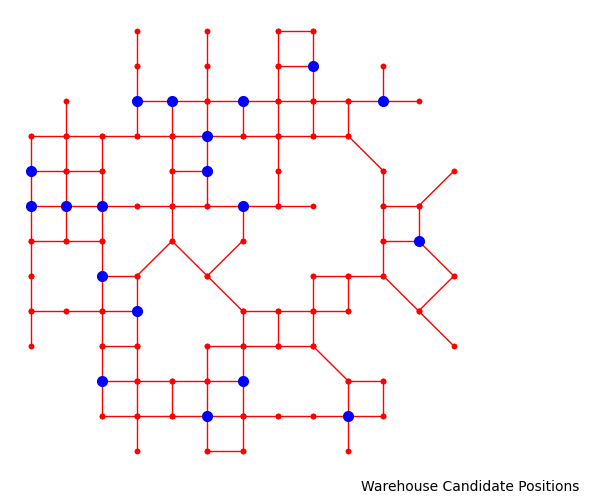

Simulate Delivery from Warehouse (6800,4000)
  improved position:   (6800,4000) f=31838.95
Simulate Delivery from Warehouse (3440,5680)
  improved position:   (3440,5680) f=31312.65
Simulate Delivery from Warehouse (2320,2880)
Simulate Delivery from Warehouse (1200,4560)
Simulate Delivery from Warehouse (1760,1760)
  improved position:   (1760,1760) f=31220.65
Simulate Delivery from Warehouse ( 640,5120)
Simulate Delivery from Warehouse (2320,6240)
Simulate Delivery from Warehouse (5680,1200)
Simulate Delivery from Warehouse (3440,5120)
Simulate Delivery from Warehouse (1760,3440)
Simulate Delivery from Warehouse (2880,6240)
Simulate Delivery from Warehouse (1760,4560)
  improved position:   (1760,4560) f=31148.10
Simulate Delivery from Warehouse (4000,6240)
Simulate Delivery from Warehouse ( 640,4560)
Simulate Delivery from Warehouse (3440,1200)
Simulate Delivery from Warehouse (4000,4560)
Simulate Delivery from Warehouse (6240,6240)
Simulate Delivery from Warehouse (5120,6800)
Simula

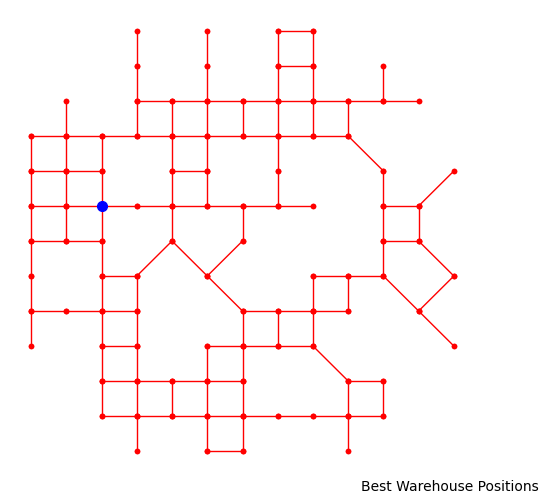

In [30]:
import pickle

with open('data.pickled', 'rb') as f:
    M, C = pickle.load(f)

def generateWarehouseLocations(M, p):

    def numberOfEdges(v, E):
        count = 0
        for e in E:
            if e[0]==v or e[1]==v:
                count += 1
        return count

    V, E = M
    W = [ v for v in V if numberOfEdges(v, E)>2 ]
    return random.sample(W, k=int(round(len(W)*p)))

def formatLocation(w):
    return f"({w[0]:4d},{w[1]:4d})"
    
def objectiveFunction(w, seed=4144):
    random.seed(seed)
    title = "Simulate Delivery from Warehouse "+formatLocation(w)
    rec = simulation(M, w, C, p=0.15, days=20, title=title)
    filename = "_/rec w="+formatLocation(w)+".pickled"
    with open(filename, 'wb') as f:
            pickle.dump(rec, f)
    return rec.statsTourLength()[0] # mean tour length

def monteCarlo(M, p):

    W = generateWarehouseLocations(M, p)
    plotMap(M, T=W, styleT='bo', msT=7, 
            text="Warehouse Candidate Positions")

    minW, minP = None, math.inf
    for w in W:
        f = objectiveFunction(w)
        if f < minP:
            print(f"  improved position:   {formatLocation(w):s} f={f:7.2f}")
            minW, minP = [w], f
        elif f == minP:
            print(f"  equivalent position: {formatLocation(w):s} f={f:7.2f}")
            minW.append(w)
            
    return minW

random.seed(4144)
W = monteCarlo(M, 0.28)
plotMap(M, T=W, styleT='bo', msT=7, text='Best Warehouse Positions')

In [31]:
import pickle
with open('W.pickled', 'wb') as f:
    pickle.dump(W, f)

# Optimization for 10 days

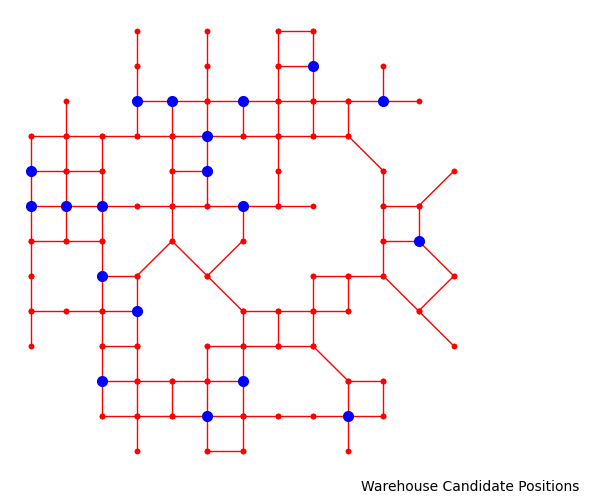

Simulate Delivery from Warehouse (6800,4000)
  improved position:   (6800,4000) f=33052.90
Simulate Delivery from Warehouse (3440,5680)
  improved position:   (3440,5680) f=32860.40
Simulate Delivery from Warehouse (2320,2880)
Simulate Delivery from Warehouse (1200,4560)
Simulate Delivery from Warehouse (1760,1760)
Simulate Delivery from Warehouse ( 640,5120)
Simulate Delivery from Warehouse (2320,6240)
Simulate Delivery from Warehouse (5680,1200)
Simulate Delivery from Warehouse (3440,5120)
Simulate Delivery from Warehouse (1760,3440)
Simulate Delivery from Warehouse (2880,6240)
Simulate Delivery from Warehouse (1760,4560)
Simulate Delivery from Warehouse (4000,6240)
Simulate Delivery from Warehouse ( 640,4560)
Simulate Delivery from Warehouse (3440,1200)
Simulate Delivery from Warehouse (4000,4560)
  improved position:   (4000,4560) f=32841.90
Simulate Delivery from Warehouse (6240,6240)
Simulate Delivery from Warehouse (5120,6800)
Simulate Delivery from Warehouse (4000,1760)


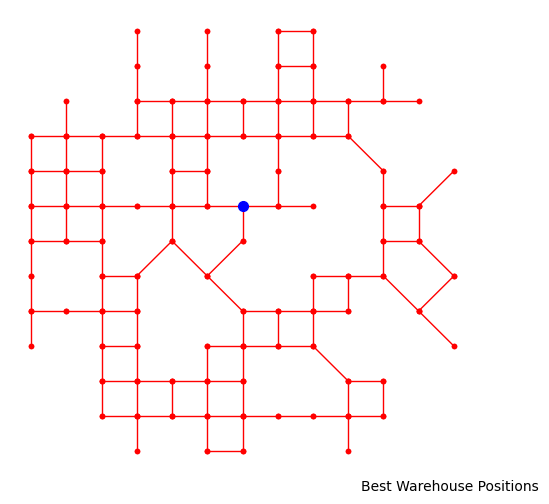

In [32]:
import pickle

with open('data.pickled', 'rb') as f:
    M, C = pickle.load(f)

def generateWarehouseLocations(M, p):

    def numberOfEdges(v, E):
        count = 0
        for e in E:
            if e[0]==v or e[1]==v:
                count += 1
        return count

    V, E = M
    W = [ v for v in V if numberOfEdges(v, E)>2 ]
    return random.sample(W, k=int(round(len(W)*p)))

def formatLocation(w):
    return f"({w[0]:4d},{w[1]:4d})"
    
def objectiveFunction(w, seed=4144):
    random.seed(seed)
    title = "Simulate Delivery from Warehouse "+formatLocation(w)
    rec = simulation(M, w, C, p=0.15, days=10, title=title)
    filename = "_/rec w="+formatLocation(w)+".pickled"
    with open(filename, 'wb') as f:
            pickle.dump(rec, f)
    return rec.statsTourLength()[0] # mean tour length

def monteCarlo(M, p):

    W = generateWarehouseLocations(M, p)
    plotMap(M, T=W, styleT='bo', msT=7, 
            text="Warehouse Candidate Positions")

    minW, minP = None, math.inf
    for w in W:
        f = objectiveFunction(w)
        if f < minP:
            print(f"  improved position:   {formatLocation(w):s} f={f:7.2f}")
            minW, minP = [w], f
        elif f == minP:
            print(f"  equivalent position: {formatLocation(w):s} f={f:7.2f}")
            minW.append(w)
            
    return minW

random.seed(4144)
W1 = monteCarlo(M, 0.28)
plotMap(M, T=W1, styleT='bo', msT=7, text='Best Warehouse Positions')

In [33]:
import pickle
with open('W1.pickled', 'wb') as f:
    pickle.dump(W1, f)

In [38]:
import pickle

with open('data.pickled', 'rb') as f:
    M, C = pickle.load(f)
    
W = generateWarehouseLocations(M, 0.28)

In [39]:
W

[(6800, 4560),
 (6240, 4560),
 (5680, 5680),
 (4000, 1200),
 (6800, 2880),
 (2880, 5120),
 (3440, 1760),
 (4000, 1760),
 (1760, 5120),
 (4560, 5680),
 (5680, 6240),
 (1760, 5680),
 (4560, 6240),
 (640, 2880),
 (2320, 1760),
 (1200, 4000),
 (2320, 2880),
 (640, 4560),
 (5120, 6240)]

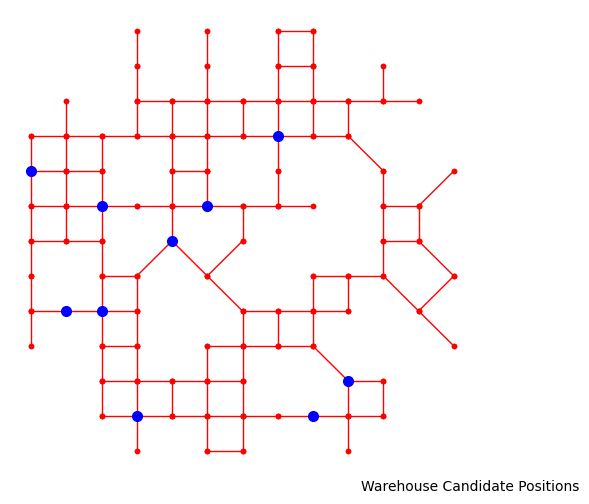

generating for day:  0 [2, 3, 6, 18, 21, 31, 32, 42, 50, 50, 85, 102, 103, 115, 147]
generating for day:  1 [5, 5, 11, 14, 17, 23, 25, 31, 33, 46, 48, 61, 61, 67, 71, 72, 78, 85, 91, 104, 112, 125, 146]
generating for day:  2 [2, 7, 13, 15, 16, 18, 21, 24, 28, 60, 60, 72, 74, 77, 78, 91, 92, 95, 98, 118, 126, 127, 132, 133, 146]
generating for day:  3 [2, 7, 7, 15, 16, 45, 58, 66, 72, 73, 77, 80, 84, 99, 128, 131, 135, 135, 137]
generating for day:  4 [1, 2, 16, 19, 21, 43, 53, 55, 60, 65, 73, 82, 96, 98, 110, 116, 117, 118, 145, 149]
generating for day:  5 [2, 18, 18, 25, 28, 48, 50, 64, 73, 87, 97, 102, 115, 121, 122, 125, 127, 144, 146, 147, 148, 149]
generating for day:  6 [2, 3, 11, 16, 23, 30, 47, 59, 64, 70, 70, 71, 91, 93, 95, 97, 115, 118, 141]
generating for day:  7 [3, 4, 10, 17, 22, 27, 28, 37, 38, 38, 44, 46, 55, 56, 61, 74, 80, 92, 95, 106, 112, 122, 126, 128, 128, 130, 131, 142, 145, 149, 149]
generating for day:  8 [9, 19, 45, 48, 56, 56, 62, 70, 77, 82, 83, 93, 100, 11

[ 1] 11:28:58.5 Parcel:  22 ( 31) arr at delivery centre
[ 1] 11:30:24.3 Parcel:  23 ( 33) arr at delivery centre
[ 1] 11:33:35.5 Parcel:  24 ( 46) arr at delivery centre
[ 1] 11:47:58.0 Parcel:  25 ( 48) arr at delivery centre
[ 1] 11:50:08.3 Parcel:  26 ( 61) arr at delivery centre
[ 1] 12:20:51.5 Parcel:  27 ( 61) arr at delivery centre
[ 1] 12:41:29.3 Parcel:  28 ( 67) arr at delivery centre
[ 1] 12:45:25.0 Parcel:  29 ( 71) arr at delivery centre
[ 1] 13:25:37.2 Parcel:  30 ( 72) arr at delivery centre
[ 1] 13:31:03.0 Parcel:  31 ( 78) arr at delivery centre
[ 1] 13:49:00.3 Parcel:  32 ( 85) arr at delivery centre
[ 1] 14:08:03.3 Parcel:  33 ( 91) arr at delivery centre
[ 1] 14:29:23.3 Parcel:  34 (104) arr at delivery centre
[ 1] 14:29:42.1 Parcel:  35 (112) arr at delivery centre
[ 1] 15:13:47.1 Parcel:  36 (125) arr at delivery centre
[ 1] 15:27:57.9 Parcel:  37 (146) arr at delivery centre
[ 1] 18:00:00.0 Driver arrives for work
[ 1] 18:00:00.0 Parcel:  32 ( 85) out for delive

[ 2] 10:24:44.2 Parcel:  45 ( 24) arr at delivery centre
[ 2] 10:25:02.7 Parcel:  46 ( 28) arr at delivery centre
[ 2] 11:20:29.0 Parcel:  47 ( 60) arr at delivery centre
[ 2] 11:24:56.1 Parcel:  48 ( 60) arr at delivery centre
[ 2] 11:34:45.7 Parcel:  49 ( 72) arr at delivery centre
[ 2] 11:38:55.9 Parcel:  50 ( 74) arr at delivery centre
[ 2] 11:43:48.2 Parcel:  51 ( 77) arr at delivery centre
[ 2] 11:45:29.8 Parcel:  52 ( 78) arr at delivery centre
[ 2] 11:59:59.1 Parcel:  53 ( 91) arr at delivery centre
[ 2] 12:00:45.6 Parcel:  54 ( 92) arr at delivery centre
[ 2] 12:04:22.3 Parcel:  55 ( 95) arr at delivery centre
[ 2] 12:17:04.4 Parcel:  56 ( 98) arr at delivery centre
[ 2] 12:20:21.7 Parcel:  57 (118) arr at delivery centre
[ 2] 12:44:13.7 Parcel:  58 (126) arr at delivery centre
[ 2] 12:45:08.8 Parcel:  59 (127) arr at delivery centre
[ 2] 12:50:01.7 Parcel:  60 (132) arr at delivery centre
[ 2] 13:01:10.5 Parcel:  61 (133) arr at delivery centre
[ 2] 13:06:29.7 Parcel:  62 (14

[ 3] 10:16:25.2 Parcel:  68 ( 45) arr at delivery centre
[ 3] 11:33:13.4 Parcel:  69 ( 58) arr at delivery centre
[ 3] 12:19:50.5 Parcel:  70 ( 66) arr at delivery centre
[ 3] 12:38:07.9 Parcel:  71 ( 72) arr at delivery centre
[ 3] 12:44:06.7 Parcel:  72 ( 73) arr at delivery centre
[ 3] 13:19:40.5 Parcel:  73 ( 77) arr at delivery centre
[ 3] 13:46:08.0 Parcel:  74 ( 80) arr at delivery centre
[ 3] 14:04:04.4 Parcel:  75 ( 84) arr at delivery centre
[ 3] 14:23:48.0 Parcel:  76 ( 99) arr at delivery centre
[ 3] 14:25:36.3 Parcel:  77 (128) arr at delivery centre
[ 3] 14:47:48.1 Parcel:  78 (131) arr at delivery centre
[ 3] 15:29:48.5 Parcel:  79 (135) arr at delivery centre
[ 3] 15:31:46.6 Parcel:  80 (135) arr at delivery centre
[ 3] 15:36:28.5 Parcel:  81 (137) arr at delivery centre
[ 3] 18:00:00.0 Driver arrives for work
[ 3] 18:00:00.0 Parcel:  77 (128) out for delivery
[ 3] 18:00:00.0 Parcel:  62 (146) out for delivery
[ 3] 18:00:00.0 Parcel:  79 (135) out for delivery
[ 3] 18:0

[ 4] 12:30:15.3 Parcel:  93 ( 82) arr at delivery centre
[ 4] 12:54:06.4 Parcel:  94 ( 96) arr at delivery centre
[ 4] 14:20:14.5 Parcel:  95 ( 98) arr at delivery centre
[ 4] 15:28:23.5 Parcel:  96 (110) arr at delivery centre
[ 4] 15:37:20.3 Parcel:  97 (116) arr at delivery centre
[ 4] 15:49:20.1 Parcel:  98 (117) arr at delivery centre
[ 4] 15:49:50.6 Parcel:  99 (118) arr at delivery centre
[ 4] 15:51:49.0 Parcel: 100 (145) arr at delivery centre
[ 4] 16:13:15.0 Parcel: 101 (149) arr at delivery centre
[ 4] 18:00:00.0 Driver arrives for work
[ 4] 18:00:00.0 Parcel:  98 (117) out for delivery
[ 4] 18:00:00.0 Parcel:  96 (110) out for delivery
[ 4] 18:00:00.0 Parcel:  88 ( 53) out for delivery
[ 4] 18:00:00.0 Parcel:  89 ( 55) out for delivery
[ 4] 18:00:00.0 Parcel:  85 ( 19) out for delivery
[ 4] 18:00:00.0 Parcel:  86 ( 21) out for delivery
[ 4] 18:00:00.0 Parcel:  82 (  1) out for delivery
[ 4] 18:00:00.0 Parcel:  83 (  2) out for delivery
[ 4] 18:00:00.0 Parcel:  84 ( 16) out f

[ 5] 13:16:29.5 Parcel: 116 (122) arr at delivery centre
[ 5] 13:36:07.6 Parcel: 117 (125) arr at delivery centre
[ 5] 14:28:40.4 Parcel: 118 (127) arr at delivery centre
[ 5] 14:32:03.7 Parcel: 119 (144) arr at delivery centre
[ 5] 14:36:39.5 Parcel: 120 (146) arr at delivery centre
[ 5] 14:53:05.3 Parcel: 121 (147) arr at delivery centre
[ 5] 14:56:25.1 Parcel: 122 (148) arr at delivery centre
[ 5] 15:03:16.9 Parcel: 123 (149) arr at delivery centre
[ 5] 18:00:00.0 Driver arrives for work
[ 5] 18:00:00.0 Parcel: 118 (127) out for delivery
[ 5] 18:00:00.0 Parcel: 115 (121) out for delivery
[ 5] 18:00:00.0 Parcel: 111 ( 87) out for delivery
[ 5] 18:00:00.0 Parcel: 103 ( 18) out for delivery
[ 5] 18:00:00.0 Parcel: 104 ( 18) out for delivery
[ 5] 18:00:00.0 Parcel: 102 (  2) out for delivery
[ 5] 18:00:00.0 Parcel: 105 ( 25) out for delivery
[ 5] 18:00:00.0 Parcel: 106 ( 28) out for delivery
[ 5] 18:00:00.0 Parcel: 107 ( 48) out for delivery
[ 5] 18:00:00.0 Parcel: 108 ( 50) out for del

[ 6] 09:58:26.6 Parcel: 130 ( 47) arr at delivery centre
[ 6] 10:28:12.7 Parcel: 131 ( 59) arr at delivery centre
[ 6] 10:46:15.7 Parcel: 132 ( 64) arr at delivery centre
[ 6] 11:57:30.4 Parcel: 133 ( 70) arr at delivery centre
[ 6] 12:16:33.8 Parcel: 134 ( 70) arr at delivery centre
[ 6] 13:09:35.9 Parcel: 135 ( 71) arr at delivery centre
[ 6] 13:18:30.2 Parcel: 136 ( 91) arr at delivery centre
[ 6] 13:35:19.3 Parcel: 137 ( 93) arr at delivery centre
[ 6] 13:44:57.3 Parcel: 138 ( 95) arr at delivery centre
[ 6] 13:54:50.3 Parcel: 139 ( 97) arr at delivery centre
[ 6] 14:30:27.1 Parcel: 140 (115) arr at delivery centre
[ 6] 15:01:12.8 Parcel: 141 (118) arr at delivery centre
[ 6] 15:19:56.3 Parcel: 142 (141) arr at delivery centre
[ 6] 18:00:00.0 Driver arrives for work
[ 6] 18:00:00.0 Parcel: 142 (141) out for delivery
[ 6] 18:00:00.0 Parcel: 141 (118) out for delivery
[ 6] 18:00:00.0 Parcel: 140 (115) out for delivery
[ 6] 18:00:00.0 Parcel: 137 ( 93) out for delivery
[ 6] 18:00:00.0

[ 7] 11:40:18.9 Parcel: 158 ( 74) arr at delivery centre
[ 7] 11:54:29.3 Parcel: 159 ( 80) arr at delivery centre
[ 7] 11:57:56.0 Parcel: 160 ( 92) arr at delivery centre
[ 7] 12:06:51.7 Parcel: 161 ( 95) arr at delivery centre
[ 7] 12:14:50.0 Parcel: 162 (106) arr at delivery centre
[ 7] 12:19:45.9 Parcel: 163 (112) arr at delivery centre
[ 7] 12:20:10.7 Parcel: 164 (122) arr at delivery centre
[ 7] 12:22:10.8 Parcel: 165 (126) arr at delivery centre
[ 7] 12:44:58.7 Parcel: 166 (128) arr at delivery centre
[ 7] 12:46:58.8 Parcel: 167 (128) arr at delivery centre
[ 7] 13:10:42.3 Parcel: 168 (130) arr at delivery centre
[ 7] 13:13:51.9 Parcel: 169 (131) arr at delivery centre
[ 7] 13:20:28.3 Parcel: 170 (142) arr at delivery centre
[ 7] 13:24:39.0 Parcel: 171 (145) arr at delivery centre
[ 7] 13:43:31.0 Parcel: 172 (149) arr at delivery centre
[ 7] 13:48:47.0 Parcel: 173 (149) arr at delivery centre
[ 7] 18:00:00.0 Driver arrives for work
[ 7] 18:00:00.0 Parcel: 168 (130) out for delive

[ 8] 08:22:51.2 Parcel: 176 ( 45) arr at delivery centre
[ 8] 08:28:09.1 Parcel: 177 ( 48) arr at delivery centre
[ 8] 08:31:40.8 Parcel: 178 ( 56) arr at delivery centre
[ 8] 09:05:18.8 Parcel: 179 ( 56) arr at delivery centre
[ 8] 09:35:02.6 Parcel: 180 ( 62) arr at delivery centre
[ 8] 09:50:04.9 Parcel: 181 ( 70) arr at delivery centre
[ 8] 10:13:23.7 Parcel: 182 ( 77) arr at delivery centre
[ 8] 10:22:09.6 Parcel: 183 ( 82) arr at delivery centre
[ 8] 10:57:16.7 Parcel: 184 ( 83) arr at delivery centre
[ 8] 11:32:43.2 Parcel: 185 ( 93) arr at delivery centre
[ 8] 12:05:51.0 Parcel: 186 (100) arr at delivery centre
[ 8] 12:08:46.9 Parcel: 187 (113) arr at delivery centre
[ 8] 12:12:44.2 Parcel: 188 (114) arr at delivery centre
[ 8] 12:36:19.7 Parcel: 189 (119) arr at delivery centre
[ 8] 12:45:10.7 Parcel: 190 (122) arr at delivery centre
[ 8] 12:49:11.4 Parcel: 191 (130) arr at delivery centre
[ 8] 13:06:54.3 Parcel: 192 (130) arr at delivery centre
[ 8] 13:11:33.6 Parcel: 193 (13

[ 9] 11:37:46.1 Parcel: 203 ( 38) arr at delivery centre
[ 9] 11:47:02.6 Parcel: 204 ( 47) arr at delivery centre
[ 9] 11:55:42.2 Parcel: 205 ( 53) arr at delivery centre
[ 9] 12:17:09.8 Parcel: 206 ( 56) arr at delivery centre
[ 9] 12:26:24.1 Parcel: 207 ( 64) arr at delivery centre
[ 9] 12:31:57.7 Parcel: 208 ( 67) arr at delivery centre
[ 9] 12:34:50.7 Parcel: 209 ( 69) arr at delivery centre
[ 9] 12:50:07.6 Parcel: 210 ( 74) arr at delivery centre
[ 9] 12:54:03.5 Parcel: 211 ( 74) arr at delivery centre
[ 9] 13:34:23.6 Parcel: 212 ( 82) arr at delivery centre
[ 9] 13:59:44.8 Parcel: 213 ( 90) arr at delivery centre
[ 9] 14:31:53.5 Parcel: 214 ( 91) arr at delivery centre
[ 9] 14:37:07.3 Parcel: 215 ( 92) arr at delivery centre
[ 9] 14:37:16.0 Parcel: 216 ( 94) arr at delivery centre
[ 9] 14:45:14.8 Parcel: 217 (112) arr at delivery centre
[ 9] 15:17:13.8 Parcel: 218 (121) arr at delivery centre
[ 9] 15:37:14.0 Parcel: 219 (123) arr at delivery centre
[ 9] 15:41:51.1 Parcel: 220 (13

[10] 10:00:04.3 Parcel: 230 ( 60) arr at delivery centre
[10] 10:23:26.1 Parcel: 231 ( 64) arr at delivery centre
[10] 10:29:06.2 Parcel: 232 ( 71) arr at delivery centre
[10] 11:49:28.9 Parcel: 233 ( 90) arr at delivery centre
[10] 11:50:49.3 Parcel: 234 ( 94) arr at delivery centre
[10] 12:37:55.5 Parcel: 235 (102) arr at delivery centre
[10] 12:41:13.7 Parcel: 236 (118) arr at delivery centre
[10] 13:23:28.6 Parcel: 237 (127) arr at delivery centre
[10] 13:32:27.8 Parcel: 238 (128) arr at delivery centre
[10] 18:00:00.0 Driver arrives for work
[10] 18:00:00.0 Parcel: 238 (128) out for delivery
[10] 18:00:00.0 Parcel: 236 (118) out for delivery
[10] 18:00:00.0 Parcel: 235 (102) out for delivery
[10] 18:00:00.0 Parcel: 232 ( 71) out for delivery
[10] 18:00:00.0 Parcel: 231 ( 64) out for delivery
[10] 18:00:00.0 Parcel: 229 ( 57) out for delivery
[10] 18:00:00.0 Parcel: 230 ( 60) out for delivery
[10] 18:00:00.0 Parcel: 225 ( 36) out for delivery
[10] 18:00:00.0 Parcel: 224 ( 23) out f

[12] 12:33:19.9 Parcel: 265 ( 54) arr at delivery centre
[12] 12:38:06.9 Parcel: 266 ( 55) arr at delivery centre
[12] 12:50:24.5 Parcel: 267 ( 60) arr at delivery centre
[12] 13:32:05.8 Parcel: 268 ( 65) arr at delivery centre
[12] 13:37:50.8 Parcel: 269 ( 86) arr at delivery centre
[12] 13:47:16.8 Parcel: 270 ( 92) arr at delivery centre
[12] 14:02:48.5 Parcel: 271 ( 96) arr at delivery centre
[12] 14:25:32.6 Parcel: 272 (118) arr at delivery centre
[12] 14:30:14.7 Parcel: 273 (120) arr at delivery centre
[12] 15:02:03.2 Parcel: 274 (124) arr at delivery centre
[12] 15:07:27.8 Parcel: 275 (127) arr at delivery centre
[12] 15:13:37.5 Parcel: 276 (130) arr at delivery centre
[12] 15:13:39.3 Parcel: 277 (131) arr at delivery centre
[12] 15:18:19.6 Parcel: 278 (131) arr at delivery centre
[12] 16:26:37.3 Parcel: 279 (141) arr at delivery centre
[12] 16:44:57.2 Parcel: 280 (145) arr at delivery centre
[12] 18:00:00.0 Driver arrives for work
[12] 18:00:00.0 Parcel: 274 (124) out for delive

[13] 09:09:46.1 Parcel: 288 ( 50) arr at delivery centre
[13] 09:21:36.2 Parcel: 289 ( 54) arr at delivery centre
[13] 09:54:37.9 Parcel: 290 ( 77) arr at delivery centre
[13] 10:00:36.9 Parcel: 291 ( 90) arr at delivery centre
[13] 10:29:52.7 Parcel: 292 ( 94) arr at delivery centre
[13] 10:48:20.2 Parcel: 293 ( 95) arr at delivery centre
[13] 11:02:16.7 Parcel: 294 (101) arr at delivery centre
[13] 11:18:52.8 Parcel: 295 (102) arr at delivery centre
[13] 11:22:28.0 Parcel: 296 (107) arr at delivery centre
[13] 11:41:36.5 Parcel: 297 (127) arr at delivery centre
[13] 11:44:12.2 Parcel: 298 (128) arr at delivery centre
[13] 12:16:07.7 Parcel: 299 (148) arr at delivery centre
[13] 18:00:00.0 Driver arrives for work
[13] 18:00:00.0 Parcel: 297 (127) out for delivery
[13] 18:00:00.0 Parcel: 296 (107) out for delivery
[13] 18:00:00.0 Parcel: 298 (128) out for delivery
[13] 18:00:00.0 Parcel: 299 (148) out for delivery
[13] 18:00:00.0 Parcel: 295 (102) out for delivery
[13] 18:00:00.0 Parce

[14] 13:08:19.2 Parcel: 311 ( 56) arr at delivery centre
[14] 13:21:15.0 Parcel: 312 ( 57) arr at delivery centre
[14] 14:35:42.7 Parcel: 313 ( 77) arr at delivery centre
[14] 15:07:03.4 Parcel: 314 ( 98) arr at delivery centre
[14] 15:11:12.6 Parcel: 315 (103) arr at delivery centre
[14] 15:31:03.5 Parcel: 316 (107) arr at delivery centre
[14] 15:33:20.3 Parcel: 317 (123) arr at delivery centre
[14] 15:40:31.5 Parcel: 318 (135) arr at delivery centre
[14] 15:44:11.0 Parcel: 319 (145) arr at delivery centre
[14] 16:02:21.2 Parcel: 320 (149) arr at delivery centre
[14] 18:00:00.0 Driver arrives for work
[14] 18:00:00.0 Parcel: 317 (123) out for delivery
[14] 18:00:00.0 Parcel: 315 (103) out for delivery
[14] 18:00:00.0 Parcel: 313 ( 77) out for delivery
[14] 18:00:00.0 Parcel: 308 ( 45) out for delivery
[14] 18:00:00.0 Parcel: 306 ( 39) out for delivery
[14] 18:00:00.0 Parcel: 300 (  6) out for delivery
[14] 18:00:00.0 Parcel: 303 ( 25) out for delivery
[14] 18:00:00.0 Parcel: 301 (  8)

[15] 10:24:07.5 Parcel: 327 ( 31) arr at delivery centre
[15] 10:58:11.9 Parcel: 328 ( 32) arr at delivery centre
[15] 11:14:04.5 Parcel: 329 ( 47) arr at delivery centre
[15] 11:21:03.5 Parcel: 330 ( 51) arr at delivery centre
[15] 13:06:06.3 Parcel: 331 ( 53) arr at delivery centre
[15] 13:22:56.0 Parcel: 332 ( 55) arr at delivery centre
[15] 13:23:18.0 Parcel: 333 ( 65) arr at delivery centre
[15] 13:44:10.5 Parcel: 334 ( 77) arr at delivery centre
[15] 14:13:27.5 Parcel: 335 ( 89) arr at delivery centre
[15] 14:34:43.9 Parcel: 336 ( 94) arr at delivery centre
[15] 14:49:19.1 Parcel: 337 ( 97) arr at delivery centre
[15] 14:53:12.4 Parcel: 338 (106) arr at delivery centre
[15] 15:22:54.2 Parcel: 339 (119) arr at delivery centre
[15] 15:49:13.3 Parcel: 340 (122) arr at delivery centre
[15] 16:42:17.2 Parcel: 341 (142) arr at delivery centre
[15] 16:48:36.7 Parcel: 342 (149) arr at delivery centre
[15] 18:00:00.0 Driver arrives for work
[15] 18:00:00.0 Parcel: 336 ( 94) out for delive

[16] 11:31:25.4 Parcel: 350 ( 77) arr at delivery centre
[16] 11:57:36.9 Parcel: 351 ( 81) arr at delivery centre
[16] 12:26:12.9 Parcel: 352 ( 81) arr at delivery centre
[16] 12:52:24.6 Parcel: 353 ( 86) arr at delivery centre
[16] 13:18:11.5 Parcel: 354 ( 99) arr at delivery centre
[16] 13:43:46.6 Parcel: 355 (107) arr at delivery centre
[16] 14:05:04.0 Parcel: 356 (108) arr at delivery centre
[16] 14:07:52.1 Parcel: 357 (111) arr at delivery centre
[16] 14:33:36.5 Parcel: 358 (119) arr at delivery centre
[16] 14:36:02.4 Parcel: 359 (122) arr at delivery centre
[16] 14:37:31.9 Parcel: 360 (136) arr at delivery centre
[16] 15:06:19.5 Parcel: 361 (141) arr at delivery centre
[16] 15:44:57.5 Parcel: 362 (145) arr at delivery centre
[16] 18:00:00.0 Driver arrives for work
[16] 18:00:00.0 Parcel: 355 (107) out for delivery
[16] 18:00:00.0 Parcel: 357 (111) out for delivery
[16] 18:00:00.0 Parcel: 358 (119) out for delivery
[16] 18:00:00.0 Parcel: 362 (145) out for delivery
[16] 18:00:00.0

[17] 10:34:30.9 Parcel: 372 ( 46) arr at delivery centre
[17] 10:40:31.3 Parcel: 373 ( 46) arr at delivery centre
[17] 10:53:23.8 Parcel: 374 ( 48) arr at delivery centre
[17] 11:11:31.1 Parcel: 375 ( 51) arr at delivery centre
[17] 11:13:40.7 Parcel: 376 ( 54) arr at delivery centre
[17] 11:19:07.3 Parcel: 377 ( 56) arr at delivery centre
[17] 11:37:17.7 Parcel: 378 ( 63) arr at delivery centre
[17] 11:54:02.4 Parcel: 379 ( 68) arr at delivery centre
[17] 11:54:30.4 Parcel: 380 ( 86) arr at delivery centre
[17] 12:09:42.7 Parcel: 381 (114) arr at delivery centre
[17] 12:11:22.5 Parcel: 382 (120) arr at delivery centre
[17] 12:15:56.7 Parcel: 383 (131) arr at delivery centre
[17] 12:43:01.5 Parcel: 384 (138) arr at delivery centre
[17] 18:00:00.0 Driver arrives for work
[17] 18:00:00.0 Parcel: 382 (120) out for delivery
[17] 18:00:00.0 Parcel: 384 (138) out for delivery
[17] 18:00:00.0 Parcel: 381 (114) out for delivery
[17] 18:00:00.0 Parcel: 377 ( 56) out for delivery
[17] 18:00:00.0

[18] 08:51:54.1 Parcel: 391 ( 60) arr at delivery centre
[18] 08:58:43.2 Parcel: 392 ( 60) arr at delivery centre
[18] 09:10:58.5 Parcel: 393 ( 62) arr at delivery centre
[18] 09:25:49.5 Parcel: 394 ( 65) arr at delivery centre
[18] 09:26:29.9 Parcel: 395 ( 72) arr at delivery centre
[18] 09:43:26.1 Parcel: 396 ( 76) arr at delivery centre
[18] 09:52:35.8 Parcel: 397 ( 79) arr at delivery centre
[18] 10:05:12.3 Parcel: 398 ( 86) arr at delivery centre
[18] 11:36:26.4 Parcel: 399 ( 99) arr at delivery centre
[18] 11:56:04.2 Parcel: 400 (104) arr at delivery centre
[18] 12:10:09.9 Parcel: 401 (108) arr at delivery centre
[18] 12:43:33.6 Parcel: 402 (110) arr at delivery centre
[18] 12:46:26.5 Parcel: 403 (123) arr at delivery centre
[18] 14:03:10.4 Parcel: 404 (124) arr at delivery centre
[18] 14:17:02.1 Parcel: 405 (130) arr at delivery centre
[18] 14:46:42.2 Parcel: 406 (147) arr at delivery centre
[18] 15:20:05.0 Parcel: 407 (147) arr at delivery centre
[18] 18:00:00.0 Driver arrives 

[19] 10:40:22.2 Parcel: 413 ( 42) arr at delivery centre
[19] 10:52:51.6 Parcel: 414 ( 46) arr at delivery centre
[19] 10:56:19.3 Parcel: 415 ( 48) arr at delivery centre
[19] 11:00:08.5 Parcel: 416 ( 50) arr at delivery centre
[19] 11:07:34.2 Parcel: 417 ( 52) arr at delivery centre
[19] 11:17:33.9 Parcel: 418 ( 52) arr at delivery centre
[19] 11:37:27.4 Parcel: 419 ( 53) arr at delivery centre
[19] 11:46:06.1 Parcel: 420 ( 67) arr at delivery centre
[19] 12:02:27.1 Parcel: 421 ( 74) arr at delivery centre
[19] 12:28:49.5 Parcel: 422 ( 79) arr at delivery centre
[19] 12:40:38.6 Parcel: 423 ( 84) arr at delivery centre
[19] 12:42:51.7 Parcel: 424 (113) arr at delivery centre
[19] 12:44:23.0 Parcel: 425 (117) arr at delivery centre
[19] 13:02:44.6 Parcel: 426 (117) arr at delivery centre
[19] 13:27:50.8 Parcel: 427 (121) arr at delivery centre
[19] 13:30:46.5 Parcel: 428 (122) arr at delivery centre
[19] 13:31:32.9 Parcel: 429 (128) arr at delivery centre
[19] 13:34:35.5 Parcel: 430 (14

[ 0] 11:40:39.4 Parcel:   6 ( 32) arr at delivery centre
[ 0] 12:50:01.5 Parcel:   7 ( 42) arr at delivery centre
[ 0] 12:56:41.2 Parcel:   8 ( 50) arr at delivery centre
[ 0] 12:57:45.7 Parcel:   9 ( 50) arr at delivery centre
[ 0] 13:16:12.2 Parcel:  10 ( 85) arr at delivery centre
[ 0] 14:06:42.8 Parcel:  11 (102) arr at delivery centre
[ 0] 14:39:00.3 Parcel:  12 (103) arr at delivery centre
[ 0] 14:57:45.4 Parcel:  13 (115) arr at delivery centre
[ 0] 15:42:22.5 Parcel:  14 (147) arr at delivery centre
[ 0] 18:00:00.0 Driver arrives for work
[ 0] 18:00:00.0 Parcel:  11 (102) out for delivery
[ 0] 18:00:00.0 Parcel:  14 (147) out for delivery
[ 0] 18:00:00.0 Parcel:  12 (103) out for delivery
[ 0] 18:00:00.0 Parcel:  10 ( 85) out for delivery
[ 0] 18:00:00.0 Parcel:   6 ( 32) out for delivery
[ 0] 18:00:00.0 Parcel:   3 ( 18) out for delivery
[ 0] 18:00:00.0 Parcel:   7 ( 42) out for delivery
[ 0] 18:00:00.0 Parcel:   5 ( 31) out for delivery
[ 0] 18:00:00.0 Parcel:   4 ( 21) out f

[ 2] 09:57:14.5 Parcel:  44 ( 21) arr at delivery centre
[ 2] 10:24:44.2 Parcel:  45 ( 24) arr at delivery centre
[ 2] 10:25:02.7 Parcel:  46 ( 28) arr at delivery centre
[ 2] 11:20:29.0 Parcel:  47 ( 60) arr at delivery centre
[ 2] 11:24:56.1 Parcel:  48 ( 60) arr at delivery centre
[ 2] 11:34:45.7 Parcel:  49 ( 72) arr at delivery centre
[ 2] 11:38:55.9 Parcel:  50 ( 74) arr at delivery centre
[ 2] 11:43:48.2 Parcel:  51 ( 77) arr at delivery centre
[ 2] 11:45:29.8 Parcel:  52 ( 78) arr at delivery centre
[ 2] 11:59:59.1 Parcel:  53 ( 91) arr at delivery centre
[ 2] 12:00:45.6 Parcel:  54 ( 92) arr at delivery centre
[ 2] 12:04:22.3 Parcel:  55 ( 95) arr at delivery centre
[ 2] 12:17:04.4 Parcel:  56 ( 98) arr at delivery centre
[ 2] 12:20:21.7 Parcel:  57 (118) arr at delivery centre
[ 2] 12:44:13.7 Parcel:  58 (126) arr at delivery centre
[ 2] 12:45:08.8 Parcel:  59 (127) arr at delivery centre
[ 2] 12:50:01.7 Parcel:  60 (132) arr at delivery centre
[ 2] 13:01:10.5 Parcel:  61 (13

[ 3] 10:16:25.2 Parcel:  68 ( 45) arr at delivery centre
[ 3] 11:33:13.4 Parcel:  69 ( 58) arr at delivery centre
[ 3] 12:19:50.5 Parcel:  70 ( 66) arr at delivery centre
[ 3] 12:38:07.9 Parcel:  71 ( 72) arr at delivery centre
[ 3] 12:44:06.7 Parcel:  72 ( 73) arr at delivery centre
[ 3] 13:19:40.5 Parcel:  73 ( 77) arr at delivery centre
[ 3] 13:46:08.0 Parcel:  74 ( 80) arr at delivery centre
[ 3] 14:04:04.4 Parcel:  75 ( 84) arr at delivery centre
[ 3] 14:23:48.0 Parcel:  76 ( 99) arr at delivery centre
[ 3] 14:25:36.3 Parcel:  77 (128) arr at delivery centre
[ 3] 14:47:48.1 Parcel:  78 (131) arr at delivery centre
[ 3] 15:29:48.5 Parcel:  79 (135) arr at delivery centre
[ 3] 15:31:46.6 Parcel:  80 (135) arr at delivery centre
[ 3] 15:36:28.5 Parcel:  81 (137) arr at delivery centre
[ 3] 18:00:00.0 Driver arrives for work
[ 3] 18:00:00.0 Parcel:  71 ( 72) out for delivery
[ 3] 18:00:00.0 Parcel:  72 ( 73) out for delivery
[ 3] 18:00:00.0 Parcel:  69 ( 58) out for delivery
[ 3] 18:0

[ 4] 12:30:15.3 Parcel:  93 ( 82) arr at delivery centre
[ 4] 12:54:06.4 Parcel:  94 ( 96) arr at delivery centre
[ 4] 14:20:14.5 Parcel:  95 ( 98) arr at delivery centre
[ 4] 15:28:23.5 Parcel:  96 (110) arr at delivery centre
[ 4] 15:37:20.3 Parcel:  97 (116) arr at delivery centre
[ 4] 15:49:20.1 Parcel:  98 (117) arr at delivery centre
[ 4] 15:49:50.6 Parcel:  99 (118) arr at delivery centre
[ 4] 15:51:49.0 Parcel: 100 (145) arr at delivery centre
[ 4] 16:13:15.0 Parcel: 101 (149) arr at delivery centre
[ 4] 18:00:00.0 Driver arrives for work
[ 4] 18:00:00.0 Parcel:  97 (116) out for delivery
[ 4] 18:00:00.0 Parcel:  99 (118) out for delivery
[ 4] 18:00:00.0 Parcel:  92 ( 73) out for delivery
[ 4] 18:00:00.0 Parcel:  91 ( 65) out for delivery
[ 4] 18:00:00.0 Parcel:  90 ( 60) out for delivery
[ 4] 18:00:00.0 Parcel:  87 ( 43) out for delivery
[ 4] 18:00:00.0 Parcel:  84 ( 16) out for delivery
[ 4] 18:00:00.0 Parcel:  83 (  2) out for delivery
[ 4] 18:00:00.0 Parcel:  82 (  1) out f

[ 5] 13:16:29.5 Parcel: 116 (122) arr at delivery centre
[ 5] 13:36:07.6 Parcel: 117 (125) arr at delivery centre
[ 5] 14:28:40.4 Parcel: 118 (127) arr at delivery centre
[ 5] 14:32:03.7 Parcel: 119 (144) arr at delivery centre
[ 5] 14:36:39.5 Parcel: 120 (146) arr at delivery centre
[ 5] 14:53:05.3 Parcel: 121 (147) arr at delivery centre
[ 5] 14:56:25.1 Parcel: 122 (148) arr at delivery centre
[ 5] 15:03:16.9 Parcel: 123 (149) arr at delivery centre
[ 5] 18:00:00.0 Driver arrives for work
[ 5] 18:00:00.0 Parcel: 114 (115) out for delivery
[ 5] 18:00:00.0 Parcel: 110 ( 73) out for delivery
[ 5] 18:00:00.0 Parcel: 109 ( 64) out for delivery
[ 5] 18:00:00.0 Parcel: 108 ( 50) out for delivery
[ 5] 18:00:00.0 Parcel: 107 ( 48) out for delivery
[ 5] 18:00:00.0 Parcel: 106 ( 28) out for delivery
[ 5] 18:00:00.0 Parcel: 105 ( 25) out for delivery
[ 5] 18:00:00.0 Parcel: 102 (  2) out for delivery
[ 5] 18:00:00.0 Parcel: 103 ( 18) out for delivery
[ 5] 18:00:00.0 Parcel: 104 ( 18) out for del

[ 6] 09:58:26.6 Parcel: 130 ( 47) arr at delivery centre
[ 6] 10:28:12.7 Parcel: 131 ( 59) arr at delivery centre
[ 6] 10:46:15.7 Parcel: 132 ( 64) arr at delivery centre
[ 6] 11:57:30.4 Parcel: 133 ( 70) arr at delivery centre
[ 6] 12:16:33.8 Parcel: 134 ( 70) arr at delivery centre
[ 6] 13:09:35.9 Parcel: 135 ( 71) arr at delivery centre
[ 6] 13:18:30.2 Parcel: 136 ( 91) arr at delivery centre
[ 6] 13:35:19.3 Parcel: 137 ( 93) arr at delivery centre
[ 6] 13:44:57.3 Parcel: 138 ( 95) arr at delivery centre
[ 6] 13:54:50.3 Parcel: 139 ( 97) arr at delivery centre
[ 6] 14:30:27.1 Parcel: 140 (115) arr at delivery centre
[ 6] 15:01:12.8 Parcel: 141 (118) arr at delivery centre
[ 6] 15:19:56.3 Parcel: 142 (141) arr at delivery centre
[ 6] 18:00:00.0 Driver arrives for work
[ 6] 18:00:00.0 Parcel: 140 (115) out for delivery
[ 6] 18:00:00.0 Parcel: 141 (118) out for delivery
[ 6] 18:00:00.0 Parcel: 142 (141) out for delivery
[ 6] 18:00:00.0 Parcel: 138 ( 95) out for delivery
[ 6] 18:00:00.0

[ 7] 11:40:18.9 Parcel: 158 ( 74) arr at delivery centre
[ 7] 11:54:29.3 Parcel: 159 ( 80) arr at delivery centre
[ 7] 11:57:56.0 Parcel: 160 ( 92) arr at delivery centre
[ 7] 12:06:51.7 Parcel: 161 ( 95) arr at delivery centre
[ 7] 12:14:50.0 Parcel: 162 (106) arr at delivery centre
[ 7] 12:19:45.9 Parcel: 163 (112) arr at delivery centre
[ 7] 12:20:10.7 Parcel: 164 (122) arr at delivery centre
[ 7] 12:22:10.8 Parcel: 165 (126) arr at delivery centre
[ 7] 12:44:58.7 Parcel: 166 (128) arr at delivery centre
[ 7] 12:46:58.8 Parcel: 167 (128) arr at delivery centre
[ 7] 13:10:42.3 Parcel: 168 (130) arr at delivery centre
[ 7] 13:13:51.9 Parcel: 169 (131) arr at delivery centre
[ 7] 13:20:28.3 Parcel: 170 (142) arr at delivery centre
[ 7] 13:24:39.0 Parcel: 171 (145) arr at delivery centre
[ 7] 13:43:31.0 Parcel: 172 (149) arr at delivery centre
[ 7] 13:48:47.0 Parcel: 173 (149) arr at delivery centre
[ 7] 18:00:00.0 Driver arrives for work
[ 7] 18:00:00.0 Parcel: 162 (106) out for delive

[ 8] 08:28:09.1 Parcel: 177 ( 48) arr at delivery centre
[ 8] 08:31:40.8 Parcel: 178 ( 56) arr at delivery centre
[ 8] 09:05:18.8 Parcel: 179 ( 56) arr at delivery centre
[ 8] 09:35:02.6 Parcel: 180 ( 62) arr at delivery centre
[ 8] 09:50:04.9 Parcel: 181 ( 70) arr at delivery centre
[ 8] 10:13:23.7 Parcel: 182 ( 77) arr at delivery centre
[ 8] 10:22:09.6 Parcel: 183 ( 82) arr at delivery centre
[ 8] 10:57:16.7 Parcel: 184 ( 83) arr at delivery centre
[ 8] 11:32:43.2 Parcel: 185 ( 93) arr at delivery centre
[ 8] 12:05:51.0 Parcel: 186 (100) arr at delivery centre
[ 8] 12:08:46.9 Parcel: 187 (113) arr at delivery centre
[ 8] 12:12:44.2 Parcel: 188 (114) arr at delivery centre
[ 8] 12:36:19.7 Parcel: 189 (119) arr at delivery centre
[ 8] 12:45:10.7 Parcel: 190 (122) arr at delivery centre
[ 8] 12:49:11.4 Parcel: 191 (130) arr at delivery centre
[ 8] 13:06:54.3 Parcel: 192 (130) arr at delivery centre
[ 8] 13:11:33.6 Parcel: 193 (134) arr at delivery centre
[ 8] 13:24:31.5 Parcel: 194 (13

[ 9] 11:37:46.1 Parcel: 203 ( 38) arr at delivery centre
[ 9] 11:47:02.6 Parcel: 204 ( 47) arr at delivery centre
[ 9] 11:55:42.2 Parcel: 205 ( 53) arr at delivery centre
[ 9] 12:17:09.8 Parcel: 206 ( 56) arr at delivery centre
[ 9] 12:26:24.1 Parcel: 207 ( 64) arr at delivery centre
[ 9] 12:31:57.7 Parcel: 208 ( 67) arr at delivery centre
[ 9] 12:34:50.7 Parcel: 209 ( 69) arr at delivery centre
[ 9] 12:50:07.6 Parcel: 210 ( 74) arr at delivery centre
[ 9] 12:54:03.5 Parcel: 211 ( 74) arr at delivery centre
[ 9] 13:34:23.6 Parcel: 212 ( 82) arr at delivery centre
[ 9] 13:59:44.8 Parcel: 213 ( 90) arr at delivery centre
[ 9] 14:31:53.5 Parcel: 214 ( 91) arr at delivery centre
[ 9] 14:37:07.3 Parcel: 215 ( 92) arr at delivery centre
[ 9] 14:37:16.0 Parcel: 216 ( 94) arr at delivery centre
[ 9] 14:45:14.8 Parcel: 217 (112) arr at delivery centre
[ 9] 15:17:13.8 Parcel: 218 (121) arr at delivery centre
[ 9] 15:37:14.0 Parcel: 219 (123) arr at delivery centre
[ 9] 15:41:51.1 Parcel: 220 (13

[10] 10:23:26.1 Parcel: 231 ( 64) arr at delivery centre
[10] 10:29:06.2 Parcel: 232 ( 71) arr at delivery centre
[10] 11:49:28.9 Parcel: 233 ( 90) arr at delivery centre
[10] 11:50:49.3 Parcel: 234 ( 94) arr at delivery centre
[10] 12:37:55.5 Parcel: 235 (102) arr at delivery centre
[10] 12:41:13.7 Parcel: 236 (118) arr at delivery centre
[10] 13:23:28.6 Parcel: 237 (127) arr at delivery centre
[10] 13:32:27.8 Parcel: 238 (128) arr at delivery centre
[10] 18:00:00.0 Driver arrives for work
[10] 18:00:00.0 Parcel: 232 ( 71) out for delivery
[10] 18:00:00.0 Parcel: 231 ( 64) out for delivery
[10] 18:00:00.0 Parcel: 229 ( 57) out for delivery
[10] 18:00:00.0 Parcel: 230 ( 60) out for delivery
[10] 18:00:00.0 Parcel: 225 ( 36) out for delivery
[10] 18:00:00.0 Parcel: 224 ( 23) out for delivery
[10] 18:00:00.0 Parcel: 226 ( 37) out for delivery
[10] 18:00:00.0 Parcel: 227 ( 38) out for delivery
[10] 18:00:00.0 Parcel: 228 ( 55) out for delivery
[10] 18:00:00.0 Parcel: 233 ( 90) out for del

[12] 12:28:12.4 Parcel: 264 ( 52) arr at delivery centre
[12] 12:33:19.9 Parcel: 265 ( 54) arr at delivery centre
[12] 12:38:06.9 Parcel: 266 ( 55) arr at delivery centre
[12] 12:50:24.5 Parcel: 267 ( 60) arr at delivery centre
[12] 13:32:05.8 Parcel: 268 ( 65) arr at delivery centre
[12] 13:37:50.8 Parcel: 269 ( 86) arr at delivery centre
[12] 13:47:16.8 Parcel: 270 ( 92) arr at delivery centre
[12] 14:02:48.5 Parcel: 271 ( 96) arr at delivery centre
[12] 14:25:32.6 Parcel: 272 (118) arr at delivery centre
[12] 14:30:14.7 Parcel: 273 (120) arr at delivery centre
[12] 15:02:03.2 Parcel: 274 (124) arr at delivery centre
[12] 15:07:27.8 Parcel: 275 (127) arr at delivery centre
[12] 15:13:37.5 Parcel: 276 (130) arr at delivery centre
[12] 15:13:39.3 Parcel: 277 (131) arr at delivery centre
[12] 15:18:19.6 Parcel: 278 (131) arr at delivery centre
[12] 16:26:37.3 Parcel: 279 (141) arr at delivery centre
[12] 16:44:57.2 Parcel: 280 (145) arr at delivery centre
[12] 18:00:00.0 Driver arrives 

[13] 09:01:42.8 Parcel: 287 ( 41) arr at delivery centre
[13] 09:09:46.1 Parcel: 288 ( 50) arr at delivery centre
[13] 09:21:36.2 Parcel: 289 ( 54) arr at delivery centre
[13] 09:54:37.9 Parcel: 290 ( 77) arr at delivery centre
[13] 10:00:36.9 Parcel: 291 ( 90) arr at delivery centre
[13] 10:29:52.7 Parcel: 292 ( 94) arr at delivery centre
[13] 10:48:20.2 Parcel: 293 ( 95) arr at delivery centre
[13] 11:02:16.7 Parcel: 294 (101) arr at delivery centre
[13] 11:18:52.8 Parcel: 295 (102) arr at delivery centre
[13] 11:22:28.0 Parcel: 296 (107) arr at delivery centre
[13] 11:41:36.5 Parcel: 297 (127) arr at delivery centre
[13] 11:44:12.2 Parcel: 298 (128) arr at delivery centre
[13] 12:16:07.7 Parcel: 299 (148) arr at delivery centre
[13] 18:00:00.0 Driver arrives for work
[13] 18:00:00.0 Parcel: 294 (101) out for delivery
[13] 18:00:00.0 Parcel: 288 ( 50) out for delivery
[13] 18:00:00.0 Parcel: 281 ( 10) out for delivery
[13] 18:00:00.0 Parcel: 283 ( 25) out for delivery
[13] 18:00:00.0

[14] 12:59:19.3 Parcel: 310 ( 51) arr at delivery centre
[14] 13:08:19.2 Parcel: 311 ( 56) arr at delivery centre
[14] 13:21:15.0 Parcel: 312 ( 57) arr at delivery centre
[14] 14:35:42.7 Parcel: 313 ( 77) arr at delivery centre
[14] 15:07:03.4 Parcel: 314 ( 98) arr at delivery centre
[14] 15:11:12.6 Parcel: 315 (103) arr at delivery centre
[14] 15:31:03.5 Parcel: 316 (107) arr at delivery centre
[14] 15:33:20.3 Parcel: 317 (123) arr at delivery centre
[14] 15:40:31.5 Parcel: 318 (135) arr at delivery centre
[14] 15:44:11.0 Parcel: 319 (145) arr at delivery centre
[14] 16:02:21.2 Parcel: 320 (149) arr at delivery centre
[14] 18:00:00.0 Driver arrives for work
[14] 18:00:00.0 Parcel: 311 ( 56) out for delivery
[14] 18:00:00.0 Parcel: 312 ( 57) out for delivery
[14] 18:00:00.0 Parcel: 310 ( 51) out for delivery
[14] 18:00:00.0 Parcel: 309 ( 47) out for delivery
[14] 18:00:00.0 Parcel: 307 ( 44) out for delivery
[14] 18:00:00.0 Parcel: 305 ( 27) out for delivery
[14] 18:00:00.0 Parcel: 304

[15] 10:24:07.5 Parcel: 327 ( 31) arr at delivery centre
[15] 10:58:11.9 Parcel: 328 ( 32) arr at delivery centre
[15] 11:14:04.5 Parcel: 329 ( 47) arr at delivery centre
[15] 11:21:03.5 Parcel: 330 ( 51) arr at delivery centre
[15] 13:06:06.3 Parcel: 331 ( 53) arr at delivery centre
[15] 13:22:56.0 Parcel: 332 ( 55) arr at delivery centre
[15] 13:23:18.0 Parcel: 333 ( 65) arr at delivery centre
[15] 13:44:10.5 Parcel: 334 ( 77) arr at delivery centre
[15] 14:13:27.5 Parcel: 335 ( 89) arr at delivery centre
[15] 14:34:43.9 Parcel: 336 ( 94) arr at delivery centre
[15] 14:49:19.1 Parcel: 337 ( 97) arr at delivery centre
[15] 14:53:12.4 Parcel: 338 (106) arr at delivery centre
[15] 15:22:54.2 Parcel: 339 (119) arr at delivery centre
[15] 15:49:13.3 Parcel: 340 (122) arr at delivery centre
[15] 16:42:17.2 Parcel: 341 (142) arr at delivery centre
[15] 16:48:36.7 Parcel: 342 (149) arr at delivery centre
[15] 18:00:00.0 Driver arrives for work
[15] 18:00:00.0 Parcel: 337 ( 97) out for delive

[16] 11:30:13.3 Parcel: 349 ( 76) arr at delivery centre
[16] 11:31:25.4 Parcel: 350 ( 77) arr at delivery centre
[16] 11:57:36.9 Parcel: 351 ( 81) arr at delivery centre
[16] 12:26:12.9 Parcel: 352 ( 81) arr at delivery centre
[16] 12:52:24.6 Parcel: 353 ( 86) arr at delivery centre
[16] 13:18:11.5 Parcel: 354 ( 99) arr at delivery centre
[16] 13:43:46.6 Parcel: 355 (107) arr at delivery centre
[16] 14:05:04.0 Parcel: 356 (108) arr at delivery centre
[16] 14:07:52.1 Parcel: 357 (111) arr at delivery centre
[16] 14:33:36.5 Parcel: 358 (119) arr at delivery centre
[16] 14:36:02.4 Parcel: 359 (122) arr at delivery centre
[16] 14:37:31.9 Parcel: 360 (136) arr at delivery centre
[16] 15:06:19.5 Parcel: 361 (141) arr at delivery centre
[16] 15:44:57.5 Parcel: 362 (145) arr at delivery centre
[16] 18:00:00.0 Driver arrives for work
[16] 18:00:00.0 Parcel: 354 ( 99) out for delivery
[16] 18:00:00.0 Parcel: 348 ( 56) out for delivery
[16] 18:00:00.0 Parcel: 345 ( 28) out for delivery
[16] 18:0

[17] 10:29:23.2 Parcel: 371 ( 42) arr at delivery centre
[17] 10:34:30.9 Parcel: 372 ( 46) arr at delivery centre
[17] 10:40:31.3 Parcel: 373 ( 46) arr at delivery centre
[17] 10:53:23.8 Parcel: 374 ( 48) arr at delivery centre
[17] 11:11:31.1 Parcel: 375 ( 51) arr at delivery centre
[17] 11:13:40.7 Parcel: 376 ( 54) arr at delivery centre
[17] 11:19:07.3 Parcel: 377 ( 56) arr at delivery centre
[17] 11:37:17.7 Parcel: 378 ( 63) arr at delivery centre
[17] 11:54:02.4 Parcel: 379 ( 68) arr at delivery centre
[17] 11:54:30.4 Parcel: 380 ( 86) arr at delivery centre
[17] 12:09:42.7 Parcel: 381 (114) arr at delivery centre
[17] 12:11:22.5 Parcel: 382 (120) arr at delivery centre
[17] 12:15:56.7 Parcel: 383 (131) arr at delivery centre
[17] 12:43:01.5 Parcel: 384 (138) arr at delivery centre
[17] 18:00:00.0 Driver arrives for work
[17] 18:00:00.0 Parcel: 377 ( 56) out for delivery
[17] 18:00:00.0 Parcel: 375 ( 51) out for delivery
[17] 18:00:00.0 Parcel: 366 ( 14) out for delivery
[17] 18:0

[18] 08:51:54.1 Parcel: 391 ( 60) arr at delivery centre
[18] 08:58:43.2 Parcel: 392 ( 60) arr at delivery centre
[18] 09:10:58.5 Parcel: 393 ( 62) arr at delivery centre
[18] 09:25:49.5 Parcel: 394 ( 65) arr at delivery centre
[18] 09:26:29.9 Parcel: 395 ( 72) arr at delivery centre
[18] 09:43:26.1 Parcel: 396 ( 76) arr at delivery centre
[18] 09:52:35.8 Parcel: 397 ( 79) arr at delivery centre
[18] 10:05:12.3 Parcel: 398 ( 86) arr at delivery centre
[18] 11:36:26.4 Parcel: 399 ( 99) arr at delivery centre
[18] 11:56:04.2 Parcel: 400 (104) arr at delivery centre
[18] 12:10:09.9 Parcel: 401 (108) arr at delivery centre
[18] 12:43:33.6 Parcel: 402 (110) arr at delivery centre
[18] 12:46:26.5 Parcel: 403 (123) arr at delivery centre
[18] 14:03:10.4 Parcel: 404 (124) arr at delivery centre
[18] 14:17:02.1 Parcel: 405 (130) arr at delivery centre
[18] 14:46:42.2 Parcel: 406 (147) arr at delivery centre
[18] 15:20:05.0 Parcel: 407 (147) arr at delivery centre
[18] 18:00:00.0 Driver arrives 

[19] 10:52:51.6 Parcel: 414 ( 46) arr at delivery centre
[19] 10:56:19.3 Parcel: 415 ( 48) arr at delivery centre
[19] 11:00:08.5 Parcel: 416 ( 50) arr at delivery centre
[19] 11:07:34.2 Parcel: 417 ( 52) arr at delivery centre
[19] 11:17:33.9 Parcel: 418 ( 52) arr at delivery centre
[19] 11:37:27.4 Parcel: 419 ( 53) arr at delivery centre
[19] 11:46:06.1 Parcel: 420 ( 67) arr at delivery centre
[19] 12:02:27.1 Parcel: 421 ( 74) arr at delivery centre
[19] 12:28:49.5 Parcel: 422 ( 79) arr at delivery centre
[19] 12:40:38.6 Parcel: 423 ( 84) arr at delivery centre
[19] 12:42:51.7 Parcel: 424 (113) arr at delivery centre
[19] 12:44:23.0 Parcel: 425 (117) arr at delivery centre
[19] 13:02:44.6 Parcel: 426 (117) arr at delivery centre
[19] 13:27:50.8 Parcel: 427 (121) arr at delivery centre
[19] 13:30:46.5 Parcel: 428 (122) arr at delivery centre
[19] 13:31:32.9 Parcel: 429 (128) arr at delivery centre
[19] 13:34:35.5 Parcel: 430 (142) arr at delivery centre
[19] 14:27:18.6 Parcel: 431 (14

[ 0] 11:40:39.4 Parcel:   6 ( 32) arr at delivery centre
[ 0] 12:50:01.5 Parcel:   7 ( 42) arr at delivery centre
[ 0] 12:56:41.2 Parcel:   8 ( 50) arr at delivery centre
[ 0] 12:57:45.7 Parcel:   9 ( 50) arr at delivery centre
[ 0] 13:16:12.2 Parcel:  10 ( 85) arr at delivery centre
[ 0] 14:06:42.8 Parcel:  11 (102) arr at delivery centre
[ 0] 14:39:00.3 Parcel:  12 (103) arr at delivery centre
[ 0] 14:57:45.4 Parcel:  13 (115) arr at delivery centre
[ 0] 15:42:22.5 Parcel:  14 (147) arr at delivery centre
[ 0] 18:00:00.0 Driver arrives for work
[ 0] 18:00:00.0 Parcel:   8 ( 50) out for delivery
[ 0] 18:00:00.0 Parcel:   9 ( 50) out for delivery
[ 0] 18:00:00.0 Parcel:  13 (115) out for delivery
[ 0] 18:00:00.0 Parcel:  11 (102) out for delivery
[ 0] 18:00:00.0 Parcel:  14 (147) out for delivery
[ 0] 18:00:00.0 Parcel:  12 (103) out for delivery
[ 0] 18:00:00.0 Parcel:  10 ( 85) out for delivery
[ 0] 18:00:00.0 Parcel:   6 ( 32) out for delivery
[ 0] 18:00:00.0 Parcel:   3 ( 18) out f

[ 2] 10:24:44.2 Parcel:  45 ( 24) arr at delivery centre
[ 2] 10:25:02.7 Parcel:  46 ( 28) arr at delivery centre
[ 2] 11:20:29.0 Parcel:  47 ( 60) arr at delivery centre
[ 2] 11:24:56.1 Parcel:  48 ( 60) arr at delivery centre
[ 2] 11:34:45.7 Parcel:  49 ( 72) arr at delivery centre
[ 2] 11:38:55.9 Parcel:  50 ( 74) arr at delivery centre
[ 2] 11:43:48.2 Parcel:  51 ( 77) arr at delivery centre
[ 2] 11:45:29.8 Parcel:  52 ( 78) arr at delivery centre
[ 2] 11:59:59.1 Parcel:  53 ( 91) arr at delivery centre
[ 2] 12:00:45.6 Parcel:  54 ( 92) arr at delivery centre
[ 2] 12:04:22.3 Parcel:  55 ( 95) arr at delivery centre
[ 2] 12:17:04.4 Parcel:  56 ( 98) arr at delivery centre
[ 2] 12:20:21.7 Parcel:  57 (118) arr at delivery centre
[ 2] 12:44:13.7 Parcel:  58 (126) arr at delivery centre
[ 2] 12:45:08.8 Parcel:  59 (127) arr at delivery centre
[ 2] 12:50:01.7 Parcel:  60 (132) arr at delivery centre
[ 2] 13:01:10.5 Parcel:  61 (133) arr at delivery centre
[ 2] 13:06:29.7 Parcel:  62 (14

[ 3] 10:16:25.2 Parcel:  68 ( 45) arr at delivery centre
[ 3] 11:33:13.4 Parcel:  69 ( 58) arr at delivery centre
[ 3] 12:19:50.5 Parcel:  70 ( 66) arr at delivery centre
[ 3] 12:38:07.9 Parcel:  71 ( 72) arr at delivery centre
[ 3] 12:44:06.7 Parcel:  72 ( 73) arr at delivery centre
[ 3] 13:19:40.5 Parcel:  73 ( 77) arr at delivery centre
[ 3] 13:46:08.0 Parcel:  74 ( 80) arr at delivery centre
[ 3] 14:04:04.4 Parcel:  75 ( 84) arr at delivery centre
[ 3] 14:23:48.0 Parcel:  76 ( 99) arr at delivery centre
[ 3] 14:25:36.3 Parcel:  77 (128) arr at delivery centre
[ 3] 14:47:48.1 Parcel:  78 (131) arr at delivery centre
[ 3] 15:29:48.5 Parcel:  79 (135) arr at delivery centre
[ 3] 15:31:46.6 Parcel:  80 (135) arr at delivery centre
[ 3] 15:36:28.5 Parcel:  81 (137) arr at delivery centre
[ 3] 18:00:00.0 Driver arrives for work
[ 3] 18:00:00.0 Parcel:  66 ( 15) out for delivery
[ 3] 18:00:00.0 Parcel:  64 (  7) out for delivery
[ 3] 18:00:00.0 Parcel:  65 (  7) out for delivery
[ 3] 18:0

[ 4] 15:51:49.0 Parcel: 100 (145) arr at delivery centre
[ 4] 16:13:15.0 Parcel: 101 (149) arr at delivery centre
[ 4] 18:00:00.0 Driver arrives for work
[ 4] 18:00:00.0 Parcel:  93 ( 82) out for delivery
[ 4] 18:00:00.0 Parcel:  94 ( 96) out for delivery
[ 4] 18:00:00.0 Parcel:  98 (117) out for delivery
[ 4] 18:00:00.0 Parcel:  96 (110) out for delivery
[ 4] 18:00:00.0 Parcel:  88 ( 53) out for delivery
[ 4] 18:00:00.0 Parcel:  89 ( 55) out for delivery
[ 4] 18:00:00.0 Parcel:  85 ( 19) out for delivery
[ 4] 18:00:00.0 Parcel:  86 ( 21) out for delivery
[ 4] 18:00:00.0 Parcel:  82 (  1) out for delivery
[ 4] 18:00:00.0 Parcel:  83 (  2) out for delivery
[ 4] 18:00:00.0 Parcel:  84 ( 16) out for delivery
[ 4] 18:00:00.0 Parcel:  87 ( 43) out for delivery
[ 4] 18:00:00.0 Parcel:  90 ( 60) out for delivery
[ 4] 18:00:00.0 Parcel:  92 ( 73) out for delivery
[ 4] 18:00:00.0 Parcel:  99 (118) out for delivery
[ 4] 18:00:00.0 Parcel:  81 (137) out for delivery
[ 4] 18:00:00.0 Parcel:  97 (1

[ 5] 15:03:16.9 Parcel: 123 (149) arr at delivery centre
[ 5] 18:00:00.0 Driver arrives for work
[ 5] 18:00:00.0 Parcel: 107 ( 48) out for delivery
[ 5] 18:00:00.0 Parcel: 106 ( 28) out for delivery
[ 5] 18:00:00.0 Parcel: 105 ( 25) out for delivery
[ 5] 18:00:00.0 Parcel: 102 (  2) out for delivery
[ 5] 18:00:00.0 Parcel: 103 ( 18) out for delivery
[ 5] 18:00:00.0 Parcel: 104 ( 18) out for delivery
[ 5] 18:00:00.0 Parcel: 111 ( 87) out for delivery
[ 5] 18:00:00.0 Parcel: 115 (121) out for delivery
[ 5] 18:00:00.0 Parcel: 118 (127) out for delivery
[ 5] 18:00:00.0 Parcel: 117 (125) out for delivery
[ 5] 18:00:00.0 Parcel: 121 (147) out for delivery
[ 5] 18:00:00.0 Parcel: 101 (149) out for delivery
[ 5] 18:00:00.0 Parcel: 123 (149) out for delivery
[ 5] 18:00:00.0 Parcel: 100 (145) out for delivery
[ 5] 18:00:00.0 Parcel: 119 (144) out for delivery
[ 5] 18:00:00.0 Parcel: 120 (146) out for delivery
[ 5] 18:00:00.0 Parcel: 116 (122) out for delivery
[ 5] 18:00:00.0 Parcel: 113 (102) ou

[ 6] 10:46:15.7 Parcel: 132 ( 64) arr at delivery centre
[ 6] 11:57:30.4 Parcel: 133 ( 70) arr at delivery centre
[ 6] 12:16:33.8 Parcel: 134 ( 70) arr at delivery centre
[ 6] 13:09:35.9 Parcel: 135 ( 71) arr at delivery centre
[ 6] 13:18:30.2 Parcel: 136 ( 91) arr at delivery centre
[ 6] 13:35:19.3 Parcel: 137 ( 93) arr at delivery centre
[ 6] 13:44:57.3 Parcel: 138 ( 95) arr at delivery centre
[ 6] 13:54:50.3 Parcel: 139 ( 97) arr at delivery centre
[ 6] 14:30:27.1 Parcel: 140 (115) arr at delivery centre
[ 6] 15:01:12.8 Parcel: 141 (118) arr at delivery centre
[ 6] 15:19:56.3 Parcel: 142 (141) arr at delivery centre
[ 6] 18:00:00.0 Driver arrives for work
[ 6] 18:00:00.0 Parcel: 131 ( 59) out for delivery
[ 6] 18:00:00.0 Parcel: 133 ( 70) out for delivery
[ 6] 18:00:00.0 Parcel: 134 ( 70) out for delivery
[ 6] 18:00:00.0 Parcel: 135 ( 71) out for delivery
[ 6] 18:00:00.0 Parcel: 132 ( 64) out for delivery
[ 6] 18:00:00.0 Parcel: 130 ( 47) out for delivery
[ 6] 18:00:00.0 Parcel: 126

[ 7] 09:47:39.6 Parcel: 154 ( 46) arr at delivery centre
[ 7] 10:14:43.7 Parcel: 155 ( 55) arr at delivery centre
[ 7] 11:14:10.8 Parcel: 156 ( 56) arr at delivery centre
[ 7] 11:30:41.9 Parcel: 157 ( 61) arr at delivery centre
[ 7] 11:40:18.9 Parcel: 158 ( 74) arr at delivery centre
[ 7] 11:54:29.3 Parcel: 159 ( 80) arr at delivery centre
[ 7] 11:57:56.0 Parcel: 160 ( 92) arr at delivery centre
[ 7] 12:06:51.7 Parcel: 161 ( 95) arr at delivery centre
[ 7] 12:14:50.0 Parcel: 162 (106) arr at delivery centre
[ 7] 12:19:45.9 Parcel: 163 (112) arr at delivery centre
[ 7] 12:20:10.7 Parcel: 164 (122) arr at delivery centre
[ 7] 12:22:10.8 Parcel: 165 (126) arr at delivery centre
[ 7] 12:44:58.7 Parcel: 166 (128) arr at delivery centre
[ 7] 12:46:58.8 Parcel: 167 (128) arr at delivery centre
[ 7] 13:10:42.3 Parcel: 168 (130) arr at delivery centre
[ 7] 13:13:51.9 Parcel: 169 (131) arr at delivery centre
[ 7] 13:20:28.3 Parcel: 170 (142) arr at delivery centre
[ 7] 13:24:39.0 Parcel: 171 (14

[ 8] 08:22:51.2 Parcel: 176 ( 45) arr at delivery centre
[ 8] 08:28:09.1 Parcel: 177 ( 48) arr at delivery centre
[ 8] 08:31:40.8 Parcel: 178 ( 56) arr at delivery centre
[ 8] 09:05:18.8 Parcel: 179 ( 56) arr at delivery centre
[ 8] 09:35:02.6 Parcel: 180 ( 62) arr at delivery centre
[ 8] 09:50:04.9 Parcel: 181 ( 70) arr at delivery centre
[ 8] 10:13:23.7 Parcel: 182 ( 77) arr at delivery centre
[ 8] 10:22:09.6 Parcel: 183 ( 82) arr at delivery centre
[ 8] 10:57:16.7 Parcel: 184 ( 83) arr at delivery centre
[ 8] 11:32:43.2 Parcel: 185 ( 93) arr at delivery centre
[ 8] 12:05:51.0 Parcel: 186 (100) arr at delivery centre
[ 8] 12:08:46.9 Parcel: 187 (113) arr at delivery centre
[ 8] 12:12:44.2 Parcel: 188 (114) arr at delivery centre
[ 8] 12:36:19.7 Parcel: 189 (119) arr at delivery centre
[ 8] 12:45:10.7 Parcel: 190 (122) arr at delivery centre
[ 8] 12:49:11.4 Parcel: 191 (130) arr at delivery centre
[ 8] 13:06:54.3 Parcel: 192 (130) arr at delivery centre
[ 8] 13:11:33.6 Parcel: 193 (13

[ 9] 11:47:02.6 Parcel: 204 ( 47) arr at delivery centre
[ 9] 11:55:42.2 Parcel: 205 ( 53) arr at delivery centre
[ 9] 12:17:09.8 Parcel: 206 ( 56) arr at delivery centre
[ 9] 12:26:24.1 Parcel: 207 ( 64) arr at delivery centre
[ 9] 12:31:57.7 Parcel: 208 ( 67) arr at delivery centre
[ 9] 12:34:50.7 Parcel: 209 ( 69) arr at delivery centre
[ 9] 12:50:07.6 Parcel: 210 ( 74) arr at delivery centre
[ 9] 12:54:03.5 Parcel: 211 ( 74) arr at delivery centre
[ 9] 13:34:23.6 Parcel: 212 ( 82) arr at delivery centre
[ 9] 13:59:44.8 Parcel: 213 ( 90) arr at delivery centre
[ 9] 14:31:53.5 Parcel: 214 ( 91) arr at delivery centre
[ 9] 14:37:07.3 Parcel: 215 ( 92) arr at delivery centre
[ 9] 14:37:16.0 Parcel: 216 ( 94) arr at delivery centre
[ 9] 14:45:14.8 Parcel: 217 (112) arr at delivery centre
[ 9] 15:17:13.8 Parcel: 218 (121) arr at delivery centre
[ 9] 15:37:14.0 Parcel: 219 (123) arr at delivery centre
[ 9] 15:41:51.1 Parcel: 220 (132) arr at delivery centre
[ 9] 15:53:09.7 Parcel: 221 (13

[10] 10:23:26.1 Parcel: 231 ( 64) arr at delivery centre
[10] 10:29:06.2 Parcel: 232 ( 71) arr at delivery centre
[10] 11:49:28.9 Parcel: 233 ( 90) arr at delivery centre
[10] 11:50:49.3 Parcel: 234 ( 94) arr at delivery centre
[10] 12:37:55.5 Parcel: 235 (102) arr at delivery centre
[10] 12:41:13.7 Parcel: 236 (118) arr at delivery centre
[10] 13:23:28.6 Parcel: 237 (127) arr at delivery centre
[10] 13:32:27.8 Parcel: 238 (128) arr at delivery centre
[10] 18:00:00.0 Driver arrives for work
[10] 18:00:00.0 Parcel: 227 ( 38) out for delivery
[10] 18:00:00.0 Parcel: 228 ( 55) out for delivery
[10] 18:00:00.0 Parcel: 233 ( 90) out for delivery
[10] 18:00:00.0 Parcel: 234 ( 94) out for delivery
[10] 18:00:00.0 Parcel: 237 (127) out for delivery
[10] 18:00:00.0 Parcel: 238 (128) out for delivery
[10] 18:00:00.0 Parcel: 236 (118) out for delivery
[10] 18:00:00.0 Parcel: 235 (102) out for delivery
[10] 18:00:00.0 Parcel: 232 ( 71) out for delivery
[10] 18:00:00.0 Parcel: 231 ( 64) out for del

[12] 12:38:06.9 Parcel: 266 ( 55) arr at delivery centre
[12] 12:50:24.5 Parcel: 267 ( 60) arr at delivery centre
[12] 13:32:05.8 Parcel: 268 ( 65) arr at delivery centre
[12] 13:37:50.8 Parcel: 269 ( 86) arr at delivery centre
[12] 13:47:16.8 Parcel: 270 ( 92) arr at delivery centre
[12] 14:02:48.5 Parcel: 271 ( 96) arr at delivery centre
[12] 14:25:32.6 Parcel: 272 (118) arr at delivery centre
[12] 14:30:14.7 Parcel: 273 (120) arr at delivery centre
[12] 15:02:03.2 Parcel: 274 (124) arr at delivery centre
[12] 15:07:27.8 Parcel: 275 (127) arr at delivery centre
[12] 15:13:37.5 Parcel: 276 (130) arr at delivery centre
[12] 15:13:39.3 Parcel: 277 (131) arr at delivery centre
[12] 15:18:19.6 Parcel: 278 (131) arr at delivery centre
[12] 16:26:37.3 Parcel: 279 (141) arr at delivery centre
[12] 16:44:57.2 Parcel: 280 (145) arr at delivery centre
[12] 18:00:00.0 Driver arrives for work
[12] 18:00:00.0 Parcel: 259 ( 31) out for delivery
[12] 18:00:00.0 Parcel: 257 ( 17) out for delivery
[12

[13] 09:01:42.8 Parcel: 287 ( 41) arr at delivery centre
[13] 09:09:46.1 Parcel: 288 ( 50) arr at delivery centre
[13] 09:21:36.2 Parcel: 289 ( 54) arr at delivery centre
[13] 09:54:37.9 Parcel: 290 ( 77) arr at delivery centre
[13] 10:00:36.9 Parcel: 291 ( 90) arr at delivery centre
[13] 10:29:52.7 Parcel: 292 ( 94) arr at delivery centre
[13] 10:48:20.2 Parcel: 293 ( 95) arr at delivery centre
[13] 11:02:16.7 Parcel: 294 (101) arr at delivery centre
[13] 11:18:52.8 Parcel: 295 (102) arr at delivery centre
[13] 11:22:28.0 Parcel: 296 (107) arr at delivery centre
[13] 11:41:36.5 Parcel: 297 (127) arr at delivery centre
[13] 11:44:12.2 Parcel: 298 (128) arr at delivery centre
[13] 12:16:07.7 Parcel: 299 (148) arr at delivery centre
[13] 18:00:00.0 Driver arrives for work
[13] 18:00:00.0 Parcel: 287 ( 41) out for delivery
[13] 18:00:00.0 Parcel: 282 ( 13) out for delivery
[13] 18:00:00.0 Parcel: 284 ( 29) out for delivery
[13] 18:00:00.0 Parcel: 285 ( 30) out for delivery
[13] 18:00:00.0

[14] 12:59:19.3 Parcel: 310 ( 51) arr at delivery centre
[14] 13:08:19.2 Parcel: 311 ( 56) arr at delivery centre
[14] 13:21:15.0 Parcel: 312 ( 57) arr at delivery centre
[14] 14:35:42.7 Parcel: 313 ( 77) arr at delivery centre
[14] 15:07:03.4 Parcel: 314 ( 98) arr at delivery centre
[14] 15:11:12.6 Parcel: 315 (103) arr at delivery centre
[14] 15:31:03.5 Parcel: 316 (107) arr at delivery centre
[14] 15:33:20.3 Parcel: 317 (123) arr at delivery centre
[14] 15:40:31.5 Parcel: 318 (135) arr at delivery centre
[14] 15:44:11.0 Parcel: 319 (145) arr at delivery centre
[14] 16:02:21.2 Parcel: 320 (149) arr at delivery centre
[14] 18:00:00.0 Driver arrives for work
[14] 18:00:00.0 Parcel: 314 ( 98) out for delivery
[14] 18:00:00.0 Parcel: 318 (135) out for delivery
[14] 18:00:00.0 Parcel: 320 (149) out for delivery
[14] 18:00:00.0 Parcel: 319 (145) out for delivery
[14] 18:00:00.0 Parcel: 316 (107) out for delivery
[14] 18:00:00.0 Parcel: 317 (123) out for delivery
[14] 18:00:00.0 Parcel: 315

[15] 10:24:07.5 Parcel: 327 ( 31) arr at delivery centre
[15] 10:58:11.9 Parcel: 328 ( 32) arr at delivery centre
[15] 11:14:04.5 Parcel: 329 ( 47) arr at delivery centre
[15] 11:21:03.5 Parcel: 330 ( 51) arr at delivery centre
[15] 13:06:06.3 Parcel: 331 ( 53) arr at delivery centre
[15] 13:22:56.0 Parcel: 332 ( 55) arr at delivery centre
[15] 13:23:18.0 Parcel: 333 ( 65) arr at delivery centre
[15] 13:44:10.5 Parcel: 334 ( 77) arr at delivery centre
[15] 14:13:27.5 Parcel: 335 ( 89) arr at delivery centre
[15] 14:34:43.9 Parcel: 336 ( 94) arr at delivery centre
[15] 14:49:19.1 Parcel: 337 ( 97) arr at delivery centre
[15] 14:53:12.4 Parcel: 338 (106) arr at delivery centre
[15] 15:22:54.2 Parcel: 339 (119) arr at delivery centre
[15] 15:49:13.3 Parcel: 340 (122) arr at delivery centre
[15] 16:42:17.2 Parcel: 341 (142) arr at delivery centre
[15] 16:48:36.7 Parcel: 342 (149) arr at delivery centre
[15] 18:00:00.0 Driver arrives for work
[15] 18:00:00.0 Parcel: 325 ( 28) out for delive

[16] 11:30:13.3 Parcel: 349 ( 76) arr at delivery centre
[16] 11:31:25.4 Parcel: 350 ( 77) arr at delivery centre
[16] 11:57:36.9 Parcel: 351 ( 81) arr at delivery centre
[16] 12:26:12.9 Parcel: 352 ( 81) arr at delivery centre
[16] 12:52:24.6 Parcel: 353 ( 86) arr at delivery centre
[16] 13:18:11.5 Parcel: 354 ( 99) arr at delivery centre
[16] 13:43:46.6 Parcel: 355 (107) arr at delivery centre
[16] 14:05:04.0 Parcel: 356 (108) arr at delivery centre
[16] 14:07:52.1 Parcel: 357 (111) arr at delivery centre
[16] 14:33:36.5 Parcel: 358 (119) arr at delivery centre
[16] 14:36:02.4 Parcel: 359 (122) arr at delivery centre
[16] 14:37:31.9 Parcel: 360 (136) arr at delivery centre
[16] 15:06:19.5 Parcel: 361 (141) arr at delivery centre
[16] 15:44:57.5 Parcel: 362 (145) arr at delivery centre
[16] 18:00:00.0 Driver arrives for work
[16] 18:00:00.0 Parcel: 348 ( 56) out for delivery
[16] 18:00:00.0 Parcel: 345 ( 28) out for delivery
[16] 18:00:00.0 Parcel: 343 ( 15) out for delivery
[16] 18:0

[17] 10:34:30.9 Parcel: 372 ( 46) arr at delivery centre
[17] 10:40:31.3 Parcel: 373 ( 46) arr at delivery centre
[17] 10:53:23.8 Parcel: 374 ( 48) arr at delivery centre
[17] 11:11:31.1 Parcel: 375 ( 51) arr at delivery centre
[17] 11:13:40.7 Parcel: 376 ( 54) arr at delivery centre
[17] 11:19:07.3 Parcel: 377 ( 56) arr at delivery centre
[17] 11:37:17.7 Parcel: 378 ( 63) arr at delivery centre
[17] 11:54:02.4 Parcel: 379 ( 68) arr at delivery centre
[17] 11:54:30.4 Parcel: 380 ( 86) arr at delivery centre
[17] 12:09:42.7 Parcel: 381 (114) arr at delivery centre
[17] 12:11:22.5 Parcel: 382 (120) arr at delivery centre
[17] 12:15:56.7 Parcel: 383 (131) arr at delivery centre
[17] 12:43:01.5 Parcel: 384 (138) arr at delivery centre
[17] 18:00:00.0 Driver arrives for work
[17] 18:00:00.0 Parcel: 371 ( 42) out for delivery
[17] 18:00:00.0 Parcel: 368 ( 20) out for delivery
[17] 18:00:00.0 Parcel: 372 ( 46) out for delivery
[17] 18:00:00.0 Parcel: 373 ( 46) out for delivery
[17] 18:00:00.0

[18] 08:51:54.1 Parcel: 391 ( 60) arr at delivery centre
[18] 08:58:43.2 Parcel: 392 ( 60) arr at delivery centre
[18] 09:10:58.5 Parcel: 393 ( 62) arr at delivery centre
[18] 09:25:49.5 Parcel: 394 ( 65) arr at delivery centre
[18] 09:26:29.9 Parcel: 395 ( 72) arr at delivery centre
[18] 09:43:26.1 Parcel: 396 ( 76) arr at delivery centre
[18] 09:52:35.8 Parcel: 397 ( 79) arr at delivery centre
[18] 10:05:12.3 Parcel: 398 ( 86) arr at delivery centre
[18] 11:36:26.4 Parcel: 399 ( 99) arr at delivery centre
[18] 11:56:04.2 Parcel: 400 (104) arr at delivery centre
[18] 12:10:09.9 Parcel: 401 (108) arr at delivery centre
[18] 12:43:33.6 Parcel: 402 (110) arr at delivery centre
[18] 12:46:26.5 Parcel: 403 (123) arr at delivery centre
[18] 14:03:10.4 Parcel: 404 (124) arr at delivery centre
[18] 14:17:02.1 Parcel: 405 (130) arr at delivery centre
[18] 14:46:42.2 Parcel: 406 (147) arr at delivery centre
[18] 15:20:05.0 Parcel: 407 (147) arr at delivery centre
[18] 18:00:00.0 Driver arrives 

[19] 10:40:22.2 Parcel: 413 ( 42) arr at delivery centre
[19] 10:52:51.6 Parcel: 414 ( 46) arr at delivery centre
[19] 10:56:19.3 Parcel: 415 ( 48) arr at delivery centre
[19] 11:00:08.5 Parcel: 416 ( 50) arr at delivery centre
[19] 11:07:34.2 Parcel: 417 ( 52) arr at delivery centre
[19] 11:17:33.9 Parcel: 418 ( 52) arr at delivery centre
[19] 11:37:27.4 Parcel: 419 ( 53) arr at delivery centre
[19] 11:46:06.1 Parcel: 420 ( 67) arr at delivery centre
[19] 12:02:27.1 Parcel: 421 ( 74) arr at delivery centre
[19] 12:28:49.5 Parcel: 422 ( 79) arr at delivery centre
[19] 12:40:38.6 Parcel: 423 ( 84) arr at delivery centre
[19] 12:42:51.7 Parcel: 424 (113) arr at delivery centre
[19] 12:44:23.0 Parcel: 425 (117) arr at delivery centre
[19] 13:02:44.6 Parcel: 426 (117) arr at delivery centre
[19] 13:27:50.8 Parcel: 427 (121) arr at delivery centre
[19] 13:30:46.5 Parcel: 428 (122) arr at delivery centre
[19] 13:31:32.9 Parcel: 429 (128) arr at delivery centre
[19] 13:34:35.5 Parcel: 430 (14

[ 0] 12:50:01.5 Parcel:   7 ( 42) arr at delivery centre
[ 0] 12:56:41.2 Parcel:   8 ( 50) arr at delivery centre
[ 0] 12:57:45.7 Parcel:   9 ( 50) arr at delivery centre
[ 0] 13:16:12.2 Parcel:  10 ( 85) arr at delivery centre
[ 0] 14:06:42.8 Parcel:  11 (102) arr at delivery centre
[ 0] 14:39:00.3 Parcel:  12 (103) arr at delivery centre
[ 0] 14:57:45.4 Parcel:  13 (115) arr at delivery centre
[ 0] 15:42:22.5 Parcel:  14 (147) arr at delivery centre
[ 0] 18:00:00.0 Driver arrives for work
[ 0] 18:00:00.0 Parcel:   8 ( 50) out for delivery
[ 0] 18:00:00.0 Parcel:   9 ( 50) out for delivery
[ 0] 18:00:00.0 Parcel:  13 (115) out for delivery
[ 0] 18:00:00.0 Parcel:  11 (102) out for delivery
[ 0] 18:00:00.0 Parcel:  14 (147) out for delivery
[ 0] 18:00:00.0 Parcel:  12 (103) out for delivery
[ 0] 18:00:00.0 Parcel:  10 ( 85) out for delivery
[ 0] 18:00:00.0 Parcel:   6 ( 32) out for delivery
[ 0] 18:00:00.0 Parcel:   3 ( 18) out for delivery
[ 0] 18:00:00.0 Parcel:   7 ( 42) out for del

[ 2] 09:57:14.5 Parcel:  44 ( 21) arr at delivery centre
[ 2] 10:24:44.2 Parcel:  45 ( 24) arr at delivery centre
[ 2] 10:25:02.7 Parcel:  46 ( 28) arr at delivery centre
[ 2] 11:20:29.0 Parcel:  47 ( 60) arr at delivery centre
[ 2] 11:24:56.1 Parcel:  48 ( 60) arr at delivery centre
[ 2] 11:34:45.7 Parcel:  49 ( 72) arr at delivery centre
[ 2] 11:38:55.9 Parcel:  50 ( 74) arr at delivery centre
[ 2] 11:43:48.2 Parcel:  51 ( 77) arr at delivery centre
[ 2] 11:45:29.8 Parcel:  52 ( 78) arr at delivery centre
[ 2] 11:59:59.1 Parcel:  53 ( 91) arr at delivery centre
[ 2] 12:00:45.6 Parcel:  54 ( 92) arr at delivery centre
[ 2] 12:04:22.3 Parcel:  55 ( 95) arr at delivery centre
[ 2] 12:17:04.4 Parcel:  56 ( 98) arr at delivery centre
[ 2] 12:20:21.7 Parcel:  57 (118) arr at delivery centre
[ 2] 12:44:13.7 Parcel:  58 (126) arr at delivery centre
[ 2] 12:45:08.8 Parcel:  59 (127) arr at delivery centre
[ 2] 12:50:01.7 Parcel:  60 (132) arr at delivery centre
[ 2] 13:01:10.5 Parcel:  61 (13

[ 3] 10:16:25.2 Parcel:  68 ( 45) arr at delivery centre
[ 3] 11:33:13.4 Parcel:  69 ( 58) arr at delivery centre
[ 3] 12:19:50.5 Parcel:  70 ( 66) arr at delivery centre
[ 3] 12:38:07.9 Parcel:  71 ( 72) arr at delivery centre
[ 3] 12:44:06.7 Parcel:  72 ( 73) arr at delivery centre
[ 3] 13:19:40.5 Parcel:  73 ( 77) arr at delivery centre
[ 3] 13:46:08.0 Parcel:  74 ( 80) arr at delivery centre
[ 3] 14:04:04.4 Parcel:  75 ( 84) arr at delivery centre
[ 3] 14:23:48.0 Parcel:  76 ( 99) arr at delivery centre
[ 3] 14:25:36.3 Parcel:  77 (128) arr at delivery centre
[ 3] 14:47:48.1 Parcel:  78 (131) arr at delivery centre
[ 3] 15:29:48.5 Parcel:  79 (135) arr at delivery centre
[ 3] 15:31:46.6 Parcel:  80 (135) arr at delivery centre
[ 3] 15:36:28.5 Parcel:  81 (137) arr at delivery centre
[ 3] 18:00:00.0 Driver arrives for work
[ 3] 18:00:00.0 Parcel:  66 ( 15) out for delivery
[ 3] 18:00:00.0 Parcel:  64 (  7) out for delivery
[ 3] 18:00:00.0 Parcel:  65 (  7) out for delivery
[ 3] 18:0

[ 4] 12:30:15.3 Parcel:  93 ( 82) arr at delivery centre
[ 4] 12:54:06.4 Parcel:  94 ( 96) arr at delivery centre
[ 4] 14:20:14.5 Parcel:  95 ( 98) arr at delivery centre
[ 4] 15:28:23.5 Parcel:  96 (110) arr at delivery centre
[ 4] 15:37:20.3 Parcel:  97 (116) arr at delivery centre
[ 4] 15:49:20.1 Parcel:  98 (117) arr at delivery centre
[ 4] 15:49:50.6 Parcel:  99 (118) arr at delivery centre
[ 4] 15:51:49.0 Parcel: 100 (145) arr at delivery centre
[ 4] 16:13:15.0 Parcel: 101 (149) arr at delivery centre
[ 4] 18:00:00.0 Driver arrives for work
[ 4] 18:00:00.0 Parcel:  84 ( 16) out for delivery
[ 4] 18:00:00.0 Parcel:  87 ( 43) out for delivery
[ 4] 18:00:00.0 Parcel:  90 ( 60) out for delivery
[ 4] 18:00:00.0 Parcel:  91 ( 65) out for delivery
[ 4] 18:00:00.0 Parcel:  92 ( 73) out for delivery
[ 4] 18:00:00.0 Parcel:  99 (118) out for delivery
[ 4] 18:00:00.0 Parcel:  97 (116) out for delivery
[ 4] 18:00:00.0 Parcel:  95 ( 98) out for delivery
[ 4] 18:00:00.0 Parcel:  93 ( 82) out f

[ 5] 13:16:29.5 Parcel: 116 (122) arr at delivery centre
[ 5] 13:36:07.6 Parcel: 117 (125) arr at delivery centre
[ 5] 14:28:40.4 Parcel: 118 (127) arr at delivery centre
[ 5] 14:32:03.7 Parcel: 119 (144) arr at delivery centre
[ 5] 14:36:39.5 Parcel: 120 (146) arr at delivery centre
[ 5] 14:53:05.3 Parcel: 121 (147) arr at delivery centre
[ 5] 14:56:25.1 Parcel: 122 (148) arr at delivery centre
[ 5] 15:03:16.9 Parcel: 123 (149) arr at delivery centre
[ 5] 18:00:00.0 Driver arrives for work
[ 5] 18:00:00.0 Parcel: 105 ( 25) out for delivery
[ 5] 18:00:00.0 Parcel: 106 ( 28) out for delivery
[ 5] 18:00:00.0 Parcel: 107 ( 48) out for delivery
[ 5] 18:00:00.0 Parcel: 108 ( 50) out for delivery
[ 5] 18:00:00.0 Parcel: 109 ( 64) out for delivery
[ 5] 18:00:00.0 Parcel: 110 ( 73) out for delivery
[ 5] 18:00:00.0 Parcel: 114 (115) out for delivery
[ 5] 18:00:00.0 Parcel: 113 (102) out for delivery
[ 5] 18:00:00.0 Parcel: 112 ( 97) out for delivery
[ 5] 18:00:00.0 Parcel: 116 (122) out for del

[ 6] 10:28:12.7 Parcel: 131 ( 59) arr at delivery centre
[ 6] 10:46:15.7 Parcel: 132 ( 64) arr at delivery centre
[ 6] 11:57:30.4 Parcel: 133 ( 70) arr at delivery centre
[ 6] 12:16:33.8 Parcel: 134 ( 70) arr at delivery centre
[ 6] 13:09:35.9 Parcel: 135 ( 71) arr at delivery centre
[ 6] 13:18:30.2 Parcel: 136 ( 91) arr at delivery centre
[ 6] 13:35:19.3 Parcel: 137 ( 93) arr at delivery centre
[ 6] 13:44:57.3 Parcel: 138 ( 95) arr at delivery centre
[ 6] 13:54:50.3 Parcel: 139 ( 97) arr at delivery centre
[ 6] 14:30:27.1 Parcel: 140 (115) arr at delivery centre
[ 6] 15:01:12.8 Parcel: 141 (118) arr at delivery centre
[ 6] 15:19:56.3 Parcel: 142 (141) arr at delivery centre
[ 6] 18:00:00.0 Driver arrives for work
[ 6] 18:00:00.0 Parcel: 125 (  3) out for delivery
[ 6] 18:00:00.0 Parcel: 124 (  2) out for delivery
[ 6] 18:00:00.0 Parcel: 128 ( 23) out for delivery
[ 6] 18:00:00.0 Parcel: 129 ( 30) out for delivery
[ 6] 18:00:00.0 Parcel: 138 ( 95) out for delivery
[ 6] 18:00:00.0 Parce

[ 7] 11:54:29.3 Parcel: 159 ( 80) arr at delivery centre
[ 7] 11:57:56.0 Parcel: 160 ( 92) arr at delivery centre
[ 7] 12:06:51.7 Parcel: 161 ( 95) arr at delivery centre
[ 7] 12:14:50.0 Parcel: 162 (106) arr at delivery centre
[ 7] 12:19:45.9 Parcel: 163 (112) arr at delivery centre
[ 7] 12:20:10.7 Parcel: 164 (122) arr at delivery centre
[ 7] 12:22:10.8 Parcel: 165 (126) arr at delivery centre
[ 7] 12:44:58.7 Parcel: 166 (128) arr at delivery centre
[ 7] 12:46:58.8 Parcel: 167 (128) arr at delivery centre
[ 7] 13:10:42.3 Parcel: 168 (130) arr at delivery centre
[ 7] 13:13:51.9 Parcel: 169 (131) arr at delivery centre
[ 7] 13:20:28.3 Parcel: 170 (142) arr at delivery centre
[ 7] 13:24:39.0 Parcel: 171 (145) arr at delivery centre
[ 7] 13:43:31.0 Parcel: 172 (149) arr at delivery centre
[ 7] 13:48:47.0 Parcel: 173 (149) arr at delivery centre
[ 7] 18:00:00.0 Driver arrives for work
[ 7] 18:00:00.0 Parcel: 149 ( 28) out for delivery
[ 7] 18:00:00.0 Parcel: 146 ( 17) out for delivery
[ 7

[ 8] 08:22:51.2 Parcel: 176 ( 45) arr at delivery centre
[ 8] 08:28:09.1 Parcel: 177 ( 48) arr at delivery centre
[ 8] 08:31:40.8 Parcel: 178 ( 56) arr at delivery centre
[ 8] 09:05:18.8 Parcel: 179 ( 56) arr at delivery centre
[ 8] 09:35:02.6 Parcel: 180 ( 62) arr at delivery centre
[ 8] 09:50:04.9 Parcel: 181 ( 70) arr at delivery centre
[ 8] 10:13:23.7 Parcel: 182 ( 77) arr at delivery centre
[ 8] 10:22:09.6 Parcel: 183 ( 82) arr at delivery centre
[ 8] 10:57:16.7 Parcel: 184 ( 83) arr at delivery centre
[ 8] 11:32:43.2 Parcel: 185 ( 93) arr at delivery centre
[ 8] 12:05:51.0 Parcel: 186 (100) arr at delivery centre
[ 8] 12:08:46.9 Parcel: 187 (113) arr at delivery centre
[ 8] 12:12:44.2 Parcel: 188 (114) arr at delivery centre
[ 8] 12:36:19.7 Parcel: 189 (119) arr at delivery centre
[ 8] 12:45:10.7 Parcel: 190 (122) arr at delivery centre
[ 8] 12:49:11.4 Parcel: 191 (130) arr at delivery centre
[ 8] 13:06:54.3 Parcel: 192 (130) arr at delivery centre
[ 8] 13:11:33.6 Parcel: 193 (13

[ 9] 11:37:46.1 Parcel: 203 ( 38) arr at delivery centre
[ 9] 11:47:02.6 Parcel: 204 ( 47) arr at delivery centre
[ 9] 11:55:42.2 Parcel: 205 ( 53) arr at delivery centre
[ 9] 12:17:09.8 Parcel: 206 ( 56) arr at delivery centre
[ 9] 12:26:24.1 Parcel: 207 ( 64) arr at delivery centre
[ 9] 12:31:57.7 Parcel: 208 ( 67) arr at delivery centre
[ 9] 12:34:50.7 Parcel: 209 ( 69) arr at delivery centre
[ 9] 12:50:07.6 Parcel: 210 ( 74) arr at delivery centre
[ 9] 12:54:03.5 Parcel: 211 ( 74) arr at delivery centre
[ 9] 13:34:23.6 Parcel: 212 ( 82) arr at delivery centre
[ 9] 13:59:44.8 Parcel: 213 ( 90) arr at delivery centre
[ 9] 14:31:53.5 Parcel: 214 ( 91) arr at delivery centre
[ 9] 14:37:07.3 Parcel: 215 ( 92) arr at delivery centre
[ 9] 14:37:16.0 Parcel: 216 ( 94) arr at delivery centre
[ 9] 14:45:14.8 Parcel: 217 (112) arr at delivery centre
[ 9] 15:17:13.8 Parcel: 218 (121) arr at delivery centre
[ 9] 15:37:14.0 Parcel: 219 (123) arr at delivery centre
[ 9] 15:41:51.1 Parcel: 220 (13

[10] 10:23:26.1 Parcel: 231 ( 64) arr at delivery centre
[10] 10:29:06.2 Parcel: 232 ( 71) arr at delivery centre
[10] 11:49:28.9 Parcel: 233 ( 90) arr at delivery centre
[10] 11:50:49.3 Parcel: 234 ( 94) arr at delivery centre
[10] 12:37:55.5 Parcel: 235 (102) arr at delivery centre
[10] 12:41:13.7 Parcel: 236 (118) arr at delivery centre
[10] 13:23:28.6 Parcel: 237 (127) arr at delivery centre
[10] 13:32:27.8 Parcel: 238 (128) arr at delivery centre
[10] 18:00:00.0 Driver arrives for work
[10] 18:00:00.0 Parcel: 225 ( 36) out for delivery
[10] 18:00:00.0 Parcel: 230 ( 60) out for delivery
[10] 18:00:00.0 Parcel: 229 ( 57) out for delivery
[10] 18:00:00.0 Parcel: 231 ( 64) out for delivery
[10] 18:00:00.0 Parcel: 232 ( 71) out for delivery
[10] 18:00:00.0 Parcel: 235 (102) out for delivery
[10] 18:00:00.0 Parcel: 236 (118) out for delivery
[10] 18:00:00.0 Parcel: 238 (128) out for delivery
[10] 18:00:00.0 Parcel: 237 (127) out for delivery
[10] 18:00:00.0 Parcel: 234 ( 94) out for del

[12] 12:28:12.4 Parcel: 264 ( 52) arr at delivery centre
[12] 12:33:19.9 Parcel: 265 ( 54) arr at delivery centre
[12] 12:38:06.9 Parcel: 266 ( 55) arr at delivery centre
[12] 12:50:24.5 Parcel: 267 ( 60) arr at delivery centre
[12] 13:32:05.8 Parcel: 268 ( 65) arr at delivery centre
[12] 13:37:50.8 Parcel: 269 ( 86) arr at delivery centre
[12] 13:47:16.8 Parcel: 270 ( 92) arr at delivery centre
[12] 14:02:48.5 Parcel: 271 ( 96) arr at delivery centre
[12] 14:25:32.6 Parcel: 272 (118) arr at delivery centre
[12] 14:30:14.7 Parcel: 273 (120) arr at delivery centre
[12] 15:02:03.2 Parcel: 274 (124) arr at delivery centre
[12] 15:07:27.8 Parcel: 275 (127) arr at delivery centre
[12] 15:13:37.5 Parcel: 276 (130) arr at delivery centre
[12] 15:13:39.3 Parcel: 277 (131) arr at delivery centre
[12] 15:18:19.6 Parcel: 278 (131) arr at delivery centre
[12] 16:26:37.3 Parcel: 279 (141) arr at delivery centre
[12] 16:44:57.2 Parcel: 280 (145) arr at delivery centre
[12] 18:00:00.0 Driver arrives 

[13] 09:01:42.8 Parcel: 287 ( 41) arr at delivery centre
[13] 09:09:46.1 Parcel: 288 ( 50) arr at delivery centre
[13] 09:21:36.2 Parcel: 289 ( 54) arr at delivery centre
[13] 09:54:37.9 Parcel: 290 ( 77) arr at delivery centre
[13] 10:00:36.9 Parcel: 291 ( 90) arr at delivery centre
[13] 10:29:52.7 Parcel: 292 ( 94) arr at delivery centre
[13] 10:48:20.2 Parcel: 293 ( 95) arr at delivery centre
[13] 11:02:16.7 Parcel: 294 (101) arr at delivery centre
[13] 11:18:52.8 Parcel: 295 (102) arr at delivery centre
[13] 11:22:28.0 Parcel: 296 (107) arr at delivery centre
[13] 11:41:36.5 Parcel: 297 (127) arr at delivery centre
[13] 11:44:12.2 Parcel: 298 (128) arr at delivery centre
[13] 12:16:07.7 Parcel: 299 (148) arr at delivery centre
[13] 18:00:00.0 Driver arrives for work
[13] 18:00:00.0 Parcel: 282 ( 13) out for delivery
[13] 18:00:00.0 Parcel: 287 ( 41) out for delivery
[13] 18:00:00.0 Parcel: 284 ( 29) out for delivery
[13] 18:00:00.0 Parcel: 285 ( 30) out for delivery
[13] 18:00:00.0

[14] 12:59:19.3 Parcel: 310 ( 51) arr at delivery centre
[14] 13:08:19.2 Parcel: 311 ( 56) arr at delivery centre
[14] 13:21:15.0 Parcel: 312 ( 57) arr at delivery centre
[14] 14:35:42.7 Parcel: 313 ( 77) arr at delivery centre
[14] 15:07:03.4 Parcel: 314 ( 98) arr at delivery centre
[14] 15:11:12.6 Parcel: 315 (103) arr at delivery centre
[14] 15:31:03.5 Parcel: 316 (107) arr at delivery centre
[14] 15:33:20.3 Parcel: 317 (123) arr at delivery centre
[14] 15:40:31.5 Parcel: 318 (135) arr at delivery centre
[14] 15:44:11.0 Parcel: 319 (145) arr at delivery centre
[14] 16:02:21.2 Parcel: 320 (149) arr at delivery centre
[14] 18:00:00.0 Driver arrives for work
[14] 18:00:00.0 Parcel: 303 ( 25) out for delivery
[14] 18:00:00.0 Parcel: 301 (  8) out for delivery
[14] 18:00:00.0 Parcel: 302 ( 10) out for delivery
[14] 18:00:00.0 Parcel: 305 ( 27) out for delivery
[14] 18:00:00.0 Parcel: 304 ( 26) out for delivery
[14] 18:00:00.0 Parcel: 307 ( 44) out for delivery
[14] 18:00:00.0 Parcel: 309

[15] 10:24:07.5 Parcel: 327 ( 31) arr at delivery centre
[15] 10:58:11.9 Parcel: 328 ( 32) arr at delivery centre
[15] 11:14:04.5 Parcel: 329 ( 47) arr at delivery centre
[15] 11:21:03.5 Parcel: 330 ( 51) arr at delivery centre
[15] 13:06:06.3 Parcel: 331 ( 53) arr at delivery centre
[15] 13:22:56.0 Parcel: 332 ( 55) arr at delivery centre
[15] 13:23:18.0 Parcel: 333 ( 65) arr at delivery centre
[15] 13:44:10.5 Parcel: 334 ( 77) arr at delivery centre
[15] 14:13:27.5 Parcel: 335 ( 89) arr at delivery centre
[15] 14:34:43.9 Parcel: 336 ( 94) arr at delivery centre
[15] 14:49:19.1 Parcel: 337 ( 97) arr at delivery centre
[15] 14:53:12.4 Parcel: 338 (106) arr at delivery centre
[15] 15:22:54.2 Parcel: 339 (119) arr at delivery centre
[15] 15:49:13.3 Parcel: 340 (122) arr at delivery centre
[15] 16:42:17.2 Parcel: 341 (142) arr at delivery centre
[15] 16:48:36.7 Parcel: 342 (149) arr at delivery centre
[15] 18:00:00.0 Driver arrives for work
[15] 18:00:00.0 Parcel: 325 ( 28) out for delive

[16] 11:30:13.3 Parcel: 349 ( 76) arr at delivery centre
[16] 11:31:25.4 Parcel: 350 ( 77) arr at delivery centre
[16] 11:57:36.9 Parcel: 351 ( 81) arr at delivery centre
[16] 12:26:12.9 Parcel: 352 ( 81) arr at delivery centre
[16] 12:52:24.6 Parcel: 353 ( 86) arr at delivery centre
[16] 13:18:11.5 Parcel: 354 ( 99) arr at delivery centre
[16] 13:43:46.6 Parcel: 355 (107) arr at delivery centre
[16] 14:05:04.0 Parcel: 356 (108) arr at delivery centre
[16] 14:07:52.1 Parcel: 357 (111) arr at delivery centre
[16] 14:33:36.5 Parcel: 358 (119) arr at delivery centre
[16] 14:36:02.4 Parcel: 359 (122) arr at delivery centre
[16] 14:37:31.9 Parcel: 360 (136) arr at delivery centre
[16] 15:06:19.5 Parcel: 361 (141) arr at delivery centre
[16] 15:44:57.5 Parcel: 362 (145) arr at delivery centre
[16] 18:00:00.0 Driver arrives for work
[16] 18:00:00.0 Parcel: 343 ( 15) out for delivery
[16] 18:00:00.0 Parcel: 346 ( 31) out for delivery
[16] 18:00:00.0 Parcel: 347 ( 42) out for delivery
[16] 18:0

[17] 10:16:51.0 Parcel: 370 ( 24) arr at delivery centre
[17] 10:29:23.2 Parcel: 371 ( 42) arr at delivery centre
[17] 10:34:30.9 Parcel: 372 ( 46) arr at delivery centre
[17] 10:40:31.3 Parcel: 373 ( 46) arr at delivery centre
[17] 10:53:23.8 Parcel: 374 ( 48) arr at delivery centre
[17] 11:11:31.1 Parcel: 375 ( 51) arr at delivery centre
[17] 11:13:40.7 Parcel: 376 ( 54) arr at delivery centre
[17] 11:19:07.3 Parcel: 377 ( 56) arr at delivery centre
[17] 11:37:17.7 Parcel: 378 ( 63) arr at delivery centre
[17] 11:54:02.4 Parcel: 379 ( 68) arr at delivery centre
[17] 11:54:30.4 Parcel: 380 ( 86) arr at delivery centre
[17] 12:09:42.7 Parcel: 381 (114) arr at delivery centre
[17] 12:11:22.5 Parcel: 382 (120) arr at delivery centre
[17] 12:15:56.7 Parcel: 383 (131) arr at delivery centre
[17] 12:43:01.5 Parcel: 384 (138) arr at delivery centre
[17] 18:00:00.0 Driver arrives for work
[17] 18:00:00.0 Parcel: 365 ( 12) out for delivery
[17] 18:00:00.0 Parcel: 363 (  3) out for delivery
[17

[18] 08:51:54.1 Parcel: 391 ( 60) arr at delivery centre
[18] 08:58:43.2 Parcel: 392 ( 60) arr at delivery centre
[18] 09:10:58.5 Parcel: 393 ( 62) arr at delivery centre
[18] 09:25:49.5 Parcel: 394 ( 65) arr at delivery centre
[18] 09:26:29.9 Parcel: 395 ( 72) arr at delivery centre
[18] 09:43:26.1 Parcel: 396 ( 76) arr at delivery centre
[18] 09:52:35.8 Parcel: 397 ( 79) arr at delivery centre
[18] 10:05:12.3 Parcel: 398 ( 86) arr at delivery centre
[18] 11:36:26.4 Parcel: 399 ( 99) arr at delivery centre
[18] 11:56:04.2 Parcel: 400 (104) arr at delivery centre
[18] 12:10:09.9 Parcel: 401 (108) arr at delivery centre
[18] 12:43:33.6 Parcel: 402 (110) arr at delivery centre
[18] 12:46:26.5 Parcel: 403 (123) arr at delivery centre
[18] 14:03:10.4 Parcel: 404 (124) arr at delivery centre
[18] 14:17:02.1 Parcel: 405 (130) arr at delivery centre
[18] 14:46:42.2 Parcel: 406 (147) arr at delivery centre
[18] 15:20:05.0 Parcel: 407 (147) arr at delivery centre
[18] 18:00:00.0 Driver arrives 

[19] 10:40:22.2 Parcel: 413 ( 42) arr at delivery centre
[19] 10:52:51.6 Parcel: 414 ( 46) arr at delivery centre
[19] 10:56:19.3 Parcel: 415 ( 48) arr at delivery centre
[19] 11:00:08.5 Parcel: 416 ( 50) arr at delivery centre
[19] 11:07:34.2 Parcel: 417 ( 52) arr at delivery centre
[19] 11:17:33.9 Parcel: 418 ( 52) arr at delivery centre
[19] 11:37:27.4 Parcel: 419 ( 53) arr at delivery centre
[19] 11:46:06.1 Parcel: 420 ( 67) arr at delivery centre
[19] 12:02:27.1 Parcel: 421 ( 74) arr at delivery centre
[19] 12:28:49.5 Parcel: 422 ( 79) arr at delivery centre
[19] 12:40:38.6 Parcel: 423 ( 84) arr at delivery centre
[19] 12:42:51.7 Parcel: 424 (113) arr at delivery centre
[19] 12:44:23.0 Parcel: 425 (117) arr at delivery centre
[19] 13:02:44.6 Parcel: 426 (117) arr at delivery centre
[19] 13:27:50.8 Parcel: 427 (121) arr at delivery centre
[19] 13:30:46.5 Parcel: 428 (122) arr at delivery centre
[19] 13:31:32.9 Parcel: 429 (128) arr at delivery centre
[19] 13:34:35.5 Parcel: 430 (14

[ 0] 11:40:39.4 Parcel:   6 ( 32) arr at delivery centre
[ 0] 12:50:01.5 Parcel:   7 ( 42) arr at delivery centre
[ 0] 12:56:41.2 Parcel:   8 ( 50) arr at delivery centre
[ 0] 12:57:45.7 Parcel:   9 ( 50) arr at delivery centre
[ 0] 13:16:12.2 Parcel:  10 ( 85) arr at delivery centre
[ 0] 14:06:42.8 Parcel:  11 (102) arr at delivery centre
[ 0] 14:39:00.3 Parcel:  12 (103) arr at delivery centre
[ 0] 14:57:45.4 Parcel:  13 (115) arr at delivery centre
[ 0] 15:42:22.5 Parcel:  14 (147) arr at delivery centre
[ 0] 18:00:00.0 Driver arrives for work
[ 0] 18:00:00.0 Parcel:   8 ( 50) out for delivery
[ 0] 18:00:00.0 Parcel:   9 ( 50) out for delivery
[ 0] 18:00:00.0 Parcel:  13 (115) out for delivery
[ 0] 18:00:00.0 Parcel:  11 (102) out for delivery
[ 0] 18:00:00.0 Parcel:  14 (147) out for delivery
[ 0] 18:00:00.0 Parcel:  12 (103) out for delivery
[ 0] 18:00:00.0 Parcel:  10 ( 85) out for delivery
[ 0] 18:00:00.0 Parcel:   6 ( 32) out for delivery
[ 0] 18:00:00.0 Parcel:   3 ( 18) out f

[ 2] 10:24:44.2 Parcel:  45 ( 24) arr at delivery centre
[ 2] 10:25:02.7 Parcel:  46 ( 28) arr at delivery centre
[ 2] 11:20:29.0 Parcel:  47 ( 60) arr at delivery centre
[ 2] 11:24:56.1 Parcel:  48 ( 60) arr at delivery centre
[ 2] 11:34:45.7 Parcel:  49 ( 72) arr at delivery centre
[ 2] 11:38:55.9 Parcel:  50 ( 74) arr at delivery centre
[ 2] 11:43:48.2 Parcel:  51 ( 77) arr at delivery centre
[ 2] 11:45:29.8 Parcel:  52 ( 78) arr at delivery centre
[ 2] 11:59:59.1 Parcel:  53 ( 91) arr at delivery centre
[ 2] 12:00:45.6 Parcel:  54 ( 92) arr at delivery centre
[ 2] 12:04:22.3 Parcel:  55 ( 95) arr at delivery centre
[ 2] 12:17:04.4 Parcel:  56 ( 98) arr at delivery centre
[ 2] 12:20:21.7 Parcel:  57 (118) arr at delivery centre
[ 2] 12:44:13.7 Parcel:  58 (126) arr at delivery centre
[ 2] 12:45:08.8 Parcel:  59 (127) arr at delivery centre
[ 2] 12:50:01.7 Parcel:  60 (132) arr at delivery centre
[ 2] 13:01:10.5 Parcel:  61 (133) arr at delivery centre
[ 2] 13:06:29.7 Parcel:  62 (14

[ 3] 11:33:13.4 Parcel:  69 ( 58) arr at delivery centre
[ 3] 12:19:50.5 Parcel:  70 ( 66) arr at delivery centre
[ 3] 12:38:07.9 Parcel:  71 ( 72) arr at delivery centre
[ 3] 12:44:06.7 Parcel:  72 ( 73) arr at delivery centre
[ 3] 13:19:40.5 Parcel:  73 ( 77) arr at delivery centre
[ 3] 13:46:08.0 Parcel:  74 ( 80) arr at delivery centre
[ 3] 14:04:04.4 Parcel:  75 ( 84) arr at delivery centre
[ 3] 14:23:48.0 Parcel:  76 ( 99) arr at delivery centre
[ 3] 14:25:36.3 Parcel:  77 (128) arr at delivery centre
[ 3] 14:47:48.1 Parcel:  78 (131) arr at delivery centre
[ 3] 15:29:48.5 Parcel:  79 (135) arr at delivery centre
[ 3] 15:31:46.6 Parcel:  80 (135) arr at delivery centre
[ 3] 15:36:28.5 Parcel:  81 (137) arr at delivery centre
[ 3] 18:00:00.0 Driver arrives for work
[ 3] 18:00:00.0 Parcel:  67 ( 16) out for delivery
[ 3] 18:00:00.0 Parcel:  69 ( 58) out for delivery
[ 3] 18:00:00.0 Parcel:  71 ( 72) out for delivery
[ 3] 18:00:00.0 Parcel:  72 ( 73) out for delivery
[ 3] 18:00:00.0

[ 4] 15:28:23.5 Parcel:  96 (110) arr at delivery centre
[ 4] 15:37:20.3 Parcel:  97 (116) arr at delivery centre
[ 4] 15:49:20.1 Parcel:  98 (117) arr at delivery centre
[ 4] 15:49:50.6 Parcel:  99 (118) arr at delivery centre
[ 4] 15:51:49.0 Parcel: 100 (145) arr at delivery centre
[ 4] 16:13:15.0 Parcel: 101 (149) arr at delivery centre
[ 4] 18:00:00.0 Driver arrives for work
[ 4] 18:00:00.0 Parcel:  84 ( 16) out for delivery
[ 4] 18:00:00.0 Parcel:  87 ( 43) out for delivery
[ 4] 18:00:00.0 Parcel:  90 ( 60) out for delivery
[ 4] 18:00:00.0 Parcel:  91 ( 65) out for delivery
[ 4] 18:00:00.0 Parcel:  92 ( 73) out for delivery
[ 4] 18:00:00.0 Parcel:  99 (118) out for delivery
[ 4] 18:00:00.0 Parcel:  97 (116) out for delivery
[ 4] 18:00:00.0 Parcel:  95 ( 98) out for delivery
[ 4] 18:00:00.0 Parcel:  93 ( 82) out for delivery
[ 4] 18:00:00.0 Parcel:  94 ( 96) out for delivery
[ 4] 18:00:00.0 Parcel: 100 (145) out for delivery
[ 4] 18:00:00.0 Parcel:  98 (117) out for delivery
[ 4] 1

[ 5] 14:32:03.7 Parcel: 119 (144) arr at delivery centre
[ 5] 14:36:39.5 Parcel: 120 (146) arr at delivery centre
[ 5] 14:53:05.3 Parcel: 121 (147) arr at delivery centre
[ 5] 14:56:25.1 Parcel: 122 (148) arr at delivery centre
[ 5] 15:03:16.9 Parcel: 123 (149) arr at delivery centre
[ 5] 18:00:00.0 Driver arrives for work
[ 5] 18:00:00.0 Parcel: 102 (  2) out for delivery
[ 5] 18:00:00.0 Parcel: 103 ( 18) out for delivery
[ 5] 18:00:00.0 Parcel: 104 ( 18) out for delivery
[ 5] 18:00:00.0 Parcel: 111 ( 87) out for delivery
[ 5] 18:00:00.0 Parcel: 115 (121) out for delivery
[ 5] 18:00:00.0 Parcel: 118 (127) out for delivery
[ 5] 18:00:00.0 Parcel: 117 (125) out for delivery
[ 5] 18:00:00.0 Parcel: 121 (147) out for delivery
[ 5] 18:00:00.0 Parcel: 101 (149) out for delivery
[ 5] 18:00:00.0 Parcel: 123 (149) out for delivery
[ 5] 18:00:00.0 Parcel: 119 (144) out for delivery
[ 5] 18:00:00.0 Parcel: 120 (146) out for delivery
[ 5] 18:00:00.0 Parcel: 122 (148) out for delivery
[ 5] 18:00:0

[ 6] 10:46:15.7 Parcel: 132 ( 64) arr at delivery centre
[ 6] 11:57:30.4 Parcel: 133 ( 70) arr at delivery centre
[ 6] 12:16:33.8 Parcel: 134 ( 70) arr at delivery centre
[ 6] 13:09:35.9 Parcel: 135 ( 71) arr at delivery centre
[ 6] 13:18:30.2 Parcel: 136 ( 91) arr at delivery centre
[ 6] 13:35:19.3 Parcel: 137 ( 93) arr at delivery centre
[ 6] 13:44:57.3 Parcel: 138 ( 95) arr at delivery centre
[ 6] 13:54:50.3 Parcel: 139 ( 97) arr at delivery centre
[ 6] 14:30:27.1 Parcel: 140 (115) arr at delivery centre
[ 6] 15:01:12.8 Parcel: 141 (118) arr at delivery centre
[ 6] 15:19:56.3 Parcel: 142 (141) arr at delivery centre
[ 6] 18:00:00.0 Driver arrives for work
[ 6] 18:00:00.0 Parcel: 125 (  3) out for delivery
[ 6] 18:00:00.0 Parcel: 124 (  2) out for delivery
[ 6] 18:00:00.0 Parcel: 128 ( 23) out for delivery
[ 6] 18:00:00.0 Parcel: 129 ( 30) out for delivery
[ 6] 18:00:00.0 Parcel: 138 ( 95) out for delivery
[ 6] 18:00:00.0 Parcel: 142 (141) out for delivery
[ 6] 18:00:00.0 Parcel: 141

[ 7] 11:57:56.0 Parcel: 160 ( 92) arr at delivery centre
[ 7] 12:06:51.7 Parcel: 161 ( 95) arr at delivery centre
[ 7] 12:14:50.0 Parcel: 162 (106) arr at delivery centre
[ 7] 12:19:45.9 Parcel: 163 (112) arr at delivery centre
[ 7] 12:20:10.7 Parcel: 164 (122) arr at delivery centre
[ 7] 12:22:10.8 Parcel: 165 (126) arr at delivery centre
[ 7] 12:44:58.7 Parcel: 166 (128) arr at delivery centre
[ 7] 12:46:58.8 Parcel: 167 (128) arr at delivery centre
[ 7] 13:10:42.3 Parcel: 168 (130) arr at delivery centre
[ 7] 13:13:51.9 Parcel: 169 (131) arr at delivery centre
[ 7] 13:20:28.3 Parcel: 170 (142) arr at delivery centre
[ 7] 13:24:39.0 Parcel: 171 (145) arr at delivery centre
[ 7] 13:43:31.0 Parcel: 172 (149) arr at delivery centre
[ 7] 13:48:47.0 Parcel: 173 (149) arr at delivery centre
[ 7] 18:00:00.0 Driver arrives for work
[ 7] 18:00:00.0 Parcel: 143 (  3) out for delivery
[ 7] 18:00:00.0 Parcel: 149 ( 28) out for delivery
[ 7] 18:00:00.0 Parcel: 146 ( 17) out for delivery
[ 7] 18:0

[ 8] 08:22:51.2 Parcel: 176 ( 45) arr at delivery centre
[ 8] 08:28:09.1 Parcel: 177 ( 48) arr at delivery centre
[ 8] 08:31:40.8 Parcel: 178 ( 56) arr at delivery centre
[ 8] 09:05:18.8 Parcel: 179 ( 56) arr at delivery centre
[ 8] 09:35:02.6 Parcel: 180 ( 62) arr at delivery centre
[ 8] 09:50:04.9 Parcel: 181 ( 70) arr at delivery centre
[ 8] 10:13:23.7 Parcel: 182 ( 77) arr at delivery centre
[ 8] 10:22:09.6 Parcel: 183 ( 82) arr at delivery centre
[ 8] 10:57:16.7 Parcel: 184 ( 83) arr at delivery centre
[ 8] 11:32:43.2 Parcel: 185 ( 93) arr at delivery centre
[ 8] 12:05:51.0 Parcel: 186 (100) arr at delivery centre
[ 8] 12:08:46.9 Parcel: 187 (113) arr at delivery centre
[ 8] 12:12:44.2 Parcel: 188 (114) arr at delivery centre
[ 8] 12:36:19.7 Parcel: 189 (119) arr at delivery centre
[ 8] 12:45:10.7 Parcel: 190 (122) arr at delivery centre
[ 8] 12:49:11.4 Parcel: 191 (130) arr at delivery centre
[ 8] 13:06:54.3 Parcel: 192 (130) arr at delivery centre
[ 8] 13:11:33.6 Parcel: 193 (13

[ 9] 10:25:54.1 Parcel: 201 ( 29) arr at delivery centre
[ 9] 10:52:22.1 Parcel: 202 ( 35) arr at delivery centre
[ 9] 11:37:46.1 Parcel: 203 ( 38) arr at delivery centre
[ 9] 11:47:02.6 Parcel: 204 ( 47) arr at delivery centre
[ 9] 11:55:42.2 Parcel: 205 ( 53) arr at delivery centre
[ 9] 12:17:09.8 Parcel: 206 ( 56) arr at delivery centre
[ 9] 12:26:24.1 Parcel: 207 ( 64) arr at delivery centre
[ 9] 12:31:57.7 Parcel: 208 ( 67) arr at delivery centre
[ 9] 12:34:50.7 Parcel: 209 ( 69) arr at delivery centre
[ 9] 12:50:07.6 Parcel: 210 ( 74) arr at delivery centre
[ 9] 12:54:03.5 Parcel: 211 ( 74) arr at delivery centre
[ 9] 13:34:23.6 Parcel: 212 ( 82) arr at delivery centre
[ 9] 13:59:44.8 Parcel: 213 ( 90) arr at delivery centre
[ 9] 14:31:53.5 Parcel: 214 ( 91) arr at delivery centre
[ 9] 14:37:07.3 Parcel: 215 ( 92) arr at delivery centre
[ 9] 14:37:16.0 Parcel: 216 ( 94) arr at delivery centre
[ 9] 14:45:14.8 Parcel: 217 (112) arr at delivery centre
[ 9] 15:17:13.8 Parcel: 218 (12

[10] 09:47:10.4 Parcel: 229 ( 57) arr at delivery centre
[10] 10:00:04.3 Parcel: 230 ( 60) arr at delivery centre
[10] 10:23:26.1 Parcel: 231 ( 64) arr at delivery centre
[10] 10:29:06.2 Parcel: 232 ( 71) arr at delivery centre
[10] 11:49:28.9 Parcel: 233 ( 90) arr at delivery centre
[10] 11:50:49.3 Parcel: 234 ( 94) arr at delivery centre
[10] 12:37:55.5 Parcel: 235 (102) arr at delivery centre
[10] 12:41:13.7 Parcel: 236 (118) arr at delivery centre
[10] 13:23:28.6 Parcel: 237 (127) arr at delivery centre
[10] 13:32:27.8 Parcel: 238 (128) arr at delivery centre
[10] 18:00:00.0 Driver arrives for work
[10] 18:00:00.0 Parcel: 224 ( 23) out for delivery
[10] 18:00:00.0 Parcel: 226 ( 37) out for delivery
[10] 18:00:00.0 Parcel: 227 ( 38) out for delivery
[10] 18:00:00.0 Parcel: 228 ( 55) out for delivery
[10] 18:00:00.0 Parcel: 233 ( 90) out for delivery
[10] 18:00:00.0 Parcel: 234 ( 94) out for delivery
[10] 18:00:00.0 Parcel: 237 (127) out for delivery
[10] 18:00:00.0 Parcel: 238 (128)

[12] 12:28:12.4 Parcel: 264 ( 52) arr at delivery centre
[12] 12:33:19.9 Parcel: 265 ( 54) arr at delivery centre
[12] 12:38:06.9 Parcel: 266 ( 55) arr at delivery centre
[12] 12:50:24.5 Parcel: 267 ( 60) arr at delivery centre
[12] 13:32:05.8 Parcel: 268 ( 65) arr at delivery centre
[12] 13:37:50.8 Parcel: 269 ( 86) arr at delivery centre
[12] 13:47:16.8 Parcel: 270 ( 92) arr at delivery centre
[12] 14:02:48.5 Parcel: 271 ( 96) arr at delivery centre
[12] 14:25:32.6 Parcel: 272 (118) arr at delivery centre
[12] 14:30:14.7 Parcel: 273 (120) arr at delivery centre
[12] 15:02:03.2 Parcel: 274 (124) arr at delivery centre
[12] 15:07:27.8 Parcel: 275 (127) arr at delivery centre
[12] 15:13:37.5 Parcel: 276 (130) arr at delivery centre
[12] 15:13:39.3 Parcel: 277 (131) arr at delivery centre
[12] 15:18:19.6 Parcel: 278 (131) arr at delivery centre
[12] 16:26:37.3 Parcel: 279 (141) arr at delivery centre
[12] 16:44:57.2 Parcel: 280 (145) arr at delivery centre
[12] 18:00:00.0 Driver arrives 

[13] 09:01:42.8 Parcel: 287 ( 41) arr at delivery centre
[13] 09:09:46.1 Parcel: 288 ( 50) arr at delivery centre
[13] 09:21:36.2 Parcel: 289 ( 54) arr at delivery centre
[13] 09:54:37.9 Parcel: 290 ( 77) arr at delivery centre
[13] 10:00:36.9 Parcel: 291 ( 90) arr at delivery centre
[13] 10:29:52.7 Parcel: 292 ( 94) arr at delivery centre
[13] 10:48:20.2 Parcel: 293 ( 95) arr at delivery centre
[13] 11:02:16.7 Parcel: 294 (101) arr at delivery centre
[13] 11:18:52.8 Parcel: 295 (102) arr at delivery centre
[13] 11:22:28.0 Parcel: 296 (107) arr at delivery centre
[13] 11:41:36.5 Parcel: 297 (127) arr at delivery centre
[13] 11:44:12.2 Parcel: 298 (128) arr at delivery centre
[13] 12:16:07.7 Parcel: 299 (148) arr at delivery centre
[13] 18:00:00.0 Driver arrives for work
[13] 18:00:00.0 Parcel: 283 ( 25) out for delivery
[13] 18:00:00.0 Parcel: 282 ( 13) out for delivery
[13] 18:00:00.0 Parcel: 287 ( 41) out for delivery
[13] 18:00:00.0 Parcel: 284 ( 29) out for delivery
[13] 18:00:00.0

[14] 12:59:19.3 Parcel: 310 ( 51) arr at delivery centre
[14] 13:08:19.2 Parcel: 311 ( 56) arr at delivery centre
[14] 13:21:15.0 Parcel: 312 ( 57) arr at delivery centre
[14] 14:35:42.7 Parcel: 313 ( 77) arr at delivery centre
[14] 15:07:03.4 Parcel: 314 ( 98) arr at delivery centre
[14] 15:11:12.6 Parcel: 315 (103) arr at delivery centre
[14] 15:31:03.5 Parcel: 316 (107) arr at delivery centre
[14] 15:33:20.3 Parcel: 317 (123) arr at delivery centre
[14] 15:40:31.5 Parcel: 318 (135) arr at delivery centre
[14] 15:44:11.0 Parcel: 319 (145) arr at delivery centre
[14] 16:02:21.2 Parcel: 320 (149) arr at delivery centre
[14] 18:00:00.0 Driver arrives for work
[14] 18:00:00.0 Parcel: 301 (  8) out for delivery
[14] 18:00:00.0 Parcel: 302 ( 10) out for delivery
[14] 18:00:00.0 Parcel: 303 ( 25) out for delivery
[14] 18:00:00.0 Parcel: 304 ( 26) out for delivery
[14] 18:00:00.0 Parcel: 305 ( 27) out for delivery
[14] 18:00:00.0 Parcel: 307 ( 44) out for delivery
[14] 18:00:00.0 Parcel: 309

[15] 10:58:11.9 Parcel: 328 ( 32) arr at delivery centre
[15] 11:14:04.5 Parcel: 329 ( 47) arr at delivery centre
[15] 11:21:03.5 Parcel: 330 ( 51) arr at delivery centre
[15] 13:06:06.3 Parcel: 331 ( 53) arr at delivery centre
[15] 13:22:56.0 Parcel: 332 ( 55) arr at delivery centre
[15] 13:23:18.0 Parcel: 333 ( 65) arr at delivery centre
[15] 13:44:10.5 Parcel: 334 ( 77) arr at delivery centre
[15] 14:13:27.5 Parcel: 335 ( 89) arr at delivery centre
[15] 14:34:43.9 Parcel: 336 ( 94) arr at delivery centre
[15] 14:49:19.1 Parcel: 337 ( 97) arr at delivery centre
[15] 14:53:12.4 Parcel: 338 (106) arr at delivery centre
[15] 15:22:54.2 Parcel: 339 (119) arr at delivery centre
[15] 15:49:13.3 Parcel: 340 (122) arr at delivery centre
[15] 16:42:17.2 Parcel: 341 (142) arr at delivery centre
[15] 16:48:36.7 Parcel: 342 (149) arr at delivery centre
[15] 18:00:00.0 Driver arrives for work
[15] 18:00:00.0 Parcel: 324 ( 26) out for delivery
[15] 18:00:00.0 Parcel: 329 ( 47) out for delivery
[15

[16] 11:30:13.3 Parcel: 349 ( 76) arr at delivery centre
[16] 11:31:25.4 Parcel: 350 ( 77) arr at delivery centre
[16] 11:57:36.9 Parcel: 351 ( 81) arr at delivery centre
[16] 12:26:12.9 Parcel: 352 ( 81) arr at delivery centre
[16] 12:52:24.6 Parcel: 353 ( 86) arr at delivery centre
[16] 13:18:11.5 Parcel: 354 ( 99) arr at delivery centre
[16] 13:43:46.6 Parcel: 355 (107) arr at delivery centre
[16] 14:05:04.0 Parcel: 356 (108) arr at delivery centre
[16] 14:07:52.1 Parcel: 357 (111) arr at delivery centre
[16] 14:33:36.5 Parcel: 358 (119) arr at delivery centre
[16] 14:36:02.4 Parcel: 359 (122) arr at delivery centre
[16] 14:37:31.9 Parcel: 360 (136) arr at delivery centre
[16] 15:06:19.5 Parcel: 361 (141) arr at delivery centre
[16] 15:44:57.5 Parcel: 362 (145) arr at delivery centre
[16] 18:00:00.0 Driver arrives for work
[16] 18:00:00.0 Parcel: 343 ( 15) out for delivery
[16] 18:00:00.0 Parcel: 345 ( 28) out for delivery
[16] 18:00:00.0 Parcel: 346 ( 31) out for delivery
[16] 18:0

[17] 10:16:51.0 Parcel: 370 ( 24) arr at delivery centre
[17] 10:29:23.2 Parcel: 371 ( 42) arr at delivery centre
[17] 10:34:30.9 Parcel: 372 ( 46) arr at delivery centre
[17] 10:40:31.3 Parcel: 373 ( 46) arr at delivery centre
[17] 10:53:23.8 Parcel: 374 ( 48) arr at delivery centre
[17] 11:11:31.1 Parcel: 375 ( 51) arr at delivery centre
[17] 11:13:40.7 Parcel: 376 ( 54) arr at delivery centre
[17] 11:19:07.3 Parcel: 377 ( 56) arr at delivery centre
[17] 11:37:17.7 Parcel: 378 ( 63) arr at delivery centre
[17] 11:54:02.4 Parcel: 379 ( 68) arr at delivery centre
[17] 11:54:30.4 Parcel: 380 ( 86) arr at delivery centre
[17] 12:09:42.7 Parcel: 381 (114) arr at delivery centre
[17] 12:11:22.5 Parcel: 382 (120) arr at delivery centre
[17] 12:15:56.7 Parcel: 383 (131) arr at delivery centre
[17] 12:43:01.5 Parcel: 384 (138) arr at delivery centre
[17] 18:00:00.0 Driver arrives for work
[17] 18:00:00.0 Parcel: 367 ( 16) out for delivery
[17] 18:00:00.0 Parcel: 364 ( 11) out for delivery
[17

[18] 08:51:54.1 Parcel: 391 ( 60) arr at delivery centre
[18] 08:58:43.2 Parcel: 392 ( 60) arr at delivery centre
[18] 09:10:58.5 Parcel: 393 ( 62) arr at delivery centre
[18] 09:25:49.5 Parcel: 394 ( 65) arr at delivery centre
[18] 09:26:29.9 Parcel: 395 ( 72) arr at delivery centre
[18] 09:43:26.1 Parcel: 396 ( 76) arr at delivery centre
[18] 09:52:35.8 Parcel: 397 ( 79) arr at delivery centre
[18] 10:05:12.3 Parcel: 398 ( 86) arr at delivery centre
[18] 11:36:26.4 Parcel: 399 ( 99) arr at delivery centre
[18] 11:56:04.2 Parcel: 400 (104) arr at delivery centre
[18] 12:10:09.9 Parcel: 401 (108) arr at delivery centre
[18] 12:43:33.6 Parcel: 402 (110) arr at delivery centre
[18] 12:46:26.5 Parcel: 403 (123) arr at delivery centre
[18] 14:03:10.4 Parcel: 404 (124) arr at delivery centre
[18] 14:17:02.1 Parcel: 405 (130) arr at delivery centre
[18] 14:46:42.2 Parcel: 406 (147) arr at delivery centre
[18] 15:20:05.0 Parcel: 407 (147) arr at delivery centre
[18] 18:00:00.0 Driver arrives 

[19] 10:20:07.2 Parcel: 412 ( 17) arr at delivery centre
[19] 10:40:22.2 Parcel: 413 ( 42) arr at delivery centre
[19] 10:52:51.6 Parcel: 414 ( 46) arr at delivery centre
[19] 10:56:19.3 Parcel: 415 ( 48) arr at delivery centre
[19] 11:00:08.5 Parcel: 416 ( 50) arr at delivery centre
[19] 11:07:34.2 Parcel: 417 ( 52) arr at delivery centre
[19] 11:17:33.9 Parcel: 418 ( 52) arr at delivery centre
[19] 11:37:27.4 Parcel: 419 ( 53) arr at delivery centre
[19] 11:46:06.1 Parcel: 420 ( 67) arr at delivery centre
[19] 12:02:27.1 Parcel: 421 ( 74) arr at delivery centre
[19] 12:28:49.5 Parcel: 422 ( 79) arr at delivery centre
[19] 12:40:38.6 Parcel: 423 ( 84) arr at delivery centre
[19] 12:42:51.7 Parcel: 424 (113) arr at delivery centre
[19] 12:44:23.0 Parcel: 425 (117) arr at delivery centre
[19] 13:02:44.6 Parcel: 426 (117) arr at delivery centre
[19] 13:27:50.8 Parcel: 427 (121) arr at delivery centre
[19] 13:30:46.5 Parcel: 428 (122) arr at delivery centre
[19] 13:31:32.9 Parcel: 429 (12

[ 0] 11:40:39.4 Parcel:   6 ( 32) arr at delivery centre
[ 0] 12:50:01.5 Parcel:   7 ( 42) arr at delivery centre
[ 0] 12:56:41.2 Parcel:   8 ( 50) arr at delivery centre
[ 0] 12:57:45.7 Parcel:   9 ( 50) arr at delivery centre
[ 0] 13:16:12.2 Parcel:  10 ( 85) arr at delivery centre
[ 0] 14:06:42.8 Parcel:  11 (102) arr at delivery centre
[ 0] 14:39:00.3 Parcel:  12 (103) arr at delivery centre
[ 0] 14:57:45.4 Parcel:  13 (115) arr at delivery centre
[ 0] 15:42:22.5 Parcel:  14 (147) arr at delivery centre
[ 0] 18:00:00.0 Driver arrives for work
[ 0] 18:00:00.0 Parcel:   4 ( 21) out for delivery
[ 0] 18:00:00.0 Parcel:   5 ( 31) out for delivery
[ 0] 18:00:00.0 Parcel:   7 ( 42) out for delivery
[ 0] 18:00:00.0 Parcel:   2 (  6) out for delivery
[ 0] 18:00:00.0 Parcel:   0 (  2) out for delivery
[ 0] 18:00:00.0 Parcel:   1 (  3) out for delivery
[ 0] 18:00:00.0 Parcel:   8 ( 50) out for delivery
[ 0] 18:00:00.0 Parcel:   9 ( 50) out for delivery
[ 0] 18:00:00.0 Parcel:  13 (115) out f

[ 2] 09:57:14.5 Parcel:  44 ( 21) arr at delivery centre
[ 2] 10:24:44.2 Parcel:  45 ( 24) arr at delivery centre
[ 2] 10:25:02.7 Parcel:  46 ( 28) arr at delivery centre
[ 2] 11:20:29.0 Parcel:  47 ( 60) arr at delivery centre
[ 2] 11:24:56.1 Parcel:  48 ( 60) arr at delivery centre
[ 2] 11:34:45.7 Parcel:  49 ( 72) arr at delivery centre
[ 2] 11:38:55.9 Parcel:  50 ( 74) arr at delivery centre
[ 2] 11:43:48.2 Parcel:  51 ( 77) arr at delivery centre
[ 2] 11:45:29.8 Parcel:  52 ( 78) arr at delivery centre
[ 2] 11:59:59.1 Parcel:  53 ( 91) arr at delivery centre
[ 2] 12:00:45.6 Parcel:  54 ( 92) arr at delivery centre
[ 2] 12:04:22.3 Parcel:  55 ( 95) arr at delivery centre
[ 2] 12:17:04.4 Parcel:  56 ( 98) arr at delivery centre
[ 2] 12:20:21.7 Parcel:  57 (118) arr at delivery centre
[ 2] 12:44:13.7 Parcel:  58 (126) arr at delivery centre
[ 2] 12:45:08.8 Parcel:  59 (127) arr at delivery centre
[ 2] 12:50:01.7 Parcel:  60 (132) arr at delivery centre
[ 2] 13:01:10.5 Parcel:  61 (13

[ 3] 10:16:25.2 Parcel:  68 ( 45) arr at delivery centre
[ 3] 11:33:13.4 Parcel:  69 ( 58) arr at delivery centre
[ 3] 12:19:50.5 Parcel:  70 ( 66) arr at delivery centre
[ 3] 12:38:07.9 Parcel:  71 ( 72) arr at delivery centre
[ 3] 12:44:06.7 Parcel:  72 ( 73) arr at delivery centre
[ 3] 13:19:40.5 Parcel:  73 ( 77) arr at delivery centre
[ 3] 13:46:08.0 Parcel:  74 ( 80) arr at delivery centre
[ 3] 14:04:04.4 Parcel:  75 ( 84) arr at delivery centre
[ 3] 14:23:48.0 Parcel:  76 ( 99) arr at delivery centre
[ 3] 14:25:36.3 Parcel:  77 (128) arr at delivery centre
[ 3] 14:47:48.1 Parcel:  78 (131) arr at delivery centre
[ 3] 15:29:48.5 Parcel:  79 (135) arr at delivery centre
[ 3] 15:31:46.6 Parcel:  80 (135) arr at delivery centre
[ 3] 15:36:28.5 Parcel:  81 (137) arr at delivery centre
[ 3] 18:00:00.0 Driver arrives for work
[ 3] 18:00:00.0 Parcel:  63 (  2) out for delivery
[ 3] 18:00:00.0 Parcel:  64 (  7) out for delivery
[ 3] 18:00:00.0 Parcel:  65 (  7) out for delivery
[ 3] 18:0

[ 4] 12:30:15.3 Parcel:  93 ( 82) arr at delivery centre
[ 4] 12:54:06.4 Parcel:  94 ( 96) arr at delivery centre
[ 4] 14:20:14.5 Parcel:  95 ( 98) arr at delivery centre
[ 4] 15:28:23.5 Parcel:  96 (110) arr at delivery centre
[ 4] 15:37:20.3 Parcel:  97 (116) arr at delivery centre
[ 4] 15:49:20.1 Parcel:  98 (117) arr at delivery centre
[ 4] 15:49:50.6 Parcel:  99 (118) arr at delivery centre
[ 4] 15:51:49.0 Parcel: 100 (145) arr at delivery centre
[ 4] 16:13:15.0 Parcel: 101 (149) arr at delivery centre
[ 4] 18:00:00.0 Driver arrives for work
[ 4] 18:00:00.0 Parcel:  82 (  1) out for delivery
[ 4] 18:00:00.0 Parcel:  83 (  2) out for delivery
[ 4] 18:00:00.0 Parcel:  84 ( 16) out for delivery
[ 4] 18:00:00.0 Parcel:  87 ( 43) out for delivery
[ 4] 18:00:00.0 Parcel:  90 ( 60) out for delivery
[ 4] 18:00:00.0 Parcel:  91 ( 65) out for delivery
[ 4] 18:00:00.0 Parcel:  92 ( 73) out for delivery
[ 4] 18:00:00.0 Parcel:  99 (118) out for delivery
[ 4] 18:00:00.0 Parcel:  97 (116) out f

[ 5] 13:16:29.5 Parcel: 116 (122) arr at delivery centre
[ 5] 13:36:07.6 Parcel: 117 (125) arr at delivery centre
[ 5] 14:28:40.4 Parcel: 118 (127) arr at delivery centre
[ 5] 14:32:03.7 Parcel: 119 (144) arr at delivery centre
[ 5] 14:36:39.5 Parcel: 120 (146) arr at delivery centre
[ 5] 14:53:05.3 Parcel: 121 (147) arr at delivery centre
[ 5] 14:56:25.1 Parcel: 122 (148) arr at delivery centre
[ 5] 15:03:16.9 Parcel: 123 (149) arr at delivery centre
[ 5] 18:00:00.0 Driver arrives for work
[ 5] 18:00:00.0 Parcel: 103 ( 18) out for delivery
[ 5] 18:00:00.0 Parcel: 104 ( 18) out for delivery
[ 5] 18:00:00.0 Parcel: 111 ( 87) out for delivery
[ 5] 18:00:00.0 Parcel: 115 (121) out for delivery
[ 5] 18:00:00.0 Parcel: 118 (127) out for delivery
[ 5] 18:00:00.0 Parcel: 117 (125) out for delivery
[ 5] 18:00:00.0 Parcel: 121 (147) out for delivery
[ 5] 18:00:00.0 Parcel: 101 (149) out for delivery
[ 5] 18:00:00.0 Parcel: 123 (149) out for delivery
[ 5] 18:00:00.0 Parcel: 119 (144) out for del

[ 6] 10:28:12.7 Parcel: 131 ( 59) arr at delivery centre
[ 6] 10:46:15.7 Parcel: 132 ( 64) arr at delivery centre
[ 6] 11:57:30.4 Parcel: 133 ( 70) arr at delivery centre
[ 6] 12:16:33.8 Parcel: 134 ( 70) arr at delivery centre
[ 6] 13:09:35.9 Parcel: 135 ( 71) arr at delivery centre
[ 6] 13:18:30.2 Parcel: 136 ( 91) arr at delivery centre
[ 6] 13:35:19.3 Parcel: 137 ( 93) arr at delivery centre
[ 6] 13:44:57.3 Parcel: 138 ( 95) arr at delivery centre
[ 6] 13:54:50.3 Parcel: 139 ( 97) arr at delivery centre
[ 6] 14:30:27.1 Parcel: 140 (115) arr at delivery centre
[ 6] 15:01:12.8 Parcel: 141 (118) arr at delivery centre
[ 6] 15:19:56.3 Parcel: 142 (141) arr at delivery centre
[ 6] 18:00:00.0 Driver arrives for work
[ 6] 18:00:00.0 Parcel: 129 ( 30) out for delivery
[ 6] 18:00:00.0 Parcel: 138 ( 95) out for delivery
[ 6] 18:00:00.0 Parcel: 142 (141) out for delivery
[ 6] 18:00:00.0 Parcel: 141 (118) out for delivery
[ 6] 18:00:00.0 Parcel: 140 (115) out for delivery
[ 6] 18:00:00.0 Parce

[ 7] 11:54:29.3 Parcel: 159 ( 80) arr at delivery centre
[ 7] 11:57:56.0 Parcel: 160 ( 92) arr at delivery centre
[ 7] 12:06:51.7 Parcel: 161 ( 95) arr at delivery centre
[ 7] 12:14:50.0 Parcel: 162 (106) arr at delivery centre
[ 7] 12:19:45.9 Parcel: 163 (112) arr at delivery centre
[ 7] 12:20:10.7 Parcel: 164 (122) arr at delivery centre
[ 7] 12:22:10.8 Parcel: 165 (126) arr at delivery centre
[ 7] 12:44:58.7 Parcel: 166 (128) arr at delivery centre
[ 7] 12:46:58.8 Parcel: 167 (128) arr at delivery centre
[ 7] 13:10:42.3 Parcel: 168 (130) arr at delivery centre
[ 7] 13:13:51.9 Parcel: 169 (131) arr at delivery centre
[ 7] 13:20:28.3 Parcel: 170 (142) arr at delivery centre
[ 7] 13:24:39.0 Parcel: 171 (145) arr at delivery centre
[ 7] 13:43:31.0 Parcel: 172 (149) arr at delivery centre
[ 7] 13:48:47.0 Parcel: 173 (149) arr at delivery centre
[ 7] 18:00:00.0 Driver arrives for work
[ 7] 18:00:00.0 Parcel: 151 ( 38) out for delivery
[ 7] 18:00:00.0 Parcel: 152 ( 38) out for delivery
[ 7

[ 8] 08:22:51.2 Parcel: 176 ( 45) arr at delivery centre
[ 8] 08:28:09.1 Parcel: 177 ( 48) arr at delivery centre
[ 8] 08:31:40.8 Parcel: 178 ( 56) arr at delivery centre
[ 8] 09:05:18.8 Parcel: 179 ( 56) arr at delivery centre
[ 8] 09:35:02.6 Parcel: 180 ( 62) arr at delivery centre
[ 8] 09:50:04.9 Parcel: 181 ( 70) arr at delivery centre
[ 8] 10:13:23.7 Parcel: 182 ( 77) arr at delivery centre
[ 8] 10:22:09.6 Parcel: 183 ( 82) arr at delivery centre
[ 8] 10:57:16.7 Parcel: 184 ( 83) arr at delivery centre
[ 8] 11:32:43.2 Parcel: 185 ( 93) arr at delivery centre
[ 8] 12:05:51.0 Parcel: 186 (100) arr at delivery centre
[ 8] 12:08:46.9 Parcel: 187 (113) arr at delivery centre
[ 8] 12:12:44.2 Parcel: 188 (114) arr at delivery centre
[ 8] 12:36:19.7 Parcel: 189 (119) arr at delivery centre
[ 8] 12:45:10.7 Parcel: 190 (122) arr at delivery centre
[ 8] 12:49:11.4 Parcel: 191 (130) arr at delivery centre
[ 8] 13:06:54.3 Parcel: 192 (130) arr at delivery centre
[ 8] 13:11:33.6 Parcel: 193 (13

[ 9] 11:37:46.1 Parcel: 203 ( 38) arr at delivery centre
[ 9] 11:47:02.6 Parcel: 204 ( 47) arr at delivery centre
[ 9] 11:55:42.2 Parcel: 205 ( 53) arr at delivery centre
[ 9] 12:17:09.8 Parcel: 206 ( 56) arr at delivery centre
[ 9] 12:26:24.1 Parcel: 207 ( 64) arr at delivery centre
[ 9] 12:31:57.7 Parcel: 208 ( 67) arr at delivery centre
[ 9] 12:34:50.7 Parcel: 209 ( 69) arr at delivery centre
[ 9] 12:50:07.6 Parcel: 210 ( 74) arr at delivery centre
[ 9] 12:54:03.5 Parcel: 211 ( 74) arr at delivery centre
[ 9] 13:34:23.6 Parcel: 212 ( 82) arr at delivery centre
[ 9] 13:59:44.8 Parcel: 213 ( 90) arr at delivery centre
[ 9] 14:31:53.5 Parcel: 214 ( 91) arr at delivery centre
[ 9] 14:37:07.3 Parcel: 215 ( 92) arr at delivery centre
[ 9] 14:37:16.0 Parcel: 216 ( 94) arr at delivery centre
[ 9] 14:45:14.8 Parcel: 217 (112) arr at delivery centre
[ 9] 15:17:13.8 Parcel: 218 (121) arr at delivery centre
[ 9] 15:37:14.0 Parcel: 219 (123) arr at delivery centre
[ 9] 15:41:51.1 Parcel: 220 (13

[10] 10:00:04.3 Parcel: 230 ( 60) arr at delivery centre
[10] 10:23:26.1 Parcel: 231 ( 64) arr at delivery centre
[10] 10:29:06.2 Parcel: 232 ( 71) arr at delivery centre
[10] 11:49:28.9 Parcel: 233 ( 90) arr at delivery centre
[10] 11:50:49.3 Parcel: 234 ( 94) arr at delivery centre
[10] 12:37:55.5 Parcel: 235 (102) arr at delivery centre
[10] 12:41:13.7 Parcel: 236 (118) arr at delivery centre
[10] 13:23:28.6 Parcel: 237 (127) arr at delivery centre
[10] 13:32:27.8 Parcel: 238 (128) arr at delivery centre
[10] 18:00:00.0 Driver arrives for work
[10] 18:00:00.0 Parcel: 227 ( 38) out for delivery
[10] 18:00:00.0 Parcel: 228 ( 55) out for delivery
[10] 18:00:00.0 Parcel: 233 ( 90) out for delivery
[10] 18:00:00.0 Parcel: 234 ( 94) out for delivery
[10] 18:00:00.0 Parcel: 237 (127) out for delivery
[10] 18:00:00.0 Parcel: 238 (128) out for delivery
[10] 18:00:00.0 Parcel: 236 (118) out for delivery
[10] 18:00:00.0 Parcel: 235 (102) out for delivery
[10] 18:00:00.0 Parcel: 232 ( 71) out f

[12] 12:28:12.4 Parcel: 264 ( 52) arr at delivery centre
[12] 12:33:19.9 Parcel: 265 ( 54) arr at delivery centre
[12] 12:38:06.9 Parcel: 266 ( 55) arr at delivery centre
[12] 12:50:24.5 Parcel: 267 ( 60) arr at delivery centre
[12] 13:32:05.8 Parcel: 268 ( 65) arr at delivery centre
[12] 13:37:50.8 Parcel: 269 ( 86) arr at delivery centre
[12] 13:47:16.8 Parcel: 270 ( 92) arr at delivery centre
[12] 14:02:48.5 Parcel: 271 ( 96) arr at delivery centre
[12] 14:25:32.6 Parcel: 272 (118) arr at delivery centre
[12] 14:30:14.7 Parcel: 273 (120) arr at delivery centre
[12] 15:02:03.2 Parcel: 274 (124) arr at delivery centre
[12] 15:07:27.8 Parcel: 275 (127) arr at delivery centre
[12] 15:13:37.5 Parcel: 276 (130) arr at delivery centre
[12] 15:13:39.3 Parcel: 277 (131) arr at delivery centre
[12] 15:18:19.6 Parcel: 278 (131) arr at delivery centre
[12] 16:26:37.3 Parcel: 279 (141) arr at delivery centre
[12] 16:44:57.2 Parcel: 280 (145) arr at delivery centre
[12] 18:00:00.0 Driver arrives 

[13] 09:01:42.8 Parcel: 287 ( 41) arr at delivery centre
[13] 09:09:46.1 Parcel: 288 ( 50) arr at delivery centre
[13] 09:21:36.2 Parcel: 289 ( 54) arr at delivery centre
[13] 09:54:37.9 Parcel: 290 ( 77) arr at delivery centre
[13] 10:00:36.9 Parcel: 291 ( 90) arr at delivery centre
[13] 10:29:52.7 Parcel: 292 ( 94) arr at delivery centre
[13] 10:48:20.2 Parcel: 293 ( 95) arr at delivery centre
[13] 11:02:16.7 Parcel: 294 (101) arr at delivery centre
[13] 11:18:52.8 Parcel: 295 (102) arr at delivery centre
[13] 11:22:28.0 Parcel: 296 (107) arr at delivery centre
[13] 11:41:36.5 Parcel: 297 (127) arr at delivery centre
[13] 11:44:12.2 Parcel: 298 (128) arr at delivery centre
[13] 12:16:07.7 Parcel: 299 (148) arr at delivery centre
[13] 18:00:00.0 Driver arrives for work
[13] 18:00:00.0 Parcel: 282 ( 13) out for delivery
[13] 18:00:00.0 Parcel: 287 ( 41) out for delivery
[13] 18:00:00.0 Parcel: 284 ( 29) out for delivery
[13] 18:00:00.0 Parcel: 285 ( 30) out for delivery
[13] 18:00:00.0

[14] 12:59:19.3 Parcel: 310 ( 51) arr at delivery centre
[14] 13:08:19.2 Parcel: 311 ( 56) arr at delivery centre
[14] 13:21:15.0 Parcel: 312 ( 57) arr at delivery centre
[14] 14:35:42.7 Parcel: 313 ( 77) arr at delivery centre
[14] 15:07:03.4 Parcel: 314 ( 98) arr at delivery centre
[14] 15:11:12.6 Parcel: 315 (103) arr at delivery centre
[14] 15:31:03.5 Parcel: 316 (107) arr at delivery centre
[14] 15:33:20.3 Parcel: 317 (123) arr at delivery centre
[14] 15:40:31.5 Parcel: 318 (135) arr at delivery centre
[14] 15:44:11.0 Parcel: 319 (145) arr at delivery centre
[14] 16:02:21.2 Parcel: 320 (149) arr at delivery centre
[14] 18:00:00.0 Driver arrives for work
[14] 18:00:00.0 Parcel: 300 (  6) out for delivery
[14] 18:00:00.0 Parcel: 303 ( 25) out for delivery
[14] 18:00:00.0 Parcel: 301 (  8) out for delivery
[14] 18:00:00.0 Parcel: 302 ( 10) out for delivery
[14] 18:00:00.0 Parcel: 305 ( 27) out for delivery
[14] 18:00:00.0 Parcel: 304 ( 26) out for delivery
[14] 18:00:00.0 Parcel: 307

[15] 10:24:07.5 Parcel: 327 ( 31) arr at delivery centre
[15] 10:58:11.9 Parcel: 328 ( 32) arr at delivery centre
[15] 11:14:04.5 Parcel: 329 ( 47) arr at delivery centre
[15] 11:21:03.5 Parcel: 330 ( 51) arr at delivery centre
[15] 13:06:06.3 Parcel: 331 ( 53) arr at delivery centre
[15] 13:22:56.0 Parcel: 332 ( 55) arr at delivery centre
[15] 13:23:18.0 Parcel: 333 ( 65) arr at delivery centre
[15] 13:44:10.5 Parcel: 334 ( 77) arr at delivery centre
[15] 14:13:27.5 Parcel: 335 ( 89) arr at delivery centre
[15] 14:34:43.9 Parcel: 336 ( 94) arr at delivery centre
[15] 14:49:19.1 Parcel: 337 ( 97) arr at delivery centre
[15] 14:53:12.4 Parcel: 338 (106) arr at delivery centre
[15] 15:22:54.2 Parcel: 339 (119) arr at delivery centre
[15] 15:49:13.3 Parcel: 340 (122) arr at delivery centre
[15] 16:42:17.2 Parcel: 341 (142) arr at delivery centre
[15] 16:48:36.7 Parcel: 342 (149) arr at delivery centre
[15] 18:00:00.0 Driver arrives for work
[15] 18:00:00.0 Parcel: 326 ( 30) out for delive

[16] 11:31:25.4 Parcel: 350 ( 77) arr at delivery centre
[16] 11:57:36.9 Parcel: 351 ( 81) arr at delivery centre
[16] 12:26:12.9 Parcel: 352 ( 81) arr at delivery centre
[16] 12:52:24.6 Parcel: 353 ( 86) arr at delivery centre
[16] 13:18:11.5 Parcel: 354 ( 99) arr at delivery centre
[16] 13:43:46.6 Parcel: 355 (107) arr at delivery centre
[16] 14:05:04.0 Parcel: 356 (108) arr at delivery centre
[16] 14:07:52.1 Parcel: 357 (111) arr at delivery centre
[16] 14:33:36.5 Parcel: 358 (119) arr at delivery centre
[16] 14:36:02.4 Parcel: 359 (122) arr at delivery centre
[16] 14:37:31.9 Parcel: 360 (136) arr at delivery centre
[16] 15:06:19.5 Parcel: 361 (141) arr at delivery centre
[16] 15:44:57.5 Parcel: 362 (145) arr at delivery centre
[16] 18:00:00.0 Driver arrives for work
[16] 18:00:00.0 Parcel: 347 ( 42) out for delivery
[16] 18:00:00.0 Parcel: 346 ( 31) out for delivery
[16] 18:00:00.0 Parcel: 343 ( 15) out for delivery
[16] 18:00:00.0 Parcel: 345 ( 28) out for delivery
[16] 18:00:00.0

[17] 10:29:23.2 Parcel: 371 ( 42) arr at delivery centre
[17] 10:34:30.9 Parcel: 372 ( 46) arr at delivery centre
[17] 10:40:31.3 Parcel: 373 ( 46) arr at delivery centre
[17] 10:53:23.8 Parcel: 374 ( 48) arr at delivery centre
[17] 11:11:31.1 Parcel: 375 ( 51) arr at delivery centre
[17] 11:13:40.7 Parcel: 376 ( 54) arr at delivery centre
[17] 11:19:07.3 Parcel: 377 ( 56) arr at delivery centre
[17] 11:37:17.7 Parcel: 378 ( 63) arr at delivery centre
[17] 11:54:02.4 Parcel: 379 ( 68) arr at delivery centre
[17] 11:54:30.4 Parcel: 380 ( 86) arr at delivery centre
[17] 12:09:42.7 Parcel: 381 (114) arr at delivery centre
[17] 12:11:22.5 Parcel: 382 (120) arr at delivery centre
[17] 12:15:56.7 Parcel: 383 (131) arr at delivery centre
[17] 12:43:01.5 Parcel: 384 (138) arr at delivery centre
[17] 18:00:00.0 Driver arrives for work
[17] 18:00:00.0 Parcel: 368 ( 20) out for delivery
[17] 18:00:00.0 Parcel: 372 ( 46) out for delivery
[17] 18:00:00.0 Parcel: 373 ( 46) out for delivery
[17] 18:0

[18] 08:51:54.1 Parcel: 391 ( 60) arr at delivery centre
[18] 08:58:43.2 Parcel: 392 ( 60) arr at delivery centre
[18] 09:10:58.5 Parcel: 393 ( 62) arr at delivery centre
[18] 09:25:49.5 Parcel: 394 ( 65) arr at delivery centre
[18] 09:26:29.9 Parcel: 395 ( 72) arr at delivery centre
[18] 09:43:26.1 Parcel: 396 ( 76) arr at delivery centre
[18] 09:52:35.8 Parcel: 397 ( 79) arr at delivery centre
[18] 10:05:12.3 Parcel: 398 ( 86) arr at delivery centre
[18] 11:36:26.4 Parcel: 399 ( 99) arr at delivery centre
[18] 11:56:04.2 Parcel: 400 (104) arr at delivery centre
[18] 12:10:09.9 Parcel: 401 (108) arr at delivery centre
[18] 12:43:33.6 Parcel: 402 (110) arr at delivery centre
[18] 12:46:26.5 Parcel: 403 (123) arr at delivery centre
[18] 14:03:10.4 Parcel: 404 (124) arr at delivery centre
[18] 14:17:02.1 Parcel: 405 (130) arr at delivery centre
[18] 14:46:42.2 Parcel: 406 (147) arr at delivery centre
[18] 15:20:05.0 Parcel: 407 (147) arr at delivery centre
[18] 18:00:00.0 Driver arrives 

[19] 10:40:22.2 Parcel: 413 ( 42) arr at delivery centre
[19] 10:52:51.6 Parcel: 414 ( 46) arr at delivery centre
[19] 10:56:19.3 Parcel: 415 ( 48) arr at delivery centre
[19] 11:00:08.5 Parcel: 416 ( 50) arr at delivery centre
[19] 11:07:34.2 Parcel: 417 ( 52) arr at delivery centre
[19] 11:17:33.9 Parcel: 418 ( 52) arr at delivery centre
[19] 11:37:27.4 Parcel: 419 ( 53) arr at delivery centre
[19] 11:46:06.1 Parcel: 420 ( 67) arr at delivery centre
[19] 12:02:27.1 Parcel: 421 ( 74) arr at delivery centre
[19] 12:28:49.5 Parcel: 422 ( 79) arr at delivery centre
[19] 12:40:38.6 Parcel: 423 ( 84) arr at delivery centre
[19] 12:42:51.7 Parcel: 424 (113) arr at delivery centre
[19] 12:44:23.0 Parcel: 425 (117) arr at delivery centre
[19] 13:02:44.6 Parcel: 426 (117) arr at delivery centre
[19] 13:27:50.8 Parcel: 427 (121) arr at delivery centre
[19] 13:30:46.5 Parcel: 428 (122) arr at delivery centre
[19] 13:31:32.9 Parcel: 429 (128) arr at delivery centre
[19] 13:34:35.5 Parcel: 430 (14

[ 0] 12:50:01.5 Parcel:   7 ( 42) arr at delivery centre
[ 0] 12:56:41.2 Parcel:   8 ( 50) arr at delivery centre
[ 0] 12:57:45.7 Parcel:   9 ( 50) arr at delivery centre
[ 0] 13:16:12.2 Parcel:  10 ( 85) arr at delivery centre
[ 0] 14:06:42.8 Parcel:  11 (102) arr at delivery centre
[ 0] 14:39:00.3 Parcel:  12 (103) arr at delivery centre
[ 0] 14:57:45.4 Parcel:  13 (115) arr at delivery centre
[ 0] 15:42:22.5 Parcel:  14 (147) arr at delivery centre
[ 0] 18:00:00.0 Driver arrives for work
[ 0] 18:00:00.0 Parcel:   2 (  6) out for delivery
[ 0] 18:00:00.0 Parcel:   0 (  2) out for delivery
[ 0] 18:00:00.0 Parcel:   1 (  3) out for delivery
[ 0] 18:00:00.0 Parcel:   8 ( 50) out for delivery
[ 0] 18:00:00.0 Parcel:   9 ( 50) out for delivery
[ 0] 18:00:00.0 Parcel:  13 (115) out for delivery
[ 0] 18:00:00.0 Parcel:  11 (102) out for delivery
[ 0] 18:00:00.0 Parcel:  14 (147) out for delivery
[ 0] 18:00:00.0 Parcel:  12 (103) out for delivery
[ 0] 18:00:00.0 Parcel:  10 ( 85) out for del

[ 2] 09:57:14.5 Parcel:  44 ( 21) arr at delivery centre
[ 2] 10:24:44.2 Parcel:  45 ( 24) arr at delivery centre
[ 2] 10:25:02.7 Parcel:  46 ( 28) arr at delivery centre
[ 2] 11:20:29.0 Parcel:  47 ( 60) arr at delivery centre
[ 2] 11:24:56.1 Parcel:  48 ( 60) arr at delivery centre
[ 2] 11:34:45.7 Parcel:  49 ( 72) arr at delivery centre
[ 2] 11:38:55.9 Parcel:  50 ( 74) arr at delivery centre
[ 2] 11:43:48.2 Parcel:  51 ( 77) arr at delivery centre
[ 2] 11:45:29.8 Parcel:  52 ( 78) arr at delivery centre
[ 2] 11:59:59.1 Parcel:  53 ( 91) arr at delivery centre
[ 2] 12:00:45.6 Parcel:  54 ( 92) arr at delivery centre
[ 2] 12:04:22.3 Parcel:  55 ( 95) arr at delivery centre
[ 2] 12:17:04.4 Parcel:  56 ( 98) arr at delivery centre
[ 2] 12:20:21.7 Parcel:  57 (118) arr at delivery centre
[ 2] 12:44:13.7 Parcel:  58 (126) arr at delivery centre
[ 2] 12:45:08.8 Parcel:  59 (127) arr at delivery centre
[ 2] 12:50:01.7 Parcel:  60 (132) arr at delivery centre
[ 2] 13:01:10.5 Parcel:  61 (13

[ 3] 09:08:42.2 Parcel:  67 ( 16) arr at delivery centre
[ 3] 10:16:25.2 Parcel:  68 ( 45) arr at delivery centre
[ 3] 11:33:13.4 Parcel:  69 ( 58) arr at delivery centre
[ 3] 12:19:50.5 Parcel:  70 ( 66) arr at delivery centre
[ 3] 12:38:07.9 Parcel:  71 ( 72) arr at delivery centre
[ 3] 12:44:06.7 Parcel:  72 ( 73) arr at delivery centre
[ 3] 13:19:40.5 Parcel:  73 ( 77) arr at delivery centre
[ 3] 13:46:08.0 Parcel:  74 ( 80) arr at delivery centre
[ 3] 14:04:04.4 Parcel:  75 ( 84) arr at delivery centre
[ 3] 14:23:48.0 Parcel:  76 ( 99) arr at delivery centre
[ 3] 14:25:36.3 Parcel:  77 (128) arr at delivery centre
[ 3] 14:47:48.1 Parcel:  78 (131) arr at delivery centre
[ 3] 15:29:48.5 Parcel:  79 (135) arr at delivery centre
[ 3] 15:31:46.6 Parcel:  80 (135) arr at delivery centre
[ 3] 15:36:28.5 Parcel:  81 (137) arr at delivery centre
[ 3] 18:00:00.0 Driver arrives for work
[ 3] 18:00:00.0 Parcel:  68 ( 45) out for delivery
[ 3] 18:00:00.0 Parcel:  73 ( 77) out for delivery
[ 3

[ 4] 12:18:55.6 Parcel:  92 ( 73) arr at delivery centre
[ 4] 12:30:15.3 Parcel:  93 ( 82) arr at delivery centre
[ 4] 12:54:06.4 Parcel:  94 ( 96) arr at delivery centre
[ 4] 14:20:14.5 Parcel:  95 ( 98) arr at delivery centre
[ 4] 15:28:23.5 Parcel:  96 (110) arr at delivery centre
[ 4] 15:37:20.3 Parcel:  97 (116) arr at delivery centre
[ 4] 15:49:20.1 Parcel:  98 (117) arr at delivery centre
[ 4] 15:49:50.6 Parcel:  99 (118) arr at delivery centre
[ 4] 15:51:49.0 Parcel: 100 (145) arr at delivery centre
[ 4] 16:13:15.0 Parcel: 101 (149) arr at delivery centre
[ 4] 18:00:00.0 Driver arrives for work
[ 4] 18:00:00.0 Parcel:  86 ( 21) out for delivery
[ 4] 18:00:00.0 Parcel:  85 ( 19) out for delivery
[ 4] 18:00:00.0 Parcel:  89 ( 55) out for delivery
[ 4] 18:00:00.0 Parcel:  88 ( 53) out for delivery
[ 4] 18:00:00.0 Parcel:  96 (110) out for delivery
[ 4] 18:00:00.0 Parcel:  98 (117) out for delivery
[ 4] 18:00:00.0 Parcel: 100 (145) out for delivery
[ 4] 18:00:00.0 Parcel:  94 ( 96)

[ 5] 12:52:06.0 Parcel: 115 (121) arr at delivery centre
[ 5] 13:16:29.5 Parcel: 116 (122) arr at delivery centre
[ 5] 13:36:07.6 Parcel: 117 (125) arr at delivery centre
[ 5] 14:28:40.4 Parcel: 118 (127) arr at delivery centre
[ 5] 14:32:03.7 Parcel: 119 (144) arr at delivery centre
[ 5] 14:36:39.5 Parcel: 120 (146) arr at delivery centre
[ 5] 14:53:05.3 Parcel: 121 (147) arr at delivery centre
[ 5] 14:56:25.1 Parcel: 122 (148) arr at delivery centre
[ 5] 15:03:16.9 Parcel: 123 (149) arr at delivery centre
[ 5] 18:00:00.0 Driver arrives for work
[ 5] 18:00:00.0 Parcel: 103 ( 18) out for delivery
[ 5] 18:00:00.0 Parcel: 104 ( 18) out for delivery
[ 5] 18:00:00.0 Parcel: 111 ( 87) out for delivery
[ 5] 18:00:00.0 Parcel: 115 (121) out for delivery
[ 5] 18:00:00.0 Parcel: 118 (127) out for delivery
[ 5] 18:00:00.0 Parcel: 117 (125) out for delivery
[ 5] 18:00:00.0 Parcel: 121 (147) out for delivery
[ 5] 18:00:00.0 Parcel: 101 (149) out for delivery
[ 5] 18:00:00.0 Parcel: 123 (149) out f

[ 6] 10:28:12.7 Parcel: 131 ( 59) arr at delivery centre
[ 6] 10:46:15.7 Parcel: 132 ( 64) arr at delivery centre
[ 6] 11:57:30.4 Parcel: 133 ( 70) arr at delivery centre
[ 6] 12:16:33.8 Parcel: 134 ( 70) arr at delivery centre
[ 6] 13:09:35.9 Parcel: 135 ( 71) arr at delivery centre
[ 6] 13:18:30.2 Parcel: 136 ( 91) arr at delivery centre
[ 6] 13:35:19.3 Parcel: 137 ( 93) arr at delivery centre
[ 6] 13:44:57.3 Parcel: 138 ( 95) arr at delivery centre
[ 6] 13:54:50.3 Parcel: 139 ( 97) arr at delivery centre
[ 6] 14:30:27.1 Parcel: 140 (115) arr at delivery centre
[ 6] 15:01:12.8 Parcel: 141 (118) arr at delivery centre
[ 6] 15:19:56.3 Parcel: 142 (141) arr at delivery centre
[ 6] 18:00:00.0 Driver arrives for work
[ 6] 18:00:00.0 Parcel: 124 (  2) out for delivery
[ 6] 18:00:00.0 Parcel: 125 (  3) out for delivery
[ 6] 18:00:00.0 Parcel: 128 ( 23) out for delivery
[ 6] 18:00:00.0 Parcel: 127 ( 16) out for delivery
[ 6] 18:00:00.0 Parcel: 126 ( 11) out for delivery
[ 6] 18:00:00.0 Parce

[ 7] 11:54:29.3 Parcel: 159 ( 80) arr at delivery centre
[ 7] 11:57:56.0 Parcel: 160 ( 92) arr at delivery centre
[ 7] 12:06:51.7 Parcel: 161 ( 95) arr at delivery centre
[ 7] 12:14:50.0 Parcel: 162 (106) arr at delivery centre
[ 7] 12:19:45.9 Parcel: 163 (112) arr at delivery centre
[ 7] 12:20:10.7 Parcel: 164 (122) arr at delivery centre
[ 7] 12:22:10.8 Parcel: 165 (126) arr at delivery centre
[ 7] 12:44:58.7 Parcel: 166 (128) arr at delivery centre
[ 7] 12:46:58.8 Parcel: 167 (128) arr at delivery centre
[ 7] 13:10:42.3 Parcel: 168 (130) arr at delivery centre
[ 7] 13:13:51.9 Parcel: 169 (131) arr at delivery centre
[ 7] 13:20:28.3 Parcel: 170 (142) arr at delivery centre
[ 7] 13:24:39.0 Parcel: 171 (145) arr at delivery centre
[ 7] 13:43:31.0 Parcel: 172 (149) arr at delivery centre
[ 7] 13:48:47.0 Parcel: 173 (149) arr at delivery centre
[ 7] 18:00:00.0 Driver arrives for work
[ 7] 18:00:00.0 Parcel: 151 ( 38) out for delivery
[ 7] 18:00:00.0 Parcel: 152 ( 38) out for delivery
[ 7

[ 8] 08:07:16.2 Parcel: 175 ( 19) arr at delivery centre
[ 8] 08:22:51.2 Parcel: 176 ( 45) arr at delivery centre
[ 8] 08:28:09.1 Parcel: 177 ( 48) arr at delivery centre
[ 8] 08:31:40.8 Parcel: 178 ( 56) arr at delivery centre
[ 8] 09:05:18.8 Parcel: 179 ( 56) arr at delivery centre
[ 8] 09:35:02.6 Parcel: 180 ( 62) arr at delivery centre
[ 8] 09:50:04.9 Parcel: 181 ( 70) arr at delivery centre
[ 8] 10:13:23.7 Parcel: 182 ( 77) arr at delivery centre
[ 8] 10:22:09.6 Parcel: 183 ( 82) arr at delivery centre
[ 8] 10:57:16.7 Parcel: 184 ( 83) arr at delivery centre
[ 8] 11:32:43.2 Parcel: 185 ( 93) arr at delivery centre
[ 8] 12:05:51.0 Parcel: 186 (100) arr at delivery centre
[ 8] 12:08:46.9 Parcel: 187 (113) arr at delivery centre
[ 8] 12:12:44.2 Parcel: 188 (114) arr at delivery centre
[ 8] 12:36:19.7 Parcel: 189 (119) arr at delivery centre
[ 8] 12:45:10.7 Parcel: 190 (122) arr at delivery centre
[ 8] 12:49:11.4 Parcel: 191 (130) arr at delivery centre
[ 8] 13:06:54.3 Parcel: 192 (13

[ 9] 09:31:35.0 Parcel: 198 ( 20) arr at delivery centre
[ 9] 09:44:10.0 Parcel: 199 ( 23) arr at delivery centre
[ 9] 10:09:57.2 Parcel: 200 ( 27) arr at delivery centre
[ 9] 10:25:54.1 Parcel: 201 ( 29) arr at delivery centre
[ 9] 10:52:22.1 Parcel: 202 ( 35) arr at delivery centre
[ 9] 11:37:46.1 Parcel: 203 ( 38) arr at delivery centre
[ 9] 11:47:02.6 Parcel: 204 ( 47) arr at delivery centre
[ 9] 11:55:42.2 Parcel: 205 ( 53) arr at delivery centre
[ 9] 12:17:09.8 Parcel: 206 ( 56) arr at delivery centre
[ 9] 12:26:24.1 Parcel: 207 ( 64) arr at delivery centre
[ 9] 12:31:57.7 Parcel: 208 ( 67) arr at delivery centre
[ 9] 12:34:50.7 Parcel: 209 ( 69) arr at delivery centre
[ 9] 12:50:07.6 Parcel: 210 ( 74) arr at delivery centre
[ 9] 12:54:03.5 Parcel: 211 ( 74) arr at delivery centre
[ 9] 13:34:23.6 Parcel: 212 ( 82) arr at delivery centre
[ 9] 13:59:44.8 Parcel: 213 ( 90) arr at delivery centre
[ 9] 14:31:53.5 Parcel: 214 ( 91) arr at delivery centre
[ 9] 14:37:07.3 Parcel: 215 ( 9

[10] 08:49:22.4 Parcel: 226 ( 37) arr at delivery centre
[10] 09:19:34.5 Parcel: 227 ( 38) arr at delivery centre
[10] 09:26:52.3 Parcel: 228 ( 55) arr at delivery centre
[10] 09:47:10.4 Parcel: 229 ( 57) arr at delivery centre
[10] 10:00:04.3 Parcel: 230 ( 60) arr at delivery centre
[10] 10:23:26.1 Parcel: 231 ( 64) arr at delivery centre
[10] 10:29:06.2 Parcel: 232 ( 71) arr at delivery centre
[10] 11:49:28.9 Parcel: 233 ( 90) arr at delivery centre
[10] 11:50:49.3 Parcel: 234 ( 94) arr at delivery centre
[10] 12:37:55.5 Parcel: 235 (102) arr at delivery centre
[10] 12:41:13.7 Parcel: 236 (118) arr at delivery centre
[10] 13:23:28.6 Parcel: 237 (127) arr at delivery centre
[10] 13:32:27.8 Parcel: 238 (128) arr at delivery centre
[10] 18:00:00.0 Driver arrives for work
[10] 18:00:00.0 Parcel: 227 ( 38) out for delivery
[10] 18:00:00.0 Parcel: 228 ( 55) out for delivery
[10] 18:00:00.0 Parcel: 233 ( 90) out for delivery
[10] 18:00:00.0 Parcel: 234 ( 94) out for delivery
[10] 18:00:00.0

[12] 12:28:12.4 Parcel: 264 ( 52) arr at delivery centre
[12] 12:33:19.9 Parcel: 265 ( 54) arr at delivery centre
[12] 12:38:06.9 Parcel: 266 ( 55) arr at delivery centre
[12] 12:50:24.5 Parcel: 267 ( 60) arr at delivery centre
[12] 13:32:05.8 Parcel: 268 ( 65) arr at delivery centre
[12] 13:37:50.8 Parcel: 269 ( 86) arr at delivery centre
[12] 13:47:16.8 Parcel: 270 ( 92) arr at delivery centre
[12] 14:02:48.5 Parcel: 271 ( 96) arr at delivery centre
[12] 14:25:32.6 Parcel: 272 (118) arr at delivery centre
[12] 14:30:14.7 Parcel: 273 (120) arr at delivery centre
[12] 15:02:03.2 Parcel: 274 (124) arr at delivery centre
[12] 15:07:27.8 Parcel: 275 (127) arr at delivery centre
[12] 15:13:37.5 Parcel: 276 (130) arr at delivery centre
[12] 15:13:39.3 Parcel: 277 (131) arr at delivery centre
[12] 15:18:19.6 Parcel: 278 (131) arr at delivery centre
[12] 16:26:37.3 Parcel: 279 (141) arr at delivery centre
[12] 16:44:57.2 Parcel: 280 (145) arr at delivery centre
[12] 18:00:00.0 Driver arrives 

[13] 09:09:46.1 Parcel: 288 ( 50) arr at delivery centre
[13] 09:21:36.2 Parcel: 289 ( 54) arr at delivery centre
[13] 09:54:37.9 Parcel: 290 ( 77) arr at delivery centre
[13] 10:00:36.9 Parcel: 291 ( 90) arr at delivery centre
[13] 10:29:52.7 Parcel: 292 ( 94) arr at delivery centre
[13] 10:48:20.2 Parcel: 293 ( 95) arr at delivery centre
[13] 11:02:16.7 Parcel: 294 (101) arr at delivery centre
[13] 11:18:52.8 Parcel: 295 (102) arr at delivery centre
[13] 11:22:28.0 Parcel: 296 (107) arr at delivery centre
[13] 11:41:36.5 Parcel: 297 (127) arr at delivery centre
[13] 11:44:12.2 Parcel: 298 (128) arr at delivery centre
[13] 12:16:07.7 Parcel: 299 (148) arr at delivery centre
[13] 18:00:00.0 Driver arrives for work
[13] 18:00:00.0 Parcel: 282 ( 13) out for delivery
[13] 18:00:00.0 Parcel: 287 ( 41) out for delivery
[13] 18:00:00.0 Parcel: 284 ( 29) out for delivery
[13] 18:00:00.0 Parcel: 285 ( 30) out for delivery
[13] 18:00:00.0 Parcel: 286 ( 38) out for delivery
[13] 18:00:00.0 Parce

[14] 13:08:19.2 Parcel: 311 ( 56) arr at delivery centre
[14] 13:21:15.0 Parcel: 312 ( 57) arr at delivery centre
[14] 14:35:42.7 Parcel: 313 ( 77) arr at delivery centre
[14] 15:07:03.4 Parcel: 314 ( 98) arr at delivery centre
[14] 15:11:12.6 Parcel: 315 (103) arr at delivery centre
[14] 15:31:03.5 Parcel: 316 (107) arr at delivery centre
[14] 15:33:20.3 Parcel: 317 (123) arr at delivery centre
[14] 15:40:31.5 Parcel: 318 (135) arr at delivery centre
[14] 15:44:11.0 Parcel: 319 (145) arr at delivery centre
[14] 16:02:21.2 Parcel: 320 (149) arr at delivery centre
[14] 18:00:00.0 Driver arrives for work
[14] 18:00:00.0 Parcel: 300 (  6) out for delivery
[14] 18:00:00.0 Parcel: 303 ( 25) out for delivery
[14] 18:00:00.0 Parcel: 301 (  8) out for delivery
[14] 18:00:00.0 Parcel: 302 ( 10) out for delivery
[14] 18:00:00.0 Parcel: 305 ( 27) out for delivery
[14] 18:00:00.0 Parcel: 304 ( 26) out for delivery
[14] 18:00:00.0 Parcel: 307 ( 44) out for delivery
[14] 18:00:00.0 Parcel: 309 ( 47)

[15] 10:24:07.5 Parcel: 327 ( 31) arr at delivery centre
[15] 10:58:11.9 Parcel: 328 ( 32) arr at delivery centre
[15] 11:14:04.5 Parcel: 329 ( 47) arr at delivery centre
[15] 11:21:03.5 Parcel: 330 ( 51) arr at delivery centre
[15] 13:06:06.3 Parcel: 331 ( 53) arr at delivery centre
[15] 13:22:56.0 Parcel: 332 ( 55) arr at delivery centre
[15] 13:23:18.0 Parcel: 333 ( 65) arr at delivery centre
[15] 13:44:10.5 Parcel: 334 ( 77) arr at delivery centre
[15] 14:13:27.5 Parcel: 335 ( 89) arr at delivery centre
[15] 14:34:43.9 Parcel: 336 ( 94) arr at delivery centre
[15] 14:49:19.1 Parcel: 337 ( 97) arr at delivery centre
[15] 14:53:12.4 Parcel: 338 (106) arr at delivery centre
[15] 15:22:54.2 Parcel: 339 (119) arr at delivery centre
[15] 15:49:13.3 Parcel: 340 (122) arr at delivery centre
[15] 16:42:17.2 Parcel: 341 (142) arr at delivery centre
[15] 16:48:36.7 Parcel: 342 (149) arr at delivery centre
[15] 18:00:00.0 Driver arrives for work
[15] 18:00:00.0 Parcel: 326 ( 30) out for delive

[16] 11:30:13.3 Parcel: 349 ( 76) arr at delivery centre
[16] 11:31:25.4 Parcel: 350 ( 77) arr at delivery centre
[16] 11:57:36.9 Parcel: 351 ( 81) arr at delivery centre
[16] 12:26:12.9 Parcel: 352 ( 81) arr at delivery centre
[16] 12:52:24.6 Parcel: 353 ( 86) arr at delivery centre
[16] 13:18:11.5 Parcel: 354 ( 99) arr at delivery centre
[16] 13:43:46.6 Parcel: 355 (107) arr at delivery centre
[16] 14:05:04.0 Parcel: 356 (108) arr at delivery centre
[16] 14:07:52.1 Parcel: 357 (111) arr at delivery centre
[16] 14:33:36.5 Parcel: 358 (119) arr at delivery centre
[16] 14:36:02.4 Parcel: 359 (122) arr at delivery centre
[16] 14:37:31.9 Parcel: 360 (136) arr at delivery centre
[16] 15:06:19.5 Parcel: 361 (141) arr at delivery centre
[16] 15:44:57.5 Parcel: 362 (145) arr at delivery centre
[16] 18:00:00.0 Driver arrives for work
[16] 18:00:00.0 Parcel: 347 ( 42) out for delivery
[16] 18:00:00.0 Parcel: 346 ( 31) out for delivery
[16] 18:00:00.0 Parcel: 343 ( 15) out for delivery
[16] 18:0

[17] 10:34:30.9 Parcel: 372 ( 46) arr at delivery centre
[17] 10:40:31.3 Parcel: 373 ( 46) arr at delivery centre
[17] 10:53:23.8 Parcel: 374 ( 48) arr at delivery centre
[17] 11:11:31.1 Parcel: 375 ( 51) arr at delivery centre
[17] 11:13:40.7 Parcel: 376 ( 54) arr at delivery centre
[17] 11:19:07.3 Parcel: 377 ( 56) arr at delivery centre
[17] 11:37:17.7 Parcel: 378 ( 63) arr at delivery centre
[17] 11:54:02.4 Parcel: 379 ( 68) arr at delivery centre
[17] 11:54:30.4 Parcel: 380 ( 86) arr at delivery centre
[17] 12:09:42.7 Parcel: 381 (114) arr at delivery centre
[17] 12:11:22.5 Parcel: 382 (120) arr at delivery centre
[17] 12:15:56.7 Parcel: 383 (131) arr at delivery centre
[17] 12:43:01.5 Parcel: 384 (138) arr at delivery centre
[17] 18:00:00.0 Driver arrives for work
[17] 18:00:00.0 Parcel: 368 ( 20) out for delivery
[17] 18:00:00.0 Parcel: 372 ( 46) out for delivery
[17] 18:00:00.0 Parcel: 373 ( 46) out for delivery
[17] 18:00:00.0 Parcel: 376 ( 54) out for delivery
[17] 18:00:00.0

[18] 08:51:54.1 Parcel: 391 ( 60) arr at delivery centre
[18] 08:58:43.2 Parcel: 392 ( 60) arr at delivery centre
[18] 09:10:58.5 Parcel: 393 ( 62) arr at delivery centre
[18] 09:25:49.5 Parcel: 394 ( 65) arr at delivery centre
[18] 09:26:29.9 Parcel: 395 ( 72) arr at delivery centre
[18] 09:43:26.1 Parcel: 396 ( 76) arr at delivery centre
[18] 09:52:35.8 Parcel: 397 ( 79) arr at delivery centre
[18] 10:05:12.3 Parcel: 398 ( 86) arr at delivery centre
[18] 11:36:26.4 Parcel: 399 ( 99) arr at delivery centre
[18] 11:56:04.2 Parcel: 400 (104) arr at delivery centre
[18] 12:10:09.9 Parcel: 401 (108) arr at delivery centre
[18] 12:43:33.6 Parcel: 402 (110) arr at delivery centre
[18] 12:46:26.5 Parcel: 403 (123) arr at delivery centre
[18] 14:03:10.4 Parcel: 404 (124) arr at delivery centre
[18] 14:17:02.1 Parcel: 405 (130) arr at delivery centre
[18] 14:46:42.2 Parcel: 406 (147) arr at delivery centre
[18] 15:20:05.0 Parcel: 407 (147) arr at delivery centre
[18] 18:00:00.0 Driver arrives 

[19] 10:40:22.2 Parcel: 413 ( 42) arr at delivery centre
[19] 10:52:51.6 Parcel: 414 ( 46) arr at delivery centre
[19] 10:56:19.3 Parcel: 415 ( 48) arr at delivery centre
[19] 11:00:08.5 Parcel: 416 ( 50) arr at delivery centre
[19] 11:07:34.2 Parcel: 417 ( 52) arr at delivery centre
[19] 11:17:33.9 Parcel: 418 ( 52) arr at delivery centre
[19] 11:37:27.4 Parcel: 419 ( 53) arr at delivery centre
[19] 11:46:06.1 Parcel: 420 ( 67) arr at delivery centre
[19] 12:02:27.1 Parcel: 421 ( 74) arr at delivery centre
[19] 12:28:49.5 Parcel: 422 ( 79) arr at delivery centre
[19] 12:40:38.6 Parcel: 423 ( 84) arr at delivery centre
[19] 12:42:51.7 Parcel: 424 (113) arr at delivery centre
[19] 12:44:23.0 Parcel: 425 (117) arr at delivery centre
[19] 13:02:44.6 Parcel: 426 (117) arr at delivery centre
[19] 13:27:50.8 Parcel: 427 (121) arr at delivery centre
[19] 13:30:46.5 Parcel: 428 (122) arr at delivery centre
[19] 13:31:32.9 Parcel: 429 (128) arr at delivery centre
[19] 13:34:35.5 Parcel: 430 (14

[ 0] 11:40:39.4 Parcel:   6 ( 32) arr at delivery centre
[ 0] 12:50:01.5 Parcel:   7 ( 42) arr at delivery centre
[ 0] 12:56:41.2 Parcel:   8 ( 50) arr at delivery centre
[ 0] 12:57:45.7 Parcel:   9 ( 50) arr at delivery centre
[ 0] 13:16:12.2 Parcel:  10 ( 85) arr at delivery centre
[ 0] 14:06:42.8 Parcel:  11 (102) arr at delivery centre
[ 0] 14:39:00.3 Parcel:  12 (103) arr at delivery centre
[ 0] 14:57:45.4 Parcel:  13 (115) arr at delivery centre
[ 0] 15:42:22.5 Parcel:  14 (147) arr at delivery centre
[ 0] 18:00:00.0 Driver arrives for work
[ 0] 18:00:00.0 Parcel:   8 ( 50) out for delivery
[ 0] 18:00:00.0 Parcel:   9 ( 50) out for delivery
[ 0] 18:00:00.0 Parcel:  13 (115) out for delivery
[ 0] 18:00:00.0 Parcel:  11 (102) out for delivery
[ 0] 18:00:00.0 Parcel:  14 (147) out for delivery
[ 0] 18:00:00.0 Parcel:  12 (103) out for delivery
[ 0] 18:00:00.0 Parcel:  10 ( 85) out for delivery
[ 0] 18:00:00.0 Parcel:   6 ( 32) out for delivery
[ 0] 18:00:00.0 Parcel:   3 ( 18) out f

[ 2] 09:57:14.5 Parcel:  44 ( 21) arr at delivery centre
[ 2] 10:24:44.2 Parcel:  45 ( 24) arr at delivery centre
[ 2] 10:25:02.7 Parcel:  46 ( 28) arr at delivery centre
[ 2] 11:20:29.0 Parcel:  47 ( 60) arr at delivery centre
[ 2] 11:24:56.1 Parcel:  48 ( 60) arr at delivery centre
[ 2] 11:34:45.7 Parcel:  49 ( 72) arr at delivery centre
[ 2] 11:38:55.9 Parcel:  50 ( 74) arr at delivery centre
[ 2] 11:43:48.2 Parcel:  51 ( 77) arr at delivery centre
[ 2] 11:45:29.8 Parcel:  52 ( 78) arr at delivery centre
[ 2] 11:59:59.1 Parcel:  53 ( 91) arr at delivery centre
[ 2] 12:00:45.6 Parcel:  54 ( 92) arr at delivery centre
[ 2] 12:04:22.3 Parcel:  55 ( 95) arr at delivery centre
[ 2] 12:17:04.4 Parcel:  56 ( 98) arr at delivery centre
[ 2] 12:20:21.7 Parcel:  57 (118) arr at delivery centre
[ 2] 12:44:13.7 Parcel:  58 (126) arr at delivery centre
[ 2] 12:45:08.8 Parcel:  59 (127) arr at delivery centre
[ 2] 12:50:01.7 Parcel:  60 (132) arr at delivery centre
[ 2] 13:01:10.5 Parcel:  61 (13

[ 3] 10:16:25.2 Parcel:  68 ( 45) arr at delivery centre
[ 3] 11:33:13.4 Parcel:  69 ( 58) arr at delivery centre
[ 3] 12:19:50.5 Parcel:  70 ( 66) arr at delivery centre
[ 3] 12:38:07.9 Parcel:  71 ( 72) arr at delivery centre
[ 3] 12:44:06.7 Parcel:  72 ( 73) arr at delivery centre
[ 3] 13:19:40.5 Parcel:  73 ( 77) arr at delivery centre
[ 3] 13:46:08.0 Parcel:  74 ( 80) arr at delivery centre
[ 3] 14:04:04.4 Parcel:  75 ( 84) arr at delivery centre
[ 3] 14:23:48.0 Parcel:  76 ( 99) arr at delivery centre
[ 3] 14:25:36.3 Parcel:  77 (128) arr at delivery centre
[ 3] 14:47:48.1 Parcel:  78 (131) arr at delivery centre
[ 3] 15:29:48.5 Parcel:  79 (135) arr at delivery centre
[ 3] 15:31:46.6 Parcel:  80 (135) arr at delivery centre
[ 3] 15:36:28.5 Parcel:  81 (137) arr at delivery centre
[ 3] 18:00:00.0 Driver arrives for work
[ 3] 18:00:00.0 Parcel:  76 ( 99) out for delivery
[ 3] 18:00:00.0 Parcel:  81 (137) out for delivery
[ 3] 18:00:00.0 Parcel:  79 (135) out for delivery
[ 3] 18:0

[ 4] 12:54:06.4 Parcel:  94 ( 96) arr at delivery centre
[ 4] 14:20:14.5 Parcel:  95 ( 98) arr at delivery centre
[ 4] 15:28:23.5 Parcel:  96 (110) arr at delivery centre
[ 4] 15:37:20.3 Parcel:  97 (116) arr at delivery centre
[ 4] 15:49:20.1 Parcel:  98 (117) arr at delivery centre
[ 4] 15:49:50.6 Parcel:  99 (118) arr at delivery centre
[ 4] 15:51:49.0 Parcel: 100 (145) arr at delivery centre
[ 4] 16:13:15.0 Parcel: 101 (149) arr at delivery centre
[ 4] 18:00:00.0 Driver arrives for work
[ 4] 18:00:00.0 Parcel:  91 ( 65) out for delivery
[ 4] 18:00:00.0 Parcel:  92 ( 73) out for delivery
[ 4] 18:00:00.0 Parcel:  90 ( 60) out for delivery
[ 4] 18:00:00.0 Parcel:  87 ( 43) out for delivery
[ 4] 18:00:00.0 Parcel:  84 ( 16) out for delivery
[ 4] 18:00:00.0 Parcel:  83 (  2) out for delivery
[ 4] 18:00:00.0 Parcel:  82 (  1) out for delivery
[ 4] 18:00:00.0 Parcel:  86 ( 21) out for delivery
[ 4] 18:00:00.0 Parcel:  85 ( 19) out for delivery
[ 4] 18:00:00.0 Parcel:  89 ( 55) out for del

[ 5] 13:36:07.6 Parcel: 117 (125) arr at delivery centre
[ 5] 14:28:40.4 Parcel: 118 (127) arr at delivery centre
[ 5] 14:32:03.7 Parcel: 119 (144) arr at delivery centre
[ 5] 14:36:39.5 Parcel: 120 (146) arr at delivery centre
[ 5] 14:53:05.3 Parcel: 121 (147) arr at delivery centre
[ 5] 14:56:25.1 Parcel: 122 (148) arr at delivery centre
[ 5] 15:03:16.9 Parcel: 123 (149) arr at delivery centre
[ 5] 18:00:00.0 Driver arrives for work
[ 5] 18:00:00.0 Parcel: 110 ( 73) out for delivery
[ 5] 18:00:00.0 Parcel: 109 ( 64) out for delivery
[ 5] 18:00:00.0 Parcel: 108 ( 50) out for delivery
[ 5] 18:00:00.0 Parcel: 107 ( 48) out for delivery
[ 5] 18:00:00.0 Parcel: 106 ( 28) out for delivery
[ 5] 18:00:00.0 Parcel: 105 ( 25) out for delivery
[ 5] 18:00:00.0 Parcel: 102 (  2) out for delivery
[ 5] 18:00:00.0 Parcel: 103 ( 18) out for delivery
[ 5] 18:00:00.0 Parcel: 104 ( 18) out for delivery
[ 5] 18:00:00.0 Parcel: 111 ( 87) out for delivery
[ 5] 18:00:00.0 Parcel: 115 (121) out for delivery


[ 6] 10:28:12.7 Parcel: 131 ( 59) arr at delivery centre
[ 6] 10:46:15.7 Parcel: 132 ( 64) arr at delivery centre
[ 6] 11:57:30.4 Parcel: 133 ( 70) arr at delivery centre
[ 6] 12:16:33.8 Parcel: 134 ( 70) arr at delivery centre
[ 6] 13:09:35.9 Parcel: 135 ( 71) arr at delivery centre
[ 6] 13:18:30.2 Parcel: 136 ( 91) arr at delivery centre
[ 6] 13:35:19.3 Parcel: 137 ( 93) arr at delivery centre
[ 6] 13:44:57.3 Parcel: 138 ( 95) arr at delivery centre
[ 6] 13:54:50.3 Parcel: 139 ( 97) arr at delivery centre
[ 6] 14:30:27.1 Parcel: 140 (115) arr at delivery centre
[ 6] 15:01:12.8 Parcel: 141 (118) arr at delivery centre
[ 6] 15:19:56.3 Parcel: 142 (141) arr at delivery centre
[ 6] 18:00:00.0 Driver arrives for work
[ 6] 18:00:00.0 Parcel: 131 ( 59) out for delivery
[ 6] 18:00:00.0 Parcel: 133 ( 70) out for delivery
[ 6] 18:00:00.0 Parcel: 134 ( 70) out for delivery
[ 6] 18:00:00.0 Parcel: 135 ( 71) out for delivery
[ 6] 18:00:00.0 Parcel: 132 ( 64) out for delivery
[ 6] 18:00:00.0 Parce

[ 7] 11:54:29.3 Parcel: 159 ( 80) arr at delivery centre
[ 7] 11:57:56.0 Parcel: 160 ( 92) arr at delivery centre
[ 7] 12:06:51.7 Parcel: 161 ( 95) arr at delivery centre
[ 7] 12:14:50.0 Parcel: 162 (106) arr at delivery centre
[ 7] 12:19:45.9 Parcel: 163 (112) arr at delivery centre
[ 7] 12:20:10.7 Parcel: 164 (122) arr at delivery centre
[ 7] 12:22:10.8 Parcel: 165 (126) arr at delivery centre
[ 7] 12:44:58.7 Parcel: 166 (128) arr at delivery centre
[ 7] 12:46:58.8 Parcel: 167 (128) arr at delivery centre
[ 7] 13:10:42.3 Parcel: 168 (130) arr at delivery centre
[ 7] 13:13:51.9 Parcel: 169 (131) arr at delivery centre
[ 7] 13:20:28.3 Parcel: 170 (142) arr at delivery centre
[ 7] 13:24:39.0 Parcel: 171 (145) arr at delivery centre
[ 7] 13:43:31.0 Parcel: 172 (149) arr at delivery centre
[ 7] 13:48:47.0 Parcel: 173 (149) arr at delivery centre
[ 7] 18:00:00.0 Driver arrives for work
[ 7] 18:00:00.0 Parcel: 162 (106) out for delivery
[ 7] 18:00:00.0 Parcel: 163 (112) out for delivery
[ 7

[ 8] 08:22:51.2 Parcel: 176 ( 45) arr at delivery centre
[ 8] 08:28:09.1 Parcel: 177 ( 48) arr at delivery centre
[ 8] 08:31:40.8 Parcel: 178 ( 56) arr at delivery centre
[ 8] 09:05:18.8 Parcel: 179 ( 56) arr at delivery centre
[ 8] 09:35:02.6 Parcel: 180 ( 62) arr at delivery centre
[ 8] 09:50:04.9 Parcel: 181 ( 70) arr at delivery centre
[ 8] 10:13:23.7 Parcel: 182 ( 77) arr at delivery centre
[ 8] 10:22:09.6 Parcel: 183 ( 82) arr at delivery centre
[ 8] 10:57:16.7 Parcel: 184 ( 83) arr at delivery centre
[ 8] 11:32:43.2 Parcel: 185 ( 93) arr at delivery centre
[ 8] 12:05:51.0 Parcel: 186 (100) arr at delivery centre
[ 8] 12:08:46.9 Parcel: 187 (113) arr at delivery centre
[ 8] 12:12:44.2 Parcel: 188 (114) arr at delivery centre
[ 8] 12:36:19.7 Parcel: 189 (119) arr at delivery centre
[ 8] 12:45:10.7 Parcel: 190 (122) arr at delivery centre
[ 8] 12:49:11.4 Parcel: 191 (130) arr at delivery centre
[ 8] 13:06:54.3 Parcel: 192 (130) arr at delivery centre
[ 8] 13:11:33.6 Parcel: 193 (13

[ 9] 10:52:22.1 Parcel: 202 ( 35) arr at delivery centre
[ 9] 11:37:46.1 Parcel: 203 ( 38) arr at delivery centre
[ 9] 11:47:02.6 Parcel: 204 ( 47) arr at delivery centre
[ 9] 11:55:42.2 Parcel: 205 ( 53) arr at delivery centre
[ 9] 12:17:09.8 Parcel: 206 ( 56) arr at delivery centre
[ 9] 12:26:24.1 Parcel: 207 ( 64) arr at delivery centre
[ 9] 12:31:57.7 Parcel: 208 ( 67) arr at delivery centre
[ 9] 12:34:50.7 Parcel: 209 ( 69) arr at delivery centre
[ 9] 12:50:07.6 Parcel: 210 ( 74) arr at delivery centre
[ 9] 12:54:03.5 Parcel: 211 ( 74) arr at delivery centre
[ 9] 13:34:23.6 Parcel: 212 ( 82) arr at delivery centre
[ 9] 13:59:44.8 Parcel: 213 ( 90) arr at delivery centre
[ 9] 14:31:53.5 Parcel: 214 ( 91) arr at delivery centre
[ 9] 14:37:07.3 Parcel: 215 ( 92) arr at delivery centre
[ 9] 14:37:16.0 Parcel: 216 ( 94) arr at delivery centre
[ 9] 14:45:14.8 Parcel: 217 (112) arr at delivery centre
[ 9] 15:17:13.8 Parcel: 218 (121) arr at delivery centre
[ 9] 15:37:14.0 Parcel: 219 (12

[10] 10:23:26.1 Parcel: 231 ( 64) arr at delivery centre
[10] 10:29:06.2 Parcel: 232 ( 71) arr at delivery centre
[10] 11:49:28.9 Parcel: 233 ( 90) arr at delivery centre
[10] 11:50:49.3 Parcel: 234 ( 94) arr at delivery centre
[10] 12:37:55.5 Parcel: 235 (102) arr at delivery centre
[10] 12:41:13.7 Parcel: 236 (118) arr at delivery centre
[10] 13:23:28.6 Parcel: 237 (127) arr at delivery centre
[10] 13:32:27.8 Parcel: 238 (128) arr at delivery centre
[10] 18:00:00.0 Driver arrives for work
[10] 18:00:00.0 Parcel: 232 ( 71) out for delivery
[10] 18:00:00.0 Parcel: 231 ( 64) out for delivery
[10] 18:00:00.0 Parcel: 229 ( 57) out for delivery
[10] 18:00:00.0 Parcel: 230 ( 60) out for delivery
[10] 18:00:00.0 Parcel: 225 ( 36) out for delivery
[10] 18:00:00.0 Parcel: 224 ( 23) out for delivery
[10] 18:00:00.0 Parcel: 226 ( 37) out for delivery
[10] 18:00:00.0 Parcel: 227 ( 38) out for delivery
[10] 18:00:00.0 Parcel: 228 ( 55) out for delivery
[10] 18:00:00.0 Parcel: 233 ( 90) out for del

[12] 09:03:40.5 Parcel: 257 ( 17) arr at delivery centre
[12] 10:09:58.7 Parcel: 258 ( 17) arr at delivery centre
[12] 10:31:43.4 Parcel: 259 ( 31) arr at delivery centre
[12] 10:35:36.9 Parcel: 260 ( 32) arr at delivery centre
[12] 10:42:05.2 Parcel: 261 ( 32) arr at delivery centre
[12] 11:18:55.5 Parcel: 262 ( 43) arr at delivery centre
[12] 11:20:01.3 Parcel: 263 ( 48) arr at delivery centre
[12] 12:28:12.4 Parcel: 264 ( 52) arr at delivery centre
[12] 12:33:19.9 Parcel: 265 ( 54) arr at delivery centre
[12] 12:38:06.9 Parcel: 266 ( 55) arr at delivery centre
[12] 12:50:24.5 Parcel: 267 ( 60) arr at delivery centre
[12] 13:32:05.8 Parcel: 268 ( 65) arr at delivery centre
[12] 13:37:50.8 Parcel: 269 ( 86) arr at delivery centre
[12] 13:47:16.8 Parcel: 270 ( 92) arr at delivery centre
[12] 14:02:48.5 Parcel: 271 ( 96) arr at delivery centre
[12] 14:25:32.6 Parcel: 272 (118) arr at delivery centre
[12] 14:30:14.7 Parcel: 273 (120) arr at delivery centre
[12] 15:02:03.2 Parcel: 274 (12

[13] 09:01:42.8 Parcel: 287 ( 41) arr at delivery centre
[13] 09:09:46.1 Parcel: 288 ( 50) arr at delivery centre
[13] 09:21:36.2 Parcel: 289 ( 54) arr at delivery centre
[13] 09:54:37.9 Parcel: 290 ( 77) arr at delivery centre
[13] 10:00:36.9 Parcel: 291 ( 90) arr at delivery centre
[13] 10:29:52.7 Parcel: 292 ( 94) arr at delivery centre
[13] 10:48:20.2 Parcel: 293 ( 95) arr at delivery centre
[13] 11:02:16.7 Parcel: 294 (101) arr at delivery centre
[13] 11:18:52.8 Parcel: 295 (102) arr at delivery centre
[13] 11:22:28.0 Parcel: 296 (107) arr at delivery centre
[13] 11:41:36.5 Parcel: 297 (127) arr at delivery centre
[13] 11:44:12.2 Parcel: 298 (128) arr at delivery centre
[13] 12:16:07.7 Parcel: 299 (148) arr at delivery centre
[13] 18:00:00.0 Driver arrives for work
[13] 18:00:00.0 Parcel: 283 ( 25) out for delivery
[13] 18:00:00.0 Parcel: 281 ( 10) out for delivery
[13] 18:00:00.0 Parcel: 288 ( 50) out for delivery
[13] 18:00:00.0 Parcel: 294 (101) out for delivery
[13] 18:00:00.0

[14] 13:08:19.2 Parcel: 311 ( 56) arr at delivery centre
[14] 13:21:15.0 Parcel: 312 ( 57) arr at delivery centre
[14] 14:35:42.7 Parcel: 313 ( 77) arr at delivery centre
[14] 15:07:03.4 Parcel: 314 ( 98) arr at delivery centre
[14] 15:11:12.6 Parcel: 315 (103) arr at delivery centre
[14] 15:31:03.5 Parcel: 316 (107) arr at delivery centre
[14] 15:33:20.3 Parcel: 317 (123) arr at delivery centre
[14] 15:40:31.5 Parcel: 318 (135) arr at delivery centre
[14] 15:44:11.0 Parcel: 319 (145) arr at delivery centre
[14] 16:02:21.2 Parcel: 320 (149) arr at delivery centre
[14] 18:00:00.0 Driver arrives for work
[14] 18:00:00.0 Parcel: 314 ( 98) out for delivery
[14] 18:00:00.0 Parcel: 318 (135) out for delivery
[14] 18:00:00.0 Parcel: 319 (145) out for delivery
[14] 18:00:00.0 Parcel: 320 (149) out for delivery
[14] 18:00:00.0 Parcel: 316 (107) out for delivery
[14] 18:00:00.0 Parcel: 317 (123) out for delivery
[14] 18:00:00.0 Parcel: 315 (103) out for delivery
[14] 18:00:00.0 Parcel: 313 ( 77)

[15] 10:24:07.5 Parcel: 327 ( 31) arr at delivery centre
[15] 10:58:11.9 Parcel: 328 ( 32) arr at delivery centre
[15] 11:14:04.5 Parcel: 329 ( 47) arr at delivery centre
[15] 11:21:03.5 Parcel: 330 ( 51) arr at delivery centre
[15] 13:06:06.3 Parcel: 331 ( 53) arr at delivery centre
[15] 13:22:56.0 Parcel: 332 ( 55) arr at delivery centre
[15] 13:23:18.0 Parcel: 333 ( 65) arr at delivery centre
[15] 13:44:10.5 Parcel: 334 ( 77) arr at delivery centre
[15] 14:13:27.5 Parcel: 335 ( 89) arr at delivery centre
[15] 14:34:43.9 Parcel: 336 ( 94) arr at delivery centre
[15] 14:49:19.1 Parcel: 337 ( 97) arr at delivery centre
[15] 14:53:12.4 Parcel: 338 (106) arr at delivery centre
[15] 15:22:54.2 Parcel: 339 (119) arr at delivery centre
[15] 15:49:13.3 Parcel: 340 (122) arr at delivery centre
[15] 16:42:17.2 Parcel: 341 (142) arr at delivery centre
[15] 16:48:36.7 Parcel: 342 (149) arr at delivery centre
[15] 18:00:00.0 Driver arrives for work
[15] 18:00:00.0 Parcel: 333 ( 65) out for delive

[16] 11:30:13.3 Parcel: 349 ( 76) arr at delivery centre
[16] 11:31:25.4 Parcel: 350 ( 77) arr at delivery centre
[16] 11:57:36.9 Parcel: 351 ( 81) arr at delivery centre
[16] 12:26:12.9 Parcel: 352 ( 81) arr at delivery centre
[16] 12:52:24.6 Parcel: 353 ( 86) arr at delivery centre
[16] 13:18:11.5 Parcel: 354 ( 99) arr at delivery centre
[16] 13:43:46.6 Parcel: 355 (107) arr at delivery centre
[16] 14:05:04.0 Parcel: 356 (108) arr at delivery centre
[16] 14:07:52.1 Parcel: 357 (111) arr at delivery centre
[16] 14:33:36.5 Parcel: 358 (119) arr at delivery centre
[16] 14:36:02.4 Parcel: 359 (122) arr at delivery centre
[16] 14:37:31.9 Parcel: 360 (136) arr at delivery centre
[16] 15:06:19.5 Parcel: 361 (141) arr at delivery centre
[16] 15:44:57.5 Parcel: 362 (145) arr at delivery centre
[16] 18:00:00.0 Driver arrives for work
[16] 18:00:00.0 Parcel: 348 ( 56) out for delivery
[16] 18:00:00.0 Parcel: 345 ( 28) out for delivery
[16] 18:00:00.0 Parcel: 343 ( 15) out for delivery
[16] 18:0

[17] 10:16:51.0 Parcel: 370 ( 24) arr at delivery centre
[17] 10:29:23.2 Parcel: 371 ( 42) arr at delivery centre
[17] 10:34:30.9 Parcel: 372 ( 46) arr at delivery centre
[17] 10:40:31.3 Parcel: 373 ( 46) arr at delivery centre
[17] 10:53:23.8 Parcel: 374 ( 48) arr at delivery centre
[17] 11:11:31.1 Parcel: 375 ( 51) arr at delivery centre
[17] 11:13:40.7 Parcel: 376 ( 54) arr at delivery centre
[17] 11:19:07.3 Parcel: 377 ( 56) arr at delivery centre
[17] 11:37:17.7 Parcel: 378 ( 63) arr at delivery centre
[17] 11:54:02.4 Parcel: 379 ( 68) arr at delivery centre
[17] 11:54:30.4 Parcel: 380 ( 86) arr at delivery centre
[17] 12:09:42.7 Parcel: 381 (114) arr at delivery centre
[17] 12:11:22.5 Parcel: 382 (120) arr at delivery centre
[17] 12:15:56.7 Parcel: 383 (131) arr at delivery centre
[17] 12:43:01.5 Parcel: 384 (138) arr at delivery centre
[17] 18:00:00.0 Driver arrives for work
[17] 18:00:00.0 Parcel: 381 (114) out for delivery
[17] 18:00:00.0 Parcel: 384 (138) out for delivery
[17

[18] 08:58:43.2 Parcel: 392 ( 60) arr at delivery centre
[18] 09:10:58.5 Parcel: 393 ( 62) arr at delivery centre
[18] 09:25:49.5 Parcel: 394 ( 65) arr at delivery centre
[18] 09:26:29.9 Parcel: 395 ( 72) arr at delivery centre
[18] 09:43:26.1 Parcel: 396 ( 76) arr at delivery centre
[18] 09:52:35.8 Parcel: 397 ( 79) arr at delivery centre
[18] 10:05:12.3 Parcel: 398 ( 86) arr at delivery centre
[18] 11:36:26.4 Parcel: 399 ( 99) arr at delivery centre
[18] 11:56:04.2 Parcel: 400 (104) arr at delivery centre
[18] 12:10:09.9 Parcel: 401 (108) arr at delivery centre
[18] 12:43:33.6 Parcel: 402 (110) arr at delivery centre
[18] 12:46:26.5 Parcel: 403 (123) arr at delivery centre
[18] 14:03:10.4 Parcel: 404 (124) arr at delivery centre
[18] 14:17:02.1 Parcel: 405 (130) arr at delivery centre
[18] 14:46:42.2 Parcel: 406 (147) arr at delivery centre
[18] 15:20:05.0 Parcel: 407 (147) arr at delivery centre
[18] 18:00:00.0 Driver arrives for work
[18] 18:00:00.0 Parcel: 394 ( 65) out for delive

[19] 10:40:22.2 Parcel: 413 ( 42) arr at delivery centre
[19] 10:52:51.6 Parcel: 414 ( 46) arr at delivery centre
[19] 10:56:19.3 Parcel: 415 ( 48) arr at delivery centre
[19] 11:00:08.5 Parcel: 416 ( 50) arr at delivery centre
[19] 11:07:34.2 Parcel: 417 ( 52) arr at delivery centre
[19] 11:17:33.9 Parcel: 418 ( 52) arr at delivery centre
[19] 11:37:27.4 Parcel: 419 ( 53) arr at delivery centre
[19] 11:46:06.1 Parcel: 420 ( 67) arr at delivery centre
[19] 12:02:27.1 Parcel: 421 ( 74) arr at delivery centre
[19] 12:28:49.5 Parcel: 422 ( 79) arr at delivery centre
[19] 12:40:38.6 Parcel: 423 ( 84) arr at delivery centre
[19] 12:42:51.7 Parcel: 424 (113) arr at delivery centre
[19] 12:44:23.0 Parcel: 425 (117) arr at delivery centre
[19] 13:02:44.6 Parcel: 426 (117) arr at delivery centre
[19] 13:27:50.8 Parcel: 427 (121) arr at delivery centre
[19] 13:30:46.5 Parcel: 428 (122) arr at delivery centre
[19] 13:31:32.9 Parcel: 429 (128) arr at delivery centre
[19] 13:34:35.5 Parcel: 430 (14

[ 0] 11:18:56.4 Parcel:   5 ( 31) arr at delivery centre
[ 0] 11:40:39.4 Parcel:   6 ( 32) arr at delivery centre
[ 0] 12:50:01.5 Parcel:   7 ( 42) arr at delivery centre
[ 0] 12:56:41.2 Parcel:   8 ( 50) arr at delivery centre
[ 0] 12:57:45.7 Parcel:   9 ( 50) arr at delivery centre
[ 0] 13:16:12.2 Parcel:  10 ( 85) arr at delivery centre
[ 0] 14:06:42.8 Parcel:  11 (102) arr at delivery centre
[ 0] 14:39:00.3 Parcel:  12 (103) arr at delivery centre
[ 0] 14:57:45.4 Parcel:  13 (115) arr at delivery centre
[ 0] 15:42:22.5 Parcel:  14 (147) arr at delivery centre
[ 0] 18:00:00.0 Driver arrives for work
[ 0] 18:00:00.0 Parcel:  12 (103) out for delivery
[ 0] 18:00:00.0 Parcel:  14 (147) out for delivery
[ 0] 18:00:00.0 Parcel:  11 (102) out for delivery
[ 0] 18:00:00.0 Parcel:  13 (115) out for delivery
[ 0] 18:00:00.0 Parcel:   8 ( 50) out for delivery
[ 0] 18:00:00.0 Parcel:   9 ( 50) out for delivery
[ 0] 18:00:00.0 Parcel:   1 (  3) out for delivery
[ 0] 18:00:00.0 Parcel:   0 (  2)

[ 2] 09:57:14.5 Parcel:  44 ( 21) arr at delivery centre
[ 2] 10:24:44.2 Parcel:  45 ( 24) arr at delivery centre
[ 2] 10:25:02.7 Parcel:  46 ( 28) arr at delivery centre
[ 2] 11:20:29.0 Parcel:  47 ( 60) arr at delivery centre
[ 2] 11:24:56.1 Parcel:  48 ( 60) arr at delivery centre
[ 2] 11:34:45.7 Parcel:  49 ( 72) arr at delivery centre
[ 2] 11:38:55.9 Parcel:  50 ( 74) arr at delivery centre
[ 2] 11:43:48.2 Parcel:  51 ( 77) arr at delivery centre
[ 2] 11:45:29.8 Parcel:  52 ( 78) arr at delivery centre
[ 2] 11:59:59.1 Parcel:  53 ( 91) arr at delivery centre
[ 2] 12:00:45.6 Parcel:  54 ( 92) arr at delivery centre
[ 2] 12:04:22.3 Parcel:  55 ( 95) arr at delivery centre
[ 2] 12:17:04.4 Parcel:  56 ( 98) arr at delivery centre
[ 2] 12:20:21.7 Parcel:  57 (118) arr at delivery centre
[ 2] 12:44:13.7 Parcel:  58 (126) arr at delivery centre
[ 2] 12:45:08.8 Parcel:  59 (127) arr at delivery centre
[ 2] 12:50:01.7 Parcel:  60 (132) arr at delivery centre
[ 2] 13:01:10.5 Parcel:  61 (13

[ 3] 10:16:25.2 Parcel:  68 ( 45) arr at delivery centre
[ 3] 11:33:13.4 Parcel:  69 ( 58) arr at delivery centre
[ 3] 12:19:50.5 Parcel:  70 ( 66) arr at delivery centre
[ 3] 12:38:07.9 Parcel:  71 ( 72) arr at delivery centre
[ 3] 12:44:06.7 Parcel:  72 ( 73) arr at delivery centre
[ 3] 13:19:40.5 Parcel:  73 ( 77) arr at delivery centre
[ 3] 13:46:08.0 Parcel:  74 ( 80) arr at delivery centre
[ 3] 14:04:04.4 Parcel:  75 ( 84) arr at delivery centre
[ 3] 14:23:48.0 Parcel:  76 ( 99) arr at delivery centre
[ 3] 14:25:36.3 Parcel:  77 (128) arr at delivery centre
[ 3] 14:47:48.1 Parcel:  78 (131) arr at delivery centre
[ 3] 15:29:48.5 Parcel:  79 (135) arr at delivery centre
[ 3] 15:31:46.6 Parcel:  80 (135) arr at delivery centre
[ 3] 15:36:28.5 Parcel:  81 (137) arr at delivery centre
[ 3] 18:00:00.0 Driver arrives for work
[ 3] 18:00:00.0 Parcel:  78 (131) out for delivery
[ 3] 18:00:00.0 Parcel:  77 (128) out for delivery
[ 3] 18:00:00.0 Parcel:  62 (146) out for delivery
[ 3] 18:0

[ 4] 12:30:15.3 Parcel:  93 ( 82) arr at delivery centre
[ 4] 12:54:06.4 Parcel:  94 ( 96) arr at delivery centre
[ 4] 14:20:14.5 Parcel:  95 ( 98) arr at delivery centre
[ 4] 15:28:23.5 Parcel:  96 (110) arr at delivery centre
[ 4] 15:37:20.3 Parcel:  97 (116) arr at delivery centre
[ 4] 15:49:20.1 Parcel:  98 (117) arr at delivery centre
[ 4] 15:49:50.6 Parcel:  99 (118) arr at delivery centre
[ 4] 15:51:49.0 Parcel: 100 (145) arr at delivery centre
[ 4] 16:13:15.0 Parcel: 101 (149) arr at delivery centre
[ 4] 18:00:00.0 Driver arrives for work
[ 4] 18:00:00.0 Parcel:  96 (110) out for delivery
[ 4] 18:00:00.0 Parcel:  88 ( 53) out for delivery
[ 4] 18:00:00.0 Parcel:  89 ( 55) out for delivery
[ 4] 18:00:00.0 Parcel:  85 ( 19) out for delivery
[ 4] 18:00:00.0 Parcel:  86 ( 21) out for delivery
[ 4] 18:00:00.0 Parcel:  82 (  1) out for delivery
[ 4] 18:00:00.0 Parcel:  83 (  2) out for delivery
[ 4] 18:00:00.0 Parcel:  84 ( 16) out for delivery
[ 4] 18:00:00.0 Parcel:  87 ( 43) out f

[ 5] 13:16:29.5 Parcel: 116 (122) arr at delivery centre
[ 5] 13:36:07.6 Parcel: 117 (125) arr at delivery centre
[ 5] 14:28:40.4 Parcel: 118 (127) arr at delivery centre
[ 5] 14:32:03.7 Parcel: 119 (144) arr at delivery centre
[ 5] 14:36:39.5 Parcel: 120 (146) arr at delivery centre
[ 5] 14:53:05.3 Parcel: 121 (147) arr at delivery centre
[ 5] 14:56:25.1 Parcel: 122 (148) arr at delivery centre
[ 5] 15:03:16.9 Parcel: 123 (149) arr at delivery centre
[ 5] 18:00:00.0 Driver arrives for work
[ 5] 18:00:00.0 Parcel: 115 (121) out for delivery
[ 5] 18:00:00.0 Parcel: 118 (127) out for delivery
[ 5] 18:00:00.0 Parcel: 117 (125) out for delivery
[ 5] 18:00:00.0 Parcel: 121 (147) out for delivery
[ 5] 18:00:00.0 Parcel: 101 (149) out for delivery
[ 5] 18:00:00.0 Parcel: 123 (149) out for delivery
[ 5] 18:00:00.0 Parcel: 119 (144) out for delivery
[ 5] 18:00:00.0 Parcel: 120 (146) out for delivery
[ 5] 18:00:00.0 Parcel: 122 (148) out for delivery
[ 5] 18:00:00.0 Parcel: 116 (122) out for del

[ 6] 09:58:26.6 Parcel: 130 ( 47) arr at delivery centre
[ 6] 10:28:12.7 Parcel: 131 ( 59) arr at delivery centre
[ 6] 10:46:15.7 Parcel: 132 ( 64) arr at delivery centre
[ 6] 11:57:30.4 Parcel: 133 ( 70) arr at delivery centre
[ 6] 12:16:33.8 Parcel: 134 ( 70) arr at delivery centre
[ 6] 13:09:35.9 Parcel: 135 ( 71) arr at delivery centre
[ 6] 13:18:30.2 Parcel: 136 ( 91) arr at delivery centre
[ 6] 13:35:19.3 Parcel: 137 ( 93) arr at delivery centre
[ 6] 13:44:57.3 Parcel: 138 ( 95) arr at delivery centre
[ 6] 13:54:50.3 Parcel: 139 ( 97) arr at delivery centre
[ 6] 14:30:27.1 Parcel: 140 (115) arr at delivery centre
[ 6] 15:01:12.8 Parcel: 141 (118) arr at delivery centre
[ 6] 15:19:56.3 Parcel: 142 (141) arr at delivery centre
[ 6] 18:00:00.0 Driver arrives for work
[ 6] 18:00:00.0 Parcel: 138 ( 95) out for delivery
[ 6] 18:00:00.0 Parcel: 142 (141) out for delivery
[ 6] 18:00:00.0 Parcel: 141 (118) out for delivery
[ 6] 18:00:00.0 Parcel: 140 (115) out for delivery
[ 6] 18:00:00.0

[ 7] 11:40:18.9 Parcel: 158 ( 74) arr at delivery centre
[ 7] 11:54:29.3 Parcel: 159 ( 80) arr at delivery centre
[ 7] 11:57:56.0 Parcel: 160 ( 92) arr at delivery centre
[ 7] 12:06:51.7 Parcel: 161 ( 95) arr at delivery centre
[ 7] 12:14:50.0 Parcel: 162 (106) arr at delivery centre
[ 7] 12:19:45.9 Parcel: 163 (112) arr at delivery centre
[ 7] 12:20:10.7 Parcel: 164 (122) arr at delivery centre
[ 7] 12:22:10.8 Parcel: 165 (126) arr at delivery centre
[ 7] 12:44:58.7 Parcel: 166 (128) arr at delivery centre
[ 7] 12:46:58.8 Parcel: 167 (128) arr at delivery centre
[ 7] 13:10:42.3 Parcel: 168 (130) arr at delivery centre
[ 7] 13:13:51.9 Parcel: 169 (131) arr at delivery centre
[ 7] 13:20:28.3 Parcel: 170 (142) arr at delivery centre
[ 7] 13:24:39.0 Parcel: 171 (145) arr at delivery centre
[ 7] 13:43:31.0 Parcel: 172 (149) arr at delivery centre
[ 7] 13:48:47.0 Parcel: 173 (149) arr at delivery centre
[ 7] 18:00:00.0 Driver arrives for work
[ 7] 18:00:00.0 Parcel: 160 ( 92) out for delive

[ 8] 08:28:09.1 Parcel: 177 ( 48) arr at delivery centre
[ 8] 08:31:40.8 Parcel: 178 ( 56) arr at delivery centre
[ 8] 09:05:18.8 Parcel: 179 ( 56) arr at delivery centre
[ 8] 09:35:02.6 Parcel: 180 ( 62) arr at delivery centre
[ 8] 09:50:04.9 Parcel: 181 ( 70) arr at delivery centre
[ 8] 10:13:23.7 Parcel: 182 ( 77) arr at delivery centre
[ 8] 10:22:09.6 Parcel: 183 ( 82) arr at delivery centre
[ 8] 10:57:16.7 Parcel: 184 ( 83) arr at delivery centre
[ 8] 11:32:43.2 Parcel: 185 ( 93) arr at delivery centre
[ 8] 12:05:51.0 Parcel: 186 (100) arr at delivery centre
[ 8] 12:08:46.9 Parcel: 187 (113) arr at delivery centre
[ 8] 12:12:44.2 Parcel: 188 (114) arr at delivery centre
[ 8] 12:36:19.7 Parcel: 189 (119) arr at delivery centre
[ 8] 12:45:10.7 Parcel: 190 (122) arr at delivery centre
[ 8] 12:49:11.4 Parcel: 191 (130) arr at delivery centre
[ 8] 13:06:54.3 Parcel: 192 (130) arr at delivery centre
[ 8] 13:11:33.6 Parcel: 193 (134) arr at delivery centre
[ 8] 13:24:31.5 Parcel: 194 (13

[ 9] 11:37:46.1 Parcel: 203 ( 38) arr at delivery centre
[ 9] 11:47:02.6 Parcel: 204 ( 47) arr at delivery centre
[ 9] 11:55:42.2 Parcel: 205 ( 53) arr at delivery centre
[ 9] 12:17:09.8 Parcel: 206 ( 56) arr at delivery centre
[ 9] 12:26:24.1 Parcel: 207 ( 64) arr at delivery centre
[ 9] 12:31:57.7 Parcel: 208 ( 67) arr at delivery centre
[ 9] 12:34:50.7 Parcel: 209 ( 69) arr at delivery centre
[ 9] 12:50:07.6 Parcel: 210 ( 74) arr at delivery centre
[ 9] 12:54:03.5 Parcel: 211 ( 74) arr at delivery centre
[ 9] 13:34:23.6 Parcel: 212 ( 82) arr at delivery centre
[ 9] 13:59:44.8 Parcel: 213 ( 90) arr at delivery centre
[ 9] 14:31:53.5 Parcel: 214 ( 91) arr at delivery centre
[ 9] 14:37:07.3 Parcel: 215 ( 92) arr at delivery centre
[ 9] 14:37:16.0 Parcel: 216 ( 94) arr at delivery centre
[ 9] 14:45:14.8 Parcel: 217 (112) arr at delivery centre
[ 9] 15:17:13.8 Parcel: 218 (121) arr at delivery centre
[ 9] 15:37:14.0 Parcel: 219 (123) arr at delivery centre
[ 9] 15:41:51.1 Parcel: 220 (13

[10] 10:00:04.3 Parcel: 230 ( 60) arr at delivery centre
[10] 10:23:26.1 Parcel: 231 ( 64) arr at delivery centre
[10] 10:29:06.2 Parcel: 232 ( 71) arr at delivery centre
[10] 11:49:28.9 Parcel: 233 ( 90) arr at delivery centre
[10] 11:50:49.3 Parcel: 234 ( 94) arr at delivery centre
[10] 12:37:55.5 Parcel: 235 (102) arr at delivery centre
[10] 12:41:13.7 Parcel: 236 (118) arr at delivery centre
[10] 13:23:28.6 Parcel: 237 (127) arr at delivery centre
[10] 13:32:27.8 Parcel: 238 (128) arr at delivery centre
[10] 18:00:00.0 Driver arrives for work
[10] 18:00:00.0 Parcel: 228 ( 55) out for delivery
[10] 18:00:00.0 Parcel: 227 ( 38) out for delivery
[10] 18:00:00.0 Parcel: 226 ( 37) out for delivery
[10] 18:00:00.0 Parcel: 224 ( 23) out for delivery
[10] 18:00:00.0 Parcel: 225 ( 36) out for delivery
[10] 18:00:00.0 Parcel: 230 ( 60) out for delivery
[10] 18:00:00.0 Parcel: 229 ( 57) out for delivery
[10] 18:00:00.0 Parcel: 231 ( 64) out for delivery
[10] 18:00:00.0 Parcel: 232 ( 71) out f

[12] 12:33:19.9 Parcel: 265 ( 54) arr at delivery centre
[12] 12:38:06.9 Parcel: 266 ( 55) arr at delivery centre
[12] 12:50:24.5 Parcel: 267 ( 60) arr at delivery centre
[12] 13:32:05.8 Parcel: 268 ( 65) arr at delivery centre
[12] 13:37:50.8 Parcel: 269 ( 86) arr at delivery centre
[12] 13:47:16.8 Parcel: 270 ( 92) arr at delivery centre
[12] 14:02:48.5 Parcel: 271 ( 96) arr at delivery centre
[12] 14:25:32.6 Parcel: 272 (118) arr at delivery centre
[12] 14:30:14.7 Parcel: 273 (120) arr at delivery centre
[12] 15:02:03.2 Parcel: 274 (124) arr at delivery centre
[12] 15:07:27.8 Parcel: 275 (127) arr at delivery centre
[12] 15:13:37.5 Parcel: 276 (130) arr at delivery centre
[12] 15:13:39.3 Parcel: 277 (131) arr at delivery centre
[12] 15:18:19.6 Parcel: 278 (131) arr at delivery centre
[12] 16:26:37.3 Parcel: 279 (141) arr at delivery centre
[12] 16:44:57.2 Parcel: 280 (145) arr at delivery centre
[12] 18:00:00.0 Driver arrives for work
[12] 18:00:00.0 Parcel: 270 ( 92) out for delive

[13] 08:45:25.8 Parcel: 286 ( 38) arr at delivery centre
[13] 09:01:42.8 Parcel: 287 ( 41) arr at delivery centre
[13] 09:09:46.1 Parcel: 288 ( 50) arr at delivery centre
[13] 09:21:36.2 Parcel: 289 ( 54) arr at delivery centre
[13] 09:54:37.9 Parcel: 290 ( 77) arr at delivery centre
[13] 10:00:36.9 Parcel: 291 ( 90) arr at delivery centre
[13] 10:29:52.7 Parcel: 292 ( 94) arr at delivery centre
[13] 10:48:20.2 Parcel: 293 ( 95) arr at delivery centre
[13] 11:02:16.7 Parcel: 294 (101) arr at delivery centre
[13] 11:18:52.8 Parcel: 295 (102) arr at delivery centre
[13] 11:22:28.0 Parcel: 296 (107) arr at delivery centre
[13] 11:41:36.5 Parcel: 297 (127) arr at delivery centre
[13] 11:44:12.2 Parcel: 298 (128) arr at delivery centre
[13] 12:16:07.7 Parcel: 299 (148) arr at delivery centre
[13] 18:00:00.0 Driver arrives for work
[13] 18:00:00.0 Parcel: 289 ( 54) out for delivery
[13] 18:00:00.0 Parcel: 286 ( 38) out for delivery
[13] 18:00:00.0 Parcel: 285 ( 30) out for delivery
[13] 18:0

[14] 12:47:00.5 Parcel: 309 ( 47) arr at delivery centre
[14] 12:59:19.3 Parcel: 310 ( 51) arr at delivery centre
[14] 13:08:19.2 Parcel: 311 ( 56) arr at delivery centre
[14] 13:21:15.0 Parcel: 312 ( 57) arr at delivery centre
[14] 14:35:42.7 Parcel: 313 ( 77) arr at delivery centre
[14] 15:07:03.4 Parcel: 314 ( 98) arr at delivery centre
[14] 15:11:12.6 Parcel: 315 (103) arr at delivery centre
[14] 15:31:03.5 Parcel: 316 (107) arr at delivery centre
[14] 15:33:20.3 Parcel: 317 (123) arr at delivery centre
[14] 15:40:31.5 Parcel: 318 (135) arr at delivery centre
[14] 15:44:11.0 Parcel: 319 (145) arr at delivery centre
[14] 16:02:21.2 Parcel: 320 (149) arr at delivery centre
[14] 18:00:00.0 Driver arrives for work
[14] 18:00:00.0 Parcel: 306 ( 39) out for delivery
[14] 18:00:00.0 Parcel: 308 ( 45) out for delivery
[14] 18:00:00.0 Parcel: 300 (  6) out for delivery
[14] 18:00:00.0 Parcel: 303 ( 25) out for delivery
[14] 18:00:00.0 Parcel: 301 (  8) out for delivery
[14] 18:00:00.0 Parce

[15] 10:24:07.5 Parcel: 327 ( 31) arr at delivery centre
[15] 10:58:11.9 Parcel: 328 ( 32) arr at delivery centre
[15] 11:14:04.5 Parcel: 329 ( 47) arr at delivery centre
[15] 11:21:03.5 Parcel: 330 ( 51) arr at delivery centre
[15] 13:06:06.3 Parcel: 331 ( 53) arr at delivery centre
[15] 13:22:56.0 Parcel: 332 ( 55) arr at delivery centre
[15] 13:23:18.0 Parcel: 333 ( 65) arr at delivery centre
[15] 13:44:10.5 Parcel: 334 ( 77) arr at delivery centre
[15] 14:13:27.5 Parcel: 335 ( 89) arr at delivery centre
[15] 14:34:43.9 Parcel: 336 ( 94) arr at delivery centre
[15] 14:49:19.1 Parcel: 337 ( 97) arr at delivery centre
[15] 14:53:12.4 Parcel: 338 (106) arr at delivery centre
[15] 15:22:54.2 Parcel: 339 (119) arr at delivery centre
[15] 15:49:13.3 Parcel: 340 (122) arr at delivery centre
[15] 16:42:17.2 Parcel: 341 (142) arr at delivery centre
[15] 16:48:36.7 Parcel: 342 (149) arr at delivery centre
[15] 18:00:00.0 Driver arrives for work
[15] 18:00:00.0 Parcel: 336 ( 94) out for delive

[16] 11:30:13.3 Parcel: 349 ( 76) arr at delivery centre
[16] 11:31:25.4 Parcel: 350 ( 77) arr at delivery centre
[16] 11:57:36.9 Parcel: 351 ( 81) arr at delivery centre
[16] 12:26:12.9 Parcel: 352 ( 81) arr at delivery centre
[16] 12:52:24.6 Parcel: 353 ( 86) arr at delivery centre
[16] 13:18:11.5 Parcel: 354 ( 99) arr at delivery centre
[16] 13:43:46.6 Parcel: 355 (107) arr at delivery centre
[16] 14:05:04.0 Parcel: 356 (108) arr at delivery centre
[16] 14:07:52.1 Parcel: 357 (111) arr at delivery centre
[16] 14:33:36.5 Parcel: 358 (119) arr at delivery centre
[16] 14:36:02.4 Parcel: 359 (122) arr at delivery centre
[16] 14:37:31.9 Parcel: 360 (136) arr at delivery centre
[16] 15:06:19.5 Parcel: 361 (141) arr at delivery centre
[16] 15:44:57.5 Parcel: 362 (145) arr at delivery centre
[16] 18:00:00.0 Driver arrives for work
[16] 18:00:00.0 Parcel: 353 ( 86) out for delivery
[16] 18:00:00.0 Parcel: 350 ( 77) out for delivery
[16] 18:00:00.0 Parcel: 349 ( 76) out for delivery
[16] 18:0

[17] 10:29:23.2 Parcel: 371 ( 42) arr at delivery centre
[17] 10:34:30.9 Parcel: 372 ( 46) arr at delivery centre
[17] 10:40:31.3 Parcel: 373 ( 46) arr at delivery centre
[17] 10:53:23.8 Parcel: 374 ( 48) arr at delivery centre
[17] 11:11:31.1 Parcel: 375 ( 51) arr at delivery centre
[17] 11:13:40.7 Parcel: 376 ( 54) arr at delivery centre
[17] 11:19:07.3 Parcel: 377 ( 56) arr at delivery centre
[17] 11:37:17.7 Parcel: 378 ( 63) arr at delivery centre
[17] 11:54:02.4 Parcel: 379 ( 68) arr at delivery centre
[17] 11:54:30.4 Parcel: 380 ( 86) arr at delivery centre
[17] 12:09:42.7 Parcel: 381 (114) arr at delivery centre
[17] 12:11:22.5 Parcel: 382 (120) arr at delivery centre
[17] 12:15:56.7 Parcel: 383 (131) arr at delivery centre
[17] 12:43:01.5 Parcel: 384 (138) arr at delivery centre
[17] 18:00:00.0 Driver arrives for work
[17] 18:00:00.0 Parcel: 380 ( 86) out for delivery
[17] 18:00:00.0 Parcel: 379 ( 68) out for delivery
[17] 18:00:00.0 Parcel: 378 ( 63) out for delivery
[17] 18:0

[18] 08:51:54.1 Parcel: 391 ( 60) arr at delivery centre
[18] 08:58:43.2 Parcel: 392 ( 60) arr at delivery centre
[18] 09:10:58.5 Parcel: 393 ( 62) arr at delivery centre
[18] 09:25:49.5 Parcel: 394 ( 65) arr at delivery centre
[18] 09:26:29.9 Parcel: 395 ( 72) arr at delivery centre
[18] 09:43:26.1 Parcel: 396 ( 76) arr at delivery centre
[18] 09:52:35.8 Parcel: 397 ( 79) arr at delivery centre
[18] 10:05:12.3 Parcel: 398 ( 86) arr at delivery centre
[18] 11:36:26.4 Parcel: 399 ( 99) arr at delivery centre
[18] 11:56:04.2 Parcel: 400 (104) arr at delivery centre
[18] 12:10:09.9 Parcel: 401 (108) arr at delivery centre
[18] 12:43:33.6 Parcel: 402 (110) arr at delivery centre
[18] 12:46:26.5 Parcel: 403 (123) arr at delivery centre
[18] 14:03:10.4 Parcel: 404 (124) arr at delivery centre
[18] 14:17:02.1 Parcel: 405 (130) arr at delivery centre
[18] 14:46:42.2 Parcel: 406 (147) arr at delivery centre
[18] 15:20:05.0 Parcel: 407 (147) arr at delivery centre
[18] 18:00:00.0 Driver arrives 

[19] 10:20:07.2 Parcel: 412 ( 17) arr at delivery centre
[19] 10:40:22.2 Parcel: 413 ( 42) arr at delivery centre
[19] 10:52:51.6 Parcel: 414 ( 46) arr at delivery centre
[19] 10:56:19.3 Parcel: 415 ( 48) arr at delivery centre
[19] 11:00:08.5 Parcel: 416 ( 50) arr at delivery centre
[19] 11:07:34.2 Parcel: 417 ( 52) arr at delivery centre
[19] 11:17:33.9 Parcel: 418 ( 52) arr at delivery centre
[19] 11:37:27.4 Parcel: 419 ( 53) arr at delivery centre
[19] 11:46:06.1 Parcel: 420 ( 67) arr at delivery centre
[19] 12:02:27.1 Parcel: 421 ( 74) arr at delivery centre
[19] 12:28:49.5 Parcel: 422 ( 79) arr at delivery centre
[19] 12:40:38.6 Parcel: 423 ( 84) arr at delivery centre
[19] 12:42:51.7 Parcel: 424 (113) arr at delivery centre
[19] 12:44:23.0 Parcel: 425 (117) arr at delivery centre
[19] 13:02:44.6 Parcel: 426 (117) arr at delivery centre
[19] 13:27:50.8 Parcel: 427 (121) arr at delivery centre
[19] 13:30:46.5 Parcel: 428 (122) arr at delivery centre
[19] 13:31:32.9 Parcel: 429 (12

[ 0] 11:40:39.4 Parcel:   6 ( 32) arr at delivery centre
[ 0] 12:50:01.5 Parcel:   7 ( 42) arr at delivery centre
[ 0] 12:56:41.2 Parcel:   8 ( 50) arr at delivery centre
[ 0] 12:57:45.7 Parcel:   9 ( 50) arr at delivery centre
[ 0] 13:16:12.2 Parcel:  10 ( 85) arr at delivery centre
[ 0] 14:06:42.8 Parcel:  11 (102) arr at delivery centre
[ 0] 14:39:00.3 Parcel:  12 (103) arr at delivery centre
[ 0] 14:57:45.4 Parcel:  13 (115) arr at delivery centre
[ 0] 15:42:22.5 Parcel:  14 (147) arr at delivery centre
[ 0] 18:00:00.0 Driver arrives for work
[ 0] 18:00:00.0 Parcel:   6 ( 32) out for delivery
[ 0] 18:00:00.0 Parcel:   3 ( 18) out for delivery
[ 0] 18:00:00.0 Parcel:   7 ( 42) out for delivery
[ 0] 18:00:00.0 Parcel:   5 ( 31) out for delivery
[ 0] 18:00:00.0 Parcel:   4 ( 21) out for delivery
[ 0] 18:00:00.0 Parcel:   2 (  6) out for delivery
[ 0] 18:00:00.0 Parcel:   0 (  2) out for delivery
[ 0] 18:00:00.0 Parcel:   1 (  3) out for delivery
[ 0] 18:00:00.0 Parcel:   8 ( 50) out f

[ 2] 09:57:14.5 Parcel:  44 ( 21) arr at delivery centre
[ 2] 10:24:44.2 Parcel:  45 ( 24) arr at delivery centre
[ 2] 10:25:02.7 Parcel:  46 ( 28) arr at delivery centre
[ 2] 11:20:29.0 Parcel:  47 ( 60) arr at delivery centre
[ 2] 11:24:56.1 Parcel:  48 ( 60) arr at delivery centre
[ 2] 11:34:45.7 Parcel:  49 ( 72) arr at delivery centre
[ 2] 11:38:55.9 Parcel:  50 ( 74) arr at delivery centre
[ 2] 11:43:48.2 Parcel:  51 ( 77) arr at delivery centre
[ 2] 11:45:29.8 Parcel:  52 ( 78) arr at delivery centre
[ 2] 11:59:59.1 Parcel:  53 ( 91) arr at delivery centre
[ 2] 12:00:45.6 Parcel:  54 ( 92) arr at delivery centre
[ 2] 12:04:22.3 Parcel:  55 ( 95) arr at delivery centre
[ 2] 12:17:04.4 Parcel:  56 ( 98) arr at delivery centre
[ 2] 12:20:21.7 Parcel:  57 (118) arr at delivery centre
[ 2] 12:44:13.7 Parcel:  58 (126) arr at delivery centre
[ 2] 12:45:08.8 Parcel:  59 (127) arr at delivery centre
[ 2] 12:50:01.7 Parcel:  60 (132) arr at delivery centre
[ 2] 13:01:10.5 Parcel:  61 (13

[ 3] 08:57:33.8 Parcel:  65 (  7) arr at delivery centre
[ 3] 08:59:00.9 Parcel:  66 ( 15) arr at delivery centre
[ 3] 09:08:42.2 Parcel:  67 ( 16) arr at delivery centre
[ 3] 10:16:25.2 Parcel:  68 ( 45) arr at delivery centre
[ 3] 11:33:13.4 Parcel:  69 ( 58) arr at delivery centre
[ 3] 12:19:50.5 Parcel:  70 ( 66) arr at delivery centre
[ 3] 12:38:07.9 Parcel:  71 ( 72) arr at delivery centre
[ 3] 12:44:06.7 Parcel:  72 ( 73) arr at delivery centre
[ 3] 13:19:40.5 Parcel:  73 ( 77) arr at delivery centre
[ 3] 13:46:08.0 Parcel:  74 ( 80) arr at delivery centre
[ 3] 14:04:04.4 Parcel:  75 ( 84) arr at delivery centre
[ 3] 14:23:48.0 Parcel:  76 ( 99) arr at delivery centre
[ 3] 14:25:36.3 Parcel:  77 (128) arr at delivery centre
[ 3] 14:47:48.1 Parcel:  78 (131) arr at delivery centre
[ 3] 15:29:48.5 Parcel:  79 (135) arr at delivery centre
[ 3] 15:31:46.6 Parcel:  80 (135) arr at delivery centre
[ 3] 15:36:28.5 Parcel:  81 (137) arr at delivery centre
[ 3] 18:00:00.0 Driver arrives 

[ 4] 11:43:33.6 Parcel:  90 ( 60) arr at delivery centre
[ 4] 12:09:40.0 Parcel:  91 ( 65) arr at delivery centre
[ 4] 12:18:55.6 Parcel:  92 ( 73) arr at delivery centre
[ 4] 12:30:15.3 Parcel:  93 ( 82) arr at delivery centre
[ 4] 12:54:06.4 Parcel:  94 ( 96) arr at delivery centre
[ 4] 14:20:14.5 Parcel:  95 ( 98) arr at delivery centre
[ 4] 15:28:23.5 Parcel:  96 (110) arr at delivery centre
[ 4] 15:37:20.3 Parcel:  97 (116) arr at delivery centre
[ 4] 15:49:20.1 Parcel:  98 (117) arr at delivery centre
[ 4] 15:49:50.6 Parcel:  99 (118) arr at delivery centre
[ 4] 15:51:49.0 Parcel: 100 (145) arr at delivery centre
[ 4] 16:13:15.0 Parcel: 101 (149) arr at delivery centre
[ 4] 18:00:00.0 Driver arrives for work
[ 4] 18:00:00.0 Parcel:  88 ( 53) out for delivery
[ 4] 18:00:00.0 Parcel:  89 ( 55) out for delivery
[ 4] 18:00:00.0 Parcel:  96 (110) out for delivery
[ 4] 18:00:00.0 Parcel:  98 (117) out for delivery
[ 4] 18:00:00.0 Parcel: 100 (145) out for delivery
[ 4] 18:00:00.0 Parce

[ 5] 11:49:55.4 Parcel: 113 (102) arr at delivery centre
[ 5] 12:05:53.8 Parcel: 114 (115) arr at delivery centre
[ 5] 12:52:06.0 Parcel: 115 (121) arr at delivery centre
[ 5] 13:16:29.5 Parcel: 116 (122) arr at delivery centre
[ 5] 13:36:07.6 Parcel: 117 (125) arr at delivery centre
[ 5] 14:28:40.4 Parcel: 118 (127) arr at delivery centre
[ 5] 14:32:03.7 Parcel: 119 (144) arr at delivery centre
[ 5] 14:36:39.5 Parcel: 120 (146) arr at delivery centre
[ 5] 14:53:05.3 Parcel: 121 (147) arr at delivery centre
[ 5] 14:56:25.1 Parcel: 122 (148) arr at delivery centre
[ 5] 15:03:16.9 Parcel: 123 (149) arr at delivery centre
[ 5] 18:00:00.0 Driver arrives for work
[ 5] 18:00:00.0 Parcel: 103 ( 18) out for delivery
[ 5] 18:00:00.0 Parcel: 104 ( 18) out for delivery
[ 5] 18:00:00.0 Parcel: 102 (  2) out for delivery
[ 5] 18:00:00.0 Parcel: 105 ( 25) out for delivery
[ 5] 18:00:00.0 Parcel: 106 ( 28) out for delivery
[ 5] 18:00:00.0 Parcel: 107 ( 48) out for delivery
[ 5] 18:00:00.0 Parcel: 108

[ 6] 10:28:12.7 Parcel: 131 ( 59) arr at delivery centre
[ 6] 10:46:15.7 Parcel: 132 ( 64) arr at delivery centre
[ 6] 11:57:30.4 Parcel: 133 ( 70) arr at delivery centre
[ 6] 12:16:33.8 Parcel: 134 ( 70) arr at delivery centre
[ 6] 13:09:35.9 Parcel: 135 ( 71) arr at delivery centre
[ 6] 13:18:30.2 Parcel: 136 ( 91) arr at delivery centre
[ 6] 13:35:19.3 Parcel: 137 ( 93) arr at delivery centre
[ 6] 13:44:57.3 Parcel: 138 ( 95) arr at delivery centre
[ 6] 13:54:50.3 Parcel: 139 ( 97) arr at delivery centre
[ 6] 14:30:27.1 Parcel: 140 (115) arr at delivery centre
[ 6] 15:01:12.8 Parcel: 141 (118) arr at delivery centre
[ 6] 15:19:56.3 Parcel: 142 (141) arr at delivery centre
[ 6] 18:00:00.0 Driver arrives for work
[ 6] 18:00:00.0 Parcel: 138 ( 95) out for delivery
[ 6] 18:00:00.0 Parcel: 142 (141) out for delivery
[ 6] 18:00:00.0 Parcel: 141 (118) out for delivery
[ 6] 18:00:00.0 Parcel: 140 (115) out for delivery
[ 6] 18:00:00.0 Parcel: 137 ( 93) out for delivery
[ 6] 18:00:00.0 Parce

[ 7] 11:54:29.3 Parcel: 159 ( 80) arr at delivery centre
[ 7] 11:57:56.0 Parcel: 160 ( 92) arr at delivery centre
[ 7] 12:06:51.7 Parcel: 161 ( 95) arr at delivery centre
[ 7] 12:14:50.0 Parcel: 162 (106) arr at delivery centre
[ 7] 12:19:45.9 Parcel: 163 (112) arr at delivery centre
[ 7] 12:20:10.7 Parcel: 164 (122) arr at delivery centre
[ 7] 12:22:10.8 Parcel: 165 (126) arr at delivery centre
[ 7] 12:44:58.7 Parcel: 166 (128) arr at delivery centre
[ 7] 12:46:58.8 Parcel: 167 (128) arr at delivery centre
[ 7] 13:10:42.3 Parcel: 168 (130) arr at delivery centre
[ 7] 13:13:51.9 Parcel: 169 (131) arr at delivery centre
[ 7] 13:20:28.3 Parcel: 170 (142) arr at delivery centre
[ 7] 13:24:39.0 Parcel: 171 (145) arr at delivery centre
[ 7] 13:43:31.0 Parcel: 172 (149) arr at delivery centre
[ 7] 13:48:47.0 Parcel: 173 (149) arr at delivery centre
[ 7] 18:00:00.0 Driver arrives for work
[ 7] 18:00:00.0 Parcel: 150 ( 37) out for delivery
[ 7] 18:00:00.0 Parcel: 147 ( 22) out for delivery
[ 7

[ 8] 08:07:16.2 Parcel: 175 ( 19) arr at delivery centre
[ 8] 08:22:51.2 Parcel: 176 ( 45) arr at delivery centre
[ 8] 08:28:09.1 Parcel: 177 ( 48) arr at delivery centre
[ 8] 08:31:40.8 Parcel: 178 ( 56) arr at delivery centre
[ 8] 09:05:18.8 Parcel: 179 ( 56) arr at delivery centre
[ 8] 09:35:02.6 Parcel: 180 ( 62) arr at delivery centre
[ 8] 09:50:04.9 Parcel: 181 ( 70) arr at delivery centre
[ 8] 10:13:23.7 Parcel: 182 ( 77) arr at delivery centre
[ 8] 10:22:09.6 Parcel: 183 ( 82) arr at delivery centre
[ 8] 10:57:16.7 Parcel: 184 ( 83) arr at delivery centre
[ 8] 11:32:43.2 Parcel: 185 ( 93) arr at delivery centre
[ 8] 12:05:51.0 Parcel: 186 (100) arr at delivery centre
[ 8] 12:08:46.9 Parcel: 187 (113) arr at delivery centre
[ 8] 12:12:44.2 Parcel: 188 (114) arr at delivery centre
[ 8] 12:36:19.7 Parcel: 189 (119) arr at delivery centre
[ 8] 12:45:10.7 Parcel: 190 (122) arr at delivery centre
[ 8] 12:49:11.4 Parcel: 191 (130) arr at delivery centre
[ 8] 13:06:54.3 Parcel: 192 (13

[ 9] 11:37:46.1 Parcel: 203 ( 38) arr at delivery centre
[ 9] 11:47:02.6 Parcel: 204 ( 47) arr at delivery centre
[ 9] 11:55:42.2 Parcel: 205 ( 53) arr at delivery centre
[ 9] 12:17:09.8 Parcel: 206 ( 56) arr at delivery centre
[ 9] 12:26:24.1 Parcel: 207 ( 64) arr at delivery centre
[ 9] 12:31:57.7 Parcel: 208 ( 67) arr at delivery centre
[ 9] 12:34:50.7 Parcel: 209 ( 69) arr at delivery centre
[ 9] 12:50:07.6 Parcel: 210 ( 74) arr at delivery centre
[ 9] 12:54:03.5 Parcel: 211 ( 74) arr at delivery centre
[ 9] 13:34:23.6 Parcel: 212 ( 82) arr at delivery centre
[ 9] 13:59:44.8 Parcel: 213 ( 90) arr at delivery centre
[ 9] 14:31:53.5 Parcel: 214 ( 91) arr at delivery centre
[ 9] 14:37:07.3 Parcel: 215 ( 92) arr at delivery centre
[ 9] 14:37:16.0 Parcel: 216 ( 94) arr at delivery centre
[ 9] 14:45:14.8 Parcel: 217 (112) arr at delivery centre
[ 9] 15:17:13.8 Parcel: 218 (121) arr at delivery centre
[ 9] 15:37:14.0 Parcel: 219 (123) arr at delivery centre
[ 9] 15:41:51.1 Parcel: 220 (13

[10] 10:00:04.3 Parcel: 230 ( 60) arr at delivery centre
[10] 10:23:26.1 Parcel: 231 ( 64) arr at delivery centre
[10] 10:29:06.2 Parcel: 232 ( 71) arr at delivery centre
[10] 11:49:28.9 Parcel: 233 ( 90) arr at delivery centre
[10] 11:50:49.3 Parcel: 234 ( 94) arr at delivery centre
[10] 12:37:55.5 Parcel: 235 (102) arr at delivery centre
[10] 12:41:13.7 Parcel: 236 (118) arr at delivery centre
[10] 13:23:28.6 Parcel: 237 (127) arr at delivery centre
[10] 13:32:27.8 Parcel: 238 (128) arr at delivery centre
[10] 18:00:00.0 Driver arrives for work
[10] 18:00:00.0 Parcel: 227 ( 38) out for delivery
[10] 18:00:00.0 Parcel: 228 ( 55) out for delivery
[10] 18:00:00.0 Parcel: 233 ( 90) out for delivery
[10] 18:00:00.0 Parcel: 234 ( 94) out for delivery
[10] 18:00:00.0 Parcel: 237 (127) out for delivery
[10] 18:00:00.0 Parcel: 238 (128) out for delivery
[10] 18:00:00.0 Parcel: 236 (118) out for delivery
[10] 18:00:00.0 Parcel: 235 (102) out for delivery
[10] 18:00:00.0 Parcel: 232 ( 71) out f

[12] 12:28:12.4 Parcel: 264 ( 52) arr at delivery centre
[12] 12:33:19.9 Parcel: 265 ( 54) arr at delivery centre
[12] 12:38:06.9 Parcel: 266 ( 55) arr at delivery centre
[12] 12:50:24.5 Parcel: 267 ( 60) arr at delivery centre
[12] 13:32:05.8 Parcel: 268 ( 65) arr at delivery centre
[12] 13:37:50.8 Parcel: 269 ( 86) arr at delivery centre
[12] 13:47:16.8 Parcel: 270 ( 92) arr at delivery centre
[12] 14:02:48.5 Parcel: 271 ( 96) arr at delivery centre
[12] 14:25:32.6 Parcel: 272 (118) arr at delivery centre
[12] 14:30:14.7 Parcel: 273 (120) arr at delivery centre
[12] 15:02:03.2 Parcel: 274 (124) arr at delivery centre
[12] 15:07:27.8 Parcel: 275 (127) arr at delivery centre
[12] 15:13:37.5 Parcel: 276 (130) arr at delivery centre
[12] 15:13:39.3 Parcel: 277 (131) arr at delivery centre
[12] 15:18:19.6 Parcel: 278 (131) arr at delivery centre
[12] 16:26:37.3 Parcel: 279 (141) arr at delivery centre
[12] 16:44:57.2 Parcel: 280 (145) arr at delivery centre
[12] 18:00:00.0 Driver arrives 

[13] 09:01:42.8 Parcel: 287 ( 41) arr at delivery centre
[13] 09:09:46.1 Parcel: 288 ( 50) arr at delivery centre
[13] 09:21:36.2 Parcel: 289 ( 54) arr at delivery centre
[13] 09:54:37.9 Parcel: 290 ( 77) arr at delivery centre
[13] 10:00:36.9 Parcel: 291 ( 90) arr at delivery centre
[13] 10:29:52.7 Parcel: 292 ( 94) arr at delivery centre
[13] 10:48:20.2 Parcel: 293 ( 95) arr at delivery centre
[13] 11:02:16.7 Parcel: 294 (101) arr at delivery centre
[13] 11:18:52.8 Parcel: 295 (102) arr at delivery centre
[13] 11:22:28.0 Parcel: 296 (107) arr at delivery centre
[13] 11:41:36.5 Parcel: 297 (127) arr at delivery centre
[13] 11:44:12.2 Parcel: 298 (128) arr at delivery centre
[13] 12:16:07.7 Parcel: 299 (148) arr at delivery centre
[13] 18:00:00.0 Driver arrives for work
[13] 18:00:00.0 Parcel: 286 ( 38) out for delivery
[13] 18:00:00.0 Parcel: 289 ( 54) out for delivery
[13] 18:00:00.0 Parcel: 290 ( 77) out for delivery
[13] 18:00:00.0 Parcel: 291 ( 90) out for delivery
[13] 18:00:00.0

[14] 12:59:19.3 Parcel: 310 ( 51) arr at delivery centre
[14] 13:08:19.2 Parcel: 311 ( 56) arr at delivery centre
[14] 13:21:15.0 Parcel: 312 ( 57) arr at delivery centre
[14] 14:35:42.7 Parcel: 313 ( 77) arr at delivery centre
[14] 15:07:03.4 Parcel: 314 ( 98) arr at delivery centre
[14] 15:11:12.6 Parcel: 315 (103) arr at delivery centre
[14] 15:31:03.5 Parcel: 316 (107) arr at delivery centre
[14] 15:33:20.3 Parcel: 317 (123) arr at delivery centre
[14] 15:40:31.5 Parcel: 318 (135) arr at delivery centre
[14] 15:44:11.0 Parcel: 319 (145) arr at delivery centre
[14] 16:02:21.2 Parcel: 320 (149) arr at delivery centre
[14] 18:00:00.0 Driver arrives for work
[14] 18:00:00.0 Parcel: 306 ( 39) out for delivery
[14] 18:00:00.0 Parcel: 300 (  6) out for delivery
[14] 18:00:00.0 Parcel: 303 ( 25) out for delivery
[14] 18:00:00.0 Parcel: 301 (  8) out for delivery
[14] 18:00:00.0 Parcel: 302 ( 10) out for delivery
[14] 18:00:00.0 Parcel: 305 ( 27) out for delivery
[14] 18:00:00.0 Parcel: 304

[15] 10:24:07.5 Parcel: 327 ( 31) arr at delivery centre
[15] 10:58:11.9 Parcel: 328 ( 32) arr at delivery centre
[15] 11:14:04.5 Parcel: 329 ( 47) arr at delivery centre
[15] 11:21:03.5 Parcel: 330 ( 51) arr at delivery centre
[15] 13:06:06.3 Parcel: 331 ( 53) arr at delivery centre
[15] 13:22:56.0 Parcel: 332 ( 55) arr at delivery centre
[15] 13:23:18.0 Parcel: 333 ( 65) arr at delivery centre
[15] 13:44:10.5 Parcel: 334 ( 77) arr at delivery centre
[15] 14:13:27.5 Parcel: 335 ( 89) arr at delivery centre
[15] 14:34:43.9 Parcel: 336 ( 94) arr at delivery centre
[15] 14:49:19.1 Parcel: 337 ( 97) arr at delivery centre
[15] 14:53:12.4 Parcel: 338 (106) arr at delivery centre
[15] 15:22:54.2 Parcel: 339 (119) arr at delivery centre
[15] 15:49:13.3 Parcel: 340 (122) arr at delivery centre
[15] 16:42:17.2 Parcel: 341 (142) arr at delivery centre
[15] 16:48:36.7 Parcel: 342 (149) arr at delivery centre
[15] 18:00:00.0 Driver arrives for work
[15] 18:00:00.0 Parcel: 328 ( 32) out for delive

[16] 11:30:13.3 Parcel: 349 ( 76) arr at delivery centre
[16] 11:31:25.4 Parcel: 350 ( 77) arr at delivery centre
[16] 11:57:36.9 Parcel: 351 ( 81) arr at delivery centre
[16] 12:26:12.9 Parcel: 352 ( 81) arr at delivery centre
[16] 12:52:24.6 Parcel: 353 ( 86) arr at delivery centre
[16] 13:18:11.5 Parcel: 354 ( 99) arr at delivery centre
[16] 13:43:46.6 Parcel: 355 (107) arr at delivery centre
[16] 14:05:04.0 Parcel: 356 (108) arr at delivery centre
[16] 14:07:52.1 Parcel: 357 (111) arr at delivery centre
[16] 14:33:36.5 Parcel: 358 (119) arr at delivery centre
[16] 14:36:02.4 Parcel: 359 (122) arr at delivery centre
[16] 14:37:31.9 Parcel: 360 (136) arr at delivery centre
[16] 15:06:19.5 Parcel: 361 (141) arr at delivery centre
[16] 15:44:57.5 Parcel: 362 (145) arr at delivery centre
[16] 18:00:00.0 Driver arrives for work
[16] 18:00:00.0 Parcel: 351 ( 81) out for delivery
[16] 18:00:00.0 Parcel: 352 ( 81) out for delivery
[16] 18:00:00.0 Parcel: 353 ( 86) out for delivery
[16] 18:0

[17] 10:29:23.2 Parcel: 371 ( 42) arr at delivery centre
[17] 10:34:30.9 Parcel: 372 ( 46) arr at delivery centre
[17] 10:40:31.3 Parcel: 373 ( 46) arr at delivery centre
[17] 10:53:23.8 Parcel: 374 ( 48) arr at delivery centre
[17] 11:11:31.1 Parcel: 375 ( 51) arr at delivery centre
[17] 11:13:40.7 Parcel: 376 ( 54) arr at delivery centre
[17] 11:19:07.3 Parcel: 377 ( 56) arr at delivery centre
[17] 11:37:17.7 Parcel: 378 ( 63) arr at delivery centre
[17] 11:54:02.4 Parcel: 379 ( 68) arr at delivery centre
[17] 11:54:30.4 Parcel: 380 ( 86) arr at delivery centre
[17] 12:09:42.7 Parcel: 381 (114) arr at delivery centre
[17] 12:11:22.5 Parcel: 382 (120) arr at delivery centre
[17] 12:15:56.7 Parcel: 383 (131) arr at delivery centre
[17] 12:43:01.5 Parcel: 384 (138) arr at delivery centre
[17] 18:00:00.0 Driver arrives for work
[17] 18:00:00.0 Parcel: 372 ( 46) out for delivery
[17] 18:00:00.0 Parcel: 373 ( 46) out for delivery
[17] 18:00:00.0 Parcel: 376 ( 54) out for delivery
[17] 18:0

[18] 08:51:54.1 Parcel: 391 ( 60) arr at delivery centre
[18] 08:58:43.2 Parcel: 392 ( 60) arr at delivery centre
[18] 09:10:58.5 Parcel: 393 ( 62) arr at delivery centre
[18] 09:25:49.5 Parcel: 394 ( 65) arr at delivery centre
[18] 09:26:29.9 Parcel: 395 ( 72) arr at delivery centre
[18] 09:43:26.1 Parcel: 396 ( 76) arr at delivery centre
[18] 09:52:35.8 Parcel: 397 ( 79) arr at delivery centre
[18] 10:05:12.3 Parcel: 398 ( 86) arr at delivery centre
[18] 11:36:26.4 Parcel: 399 ( 99) arr at delivery centre
[18] 11:56:04.2 Parcel: 400 (104) arr at delivery centre
[18] 12:10:09.9 Parcel: 401 (108) arr at delivery centre
[18] 12:43:33.6 Parcel: 402 (110) arr at delivery centre
[18] 12:46:26.5 Parcel: 403 (123) arr at delivery centre
[18] 14:03:10.4 Parcel: 404 (124) arr at delivery centre
[18] 14:17:02.1 Parcel: 405 (130) arr at delivery centre
[18] 14:46:42.2 Parcel: 406 (147) arr at delivery centre
[18] 15:20:05.0 Parcel: 407 (147) arr at delivery centre
[18] 18:00:00.0 Driver arrives 

[19] 10:20:07.2 Parcel: 412 ( 17) arr at delivery centre
[19] 10:40:22.2 Parcel: 413 ( 42) arr at delivery centre
[19] 10:52:51.6 Parcel: 414 ( 46) arr at delivery centre
[19] 10:56:19.3 Parcel: 415 ( 48) arr at delivery centre
[19] 11:00:08.5 Parcel: 416 ( 50) arr at delivery centre
[19] 11:07:34.2 Parcel: 417 ( 52) arr at delivery centre
[19] 11:17:33.9 Parcel: 418 ( 52) arr at delivery centre
[19] 11:37:27.4 Parcel: 419 ( 53) arr at delivery centre
[19] 11:46:06.1 Parcel: 420 ( 67) arr at delivery centre
[19] 12:02:27.1 Parcel: 421 ( 74) arr at delivery centre
[19] 12:28:49.5 Parcel: 422 ( 79) arr at delivery centre
[19] 12:40:38.6 Parcel: 423 ( 84) arr at delivery centre
[19] 12:42:51.7 Parcel: 424 (113) arr at delivery centre
[19] 12:44:23.0 Parcel: 425 (117) arr at delivery centre
[19] 13:02:44.6 Parcel: 426 (117) arr at delivery centre
[19] 13:27:50.8 Parcel: 427 (121) arr at delivery centre
[19] 13:30:46.5 Parcel: 428 (122) arr at delivery centre
[19] 13:31:32.9 Parcel: 429 (12

In [47]:
import pickle
import datetime

with open('data.pickled', 'rb') as f:
    M, C = pickle.load(f)

def generateWarehouseLocations(M):
    
    random.seed(4144)
    V, _ = M
    W = random.sample(V, k=len(V)//10)
    return W

#     def numberOfEdges(v, E):
#         count = 0
#         for e in E:
#             if e[0]==v or e[1]==v:
#                 count += 1
#         return count

#     V, E = M
#     W = [ v for v in V if numberOfEdges(v, E)>2 ]
#     return random.sample(W, k=int(round(len(W)*p)))

def formatLocation(w):
    return f"({w[0]:4d},{w[1]:4d})"
    
def objectiveFunction(w, seed=4144):
    random.seed(seed)
    title = "Simulate Delivery from Warehouse "+formatLocation(w)
    rec = simulation(M, w, C, p=0.15, days=20, title=title, log= True)
    filename = "REC/rec w="+formatLocation(w)+".pickled"
    with open(filename, 'wb') as f:
            pickle.dump(rec, f)
    return rec.statsTourLength()[0] # mean tour length

def monteCarlo(M):

    W = generateWarehouseLocations(M)
    plotMap(M, T=W, styleT='bo', msT=7, 
            text="Warehouse Candidate Positions")

    for w in W:
        f = objectiveFunction(w)
            

random.seed(4144)
monteCarlo(M)

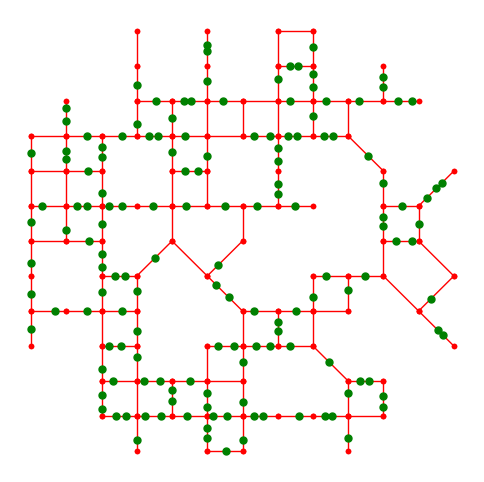

In [46]:
import pickle

with open('data.pickled', 'rb') as f:
    M, C = pickle.load(f)
V,E = M
plotMap((V, E), T=C)


In [53]:
import pickle

with open('REC/rec w=( 640,5120).pickled', 'rb') as f:
    rec = pickle.load(f)

In [54]:
type(rec)

__main__.Recorder

In [55]:
rec.daily['dist']

0     28153
1     31079
2     33811
3     34768
4     34143
5     34793
6     29695
7     33738
8     34569
9     34597
10    27355
11    31051
12    32661
13    29225
14    34407
15    33047
16    30426
17    31943
18    30099
19    34777
Name: dist, dtype: object

In [56]:
rec.daily['left']

0     0
1     0
2     1
3     0
4     1
5     0
6     0
7     4
8     2
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    2
19    1
Name: left, dtype: object

In [57]:
rec.daily['left']

0     0
1     0
2     1
3     0
4     1
5     0
6     0
7     4
8     2
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    2
19    1
Name: left, dtype: object